In [1]:
import pandas as pd

#Etape 1: Analyse exploratoire

##SIRH

In [2]:
file_path_sirh = 'extrait_sirh.csv'
df_sirh = pd.read_csv(file_path_sirh)
display(df_sirh)

id_employee  age genre  revenu_mensuel statut_marital departement  \
0               1   41     F            5993    Célibataire  Commercial   
1               2   49     M            5130       Marié(e)  Consulting   
2               4   37     M            2090    Célibataire  Consulting   
3               5   33     F            2909       Marié(e)  Consulting   
4               7   27     M            3468       Marié(e)  Consulting   
...           ...  ...   ...             ...            ...         ...   
1465         2061   36     M            2571       Marié(e)  Consulting   
1466         2062   39     M            9991       Marié(e)  Consulting   
1467         2064   27     M            6142       Marié(e)  Consulting   
1468         2065   49     M            5390       Marié(e)  Commercial   
1469         2068   34     M            4404       Marié(e)  Consulting   

                       poste  nombre_experiences_precedentes  \
0           Cadre Commercial                               8   
1     Assistant de Direction                               1   
2                 Consultant                               6   
3     Assistant de Direction                               1   
4                 Consultant                               9   
...                      ...                             ...   
1465              Consultant                               4   
1466                 Manager                               4   
1467               Tech Lead                               1   
1468        Cadre Commercial                               2   
1469              Consultant                               2   

      nombre_heures_travailless  annee_experience_totale  \
0                            80                        8   
1                            80                       10   
2                            80                        7   
3                            80                        8   
4                            80                        6   
...                         ...                      ...   
1465                         80                       17   
1466                         80                        9   
1467                         80                        6   
1468                         80                       17   
1469                         80                        6   

      annees_dans_l_entreprise  annees_dans_le_poste_actuel  
0                            6                            4  
1                           10                            7  
2                            0                            0  
3                            8                            7  
4                            2                            2  
...                        ...                          ...  
1465                         5                            2  
1466                         7                            7  
1467                         6                            2  
1468                         9                            6  
1469                         4                            3  

[1470 rows x 12 columns]

In [3]:
df_sirh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB


In [4]:
#renommées 'id_employee' by 'ID
df_sirh = df_sirh.rename(columns={'id_employee': 'ID'})

In [5]:
#Verification si ID est unique
df_sirh['ID'].nunique()

1470

In [6]:
df_sirh.describe()

ID          age  revenu_mensuel  \
count  1470.000000  1470.000000     1470.000000   
mean   1024.865306    36.923810     6502.931293   
std     602.024335     9.135373     4707.956783   
min       1.000000    18.000000     1009.000000   
25%     491.250000    30.000000     2911.000000   
50%    1020.500000    36.000000     4919.000000   
75%    1555.750000    43.000000     8379.000000   
max    2068.000000    60.000000    19999.000000   

       nombre_experiences_precedentes  nombre_heures_travailless  \
count                     1470.000000                     1470.0   
mean                         2.693197                       80.0   
std                          2.498009                        0.0   
min                          0.000000                       80.0   
25%                          1.000000                       80.0   
50%                          2.000000                       80.0   
75%                          4.000000                       80.0   
max                          9.000000                       80.0   

       annee_experience_totale  annees_dans_l_entreprise  \
count              1470.000000               1470.000000   
mean                 11.279592                  7.008163   
std                   7.780782                  6.126525   
min                   0.000000                  0.000000   
25%                   6.000000                  3.000000   
50%                  10.000000                  5.000000   
75%                  15.000000                  9.000000   
max                  40.000000                 40.000000   

       annees_dans_le_poste_actuel  
count                  1470.000000  
mean                      4.229252  
std                       3.623137  
min                       0.000000  
25%                       2.000000  
50%                       3.000000  
75%                       7.000000  
max                      18.000000

On suprimme la colonne 'nombre_heures_travailless' car 80h = 100%

In [7]:
#Suprimme la colonne 'nombre_heures_travailless'
df_sirh = df_sirh.drop(columns=['nombre_heures_travailless'])

In [8]:
df_sirh[df_sirh['revenu_mensuel'] == 	19999]

ID  age genre  revenu_mensuel statut_marital departement  \
190  259   52     M           19999       Marié(e)  Consulting   

              poste  nombre_experiences_precedentes  annee_experience_totale  \
190  Senior Manager                               0                       34   

     annees_dans_l_entreprise  annees_dans_le_poste_actuel  
190                        33                           18

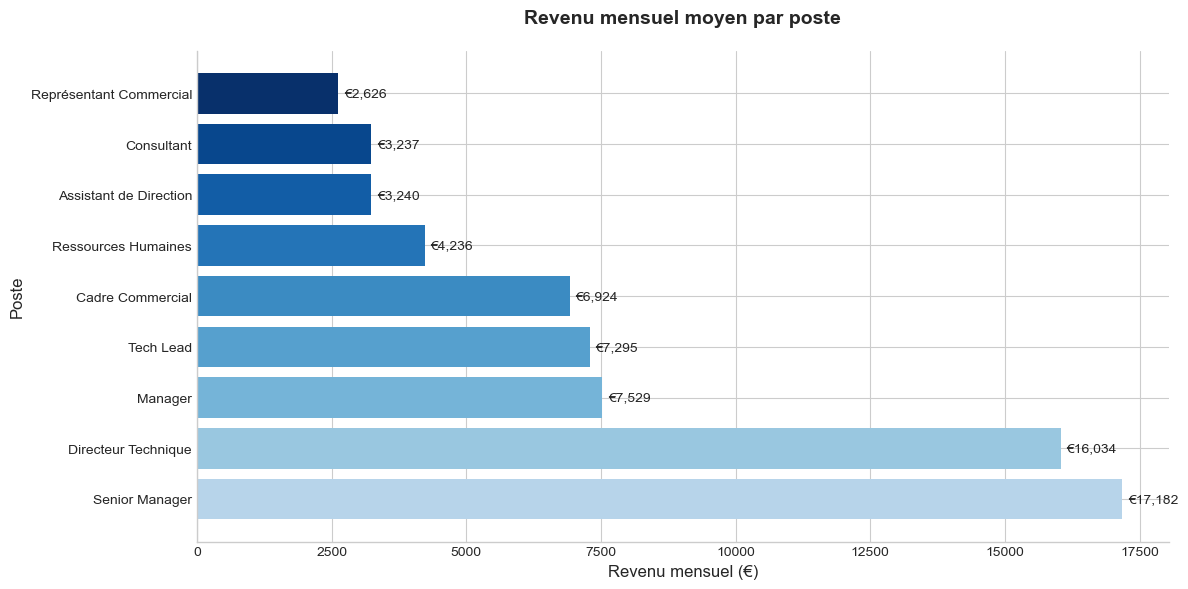

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Estilo limpio
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))

# Agrupar y calcular media (evita superposición)
df_grouped = df_sirh.groupby('poste')['revenu_mensuel'].mean().sort_values(ascending=False).reset_index()

# Barras horizontales para mejor legibilidad (recomendado para muchas categorías)
bars = ax.barh(df_grouped['poste'], df_grouped['revenu_mensuel'],
               color=plt.cm.Blues(np.linspace(0.3, 1, len(df_grouped))))

# Títulos y etiquetas
ax.set_title('Revenu mensuel moyen par poste', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Revenu mensuel (€)', fontsize=12)
ax.set_ylabel('Poste', fontsize=12)

# Formatear valores en barras
for bar, value in zip(bars, df_grouped['revenu_mensuel']):
    ax.text(value + 100, bar.get_y() + bar.get_height()/2,
            f'€{value:,.0f}', va='center', fontsize=10)

# Quitar espinas y ajustar
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()


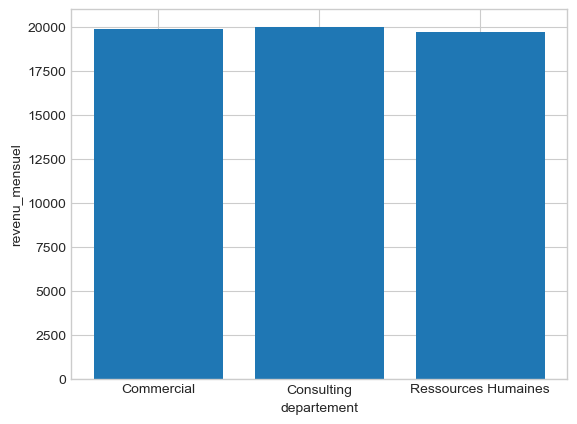

In [10]:
#Graph 'departement' vs 'revenu_mensuel'
import matplotlib.pyplot as plt
plt.bar(df_sirh['departement'], df_sirh['revenu_mensuel'])
plt.xlabel('departement')
plt.ylabel('revenu_mensuel')
plt.show()

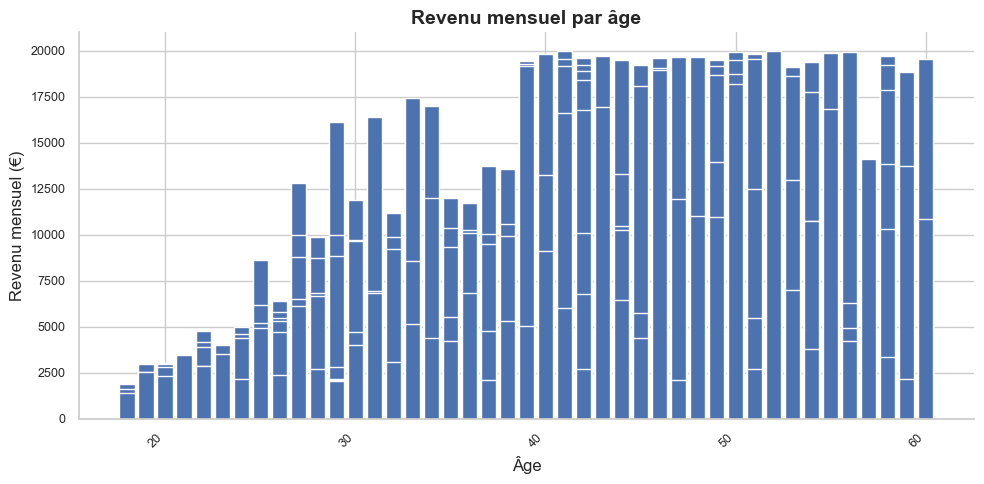

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns  # opcional pero recomendable

# Estilo general
sns.set(style="whitegrid")  # o plt.style.use("seaborn-v0_8-whitegrid")

# (opcional) ordenar por edad
df_plot = df_sirh.sort_values("age")

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(
    df_plot["age"],
    df_plot["revenu_mensuel"],
    color="#4C72B0",
    edgecolor="white",
    width=0.8
)

# Títulos y etiquetas
ax.set_title("Revenu mensuel par âge", fontsize=14, fontweight="bold")
ax.set_xlabel("Âge", fontsize=12)
ax.set_ylabel("Revenu mensuel (€)", fontsize=12)

# Ejes y ticks
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)

# Quitar bordes superiores y derechos
sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()


##Evaluation

In [12]:
file_path_eval = 'extrait_eval.csv'
df_eval = pd.read_csv(file_path_eval)
display(df_eval)

satisfaction_employee_environnement  note_evaluation_precedente  \
0                                       2                           3   
1                                       3                           2   
2                                       4                           2   
3                                       4                           3   
4                                       1                           3   
...                                   ...                         ...   
1465                                    3                           4   
1466                                    4                           2   
1467                                    2                           4   
1468                                    4                           2   
1469                                    2                           4   

      niveau_hierarchique_poste  satisfaction_employee_nature_travail  \
0                             2                                     4   
1                             2                                     2   
2                             1                                     3   
3                             1                                     3   
4                             1                                     2   
...                         ...                                   ...   
1465                          2                                     4   
1466                          3                                     1   
1467                          2                                     2   
1468                          2                                     2   
1469                          2                                     3   

      satisfaction_employee_equipe  satisfaction_employee_equilibre_pro_perso  \
0                                1                                          1   
1                                4                                          3   
2                                2                                          3   
3                                3                                          3   
4                                4                                          3   
...                            ...                                        ...   
1465                             3                                          3   
1466                             1                                          3   
1467                             2                                          3   
1468                             4                                          2   
1469                             1                                          4   

     eval_number  note_evaluation_actuelle heure_supplementaires  \
0            E_1                         3                   Oui   
1            E_2                         4                   Non   
2            E_4                         3                   Oui   
3            E_5                         3                   Oui   
4            E_7                         3                   Non   
...          ...                       ...                   ...   
1465      E_2061                         3                   Non   
1466      E_2062                         3                   Non   
1467      E_2064                         4                   Oui   
1468      E_2065                         3                   Non   
1469      E_2068                         3                   Non   

     augementation_salaire_precedente  
0                                11 %  
1                                23 %  
2                                15 %  
3                                11 %  
4                                12 %  
...                               ...  
1465                             17 %  
1466                             15 %  
1467                             20 %  
1468                             14 %  
1469                  

In [13]:
#Changer le nom de 'augementation_salaire_precedente' par '% augementation_salaire_precedente'
df_eval = df_eval.rename(columns={'augementation_salaire_precedente': '% augementation_salaire_precedente'})
#Transformer cette colonne en int64 (enlever '%' de la celulle)
df_eval['% augementation_salaire_precedente'] = df_eval['% augementation_salaire_precedente'].str.replace('%', '').astype('int64')

In [14]:
#In the 'eval_number' column, we extract onlt the number to keep the ID
df_eval['eval_number'] = df_eval['eval_number'].str.extract(r'(\d+)')
df_eval['eval_number'].head()

0    1
1    2
2    4
3    5
4    7
Name: eval_number, dtype: object

In [15]:
#transform "eval_number" to int64
df_eval['eval_number'] = df_eval['eval_number'].astype('int64')

In [16]:
#rename 'eval_number' by 'ID'
df_eval = df_eval.rename(columns={'eval_number': 'ID'})


In [17]:
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   ID                                         1470 non-null   int64 
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   % augementation_salaire_precedente         1470 non-null   int64 
dtypes: int64(9), object(1)
memory usage:

In [18]:
#Verification si ID est unique
df_eval['ID'].nunique()

1470

In [19]:
#Encoder'heure_supplementaires', Oui = 1 et Non = 0
df_eval['heure_supplementaires'] = df_eval['heure_supplementaires'].map({'Oui': 1, 'Non': 0})
#Transformer en int64
df_eval['heure_supplementaires'] = df_eval['heure_supplementaires'].astype('int64')


In [20]:
df_eval.describe()

satisfaction_employee_environnement  note_evaluation_precedente  \
count                          1470.000000                 1470.000000   
mean                              2.721769                    2.729932   
std                               1.093082                    0.711561   
min                               1.000000                    1.000000   
25%                               2.000000                    2.000000   
50%                               3.000000                    3.000000   
75%                               4.000000                    3.000000   
max                               4.000000                    4.000000   

       niveau_hierarchique_poste  satisfaction_employee_nature_travail  \
count                1470.000000                           1470.000000   
mean                    2.063946                              2.728571   
std                     1.106940                              1.102846   
min                     1.000000                              1.000000   
25%                     1.000000                              2.000000   
50%                     2.000000                              3.000000   
75%                     3.000000                              4.000000   
max                     5.000000                              4.000000   

       satisfaction_employee_equipe  \
count                   1470.000000   
mean                       2.712245   
std                        1.081209   
min                        1.000000   
25%                        2.000000   
50%                        3.000000   
75%                        4.000000   
max                        4.000000   

       satisfaction_employee_equilibre_pro_perso           ID  \
count                                1470.000000  1470.000000   
mean                                    2.761224  1024.865306   
std                                     0.706476   602.024335   
min                                     1.000000     1.000000   
25%                                     2.000000   491.250000   
50%                                     3.000000  1020.500000   
75%                                     3.000000  1555.750000   
max                                     4.000000  2068.000000   

       note_evaluation_actuelle  heure_supplementaires  \
count               1470.000000            1470.000000   
mean                   3.153741               0.282993   
std                    0.360824               0.450606   
min                    3.000000               0.000000   
25%                    3.000000               0.000000   
50%                    3.000000               0.000000   
75%                    3.000000               1.000000   
max                    4.000000               1.000000   

       % augementation_salaire_precedente  
count                         1470.000000  
mean                            15.209524  
std                              3.659938  
min                             11.000000  
25%                             12.000000  
50%                             14.000000  
75%                             18.000000  
max                             25.000000

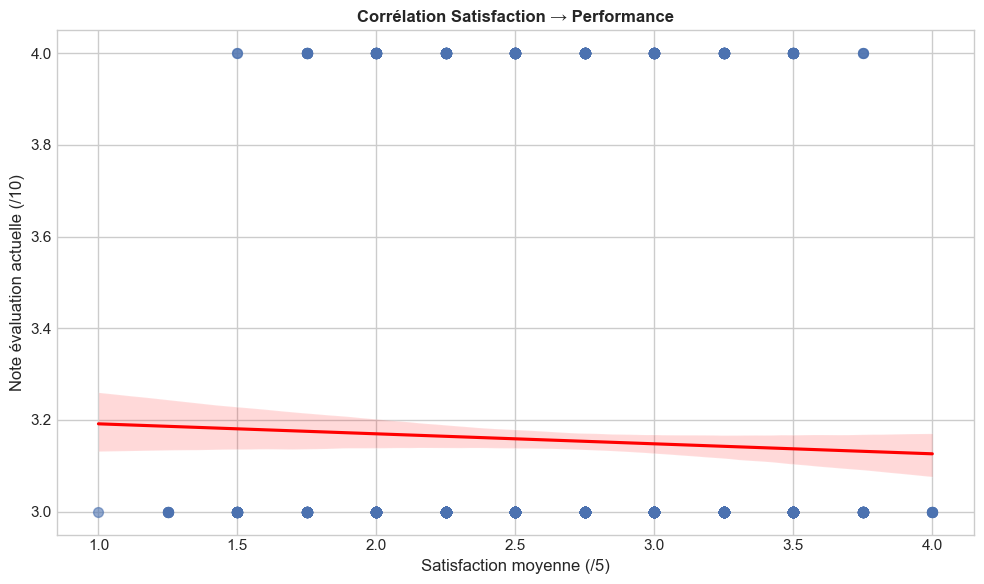

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Satisfaction moyenne (todas las columnas satisfaction)
df_eval['satisfaction_media'] = df_eval[['satisfaction_employee_environnement',
                                           'satisfaction_employee_nature_travail',
                                           'satisfaction_employee_equipe',
                                           'satisfaction_employee_equilibre_pro_perso']].mean(axis=1)

ax.scatter(df_eval['satisfaction_media'], df_eval['note_evaluation_actuelle'], alpha=0.6, s=50)
sns.regplot(x=df_eval['satisfaction_media'], y=df_eval['note_evaluation_actuelle'],
            scatter=False, ax=ax, color='red')

ax.set_xlabel('Satisfaction moyenne (/5)', fontsize=12)
ax.set_ylabel('Note évaluation actuelle (/10)', fontsize=12)
ax.set_title('Corrélation Satisfaction → Performance', fontweight='bold')
plt.tight_layout()
plt.show()


##Sondage

In [22]:
file_path = 'extrait_sondage.csv'
df_sondage = pd.read_csv(file_path)
display(df_sondage)

a_quitte_l_entreprise  nombre_participation_pee  nb_formations_suivies  \
0                      Oui                         0                      0   
1                      Non                         1                      3   
2                      Oui                         0                      3   
3                      Non                         0                      3   
4                      Non                         1                      3   
...                    ...                       ...                    ...   
1465                   Non                         1                      3   
1466                   Non                         1                      5   
1467                   Non                         1                      0   
1468                   Non                         0                      3   
1469                   Non                         0                      3   

      nombre_employee_sous_responsabilite  code_sondage  \
0                                       1             1   
1                                       1             2   
2                                       1             4   
3                                       1             5   
4                                       1             7   
...                                   ...           ...   
1465                                    1          2061   
1466                                    1          2062   
1467                                    1          2064   
1468                                    1          2065   
1469                                    1          2068   

      distance_domicile_travail  niveau_education            domaine_etude  \
0                             1                 2            Infra & Cloud   
1                             8                 1            Infra & Cloud   
2                             2                 2                    Autre   
3                             3                 4            Infra & Cloud   
4                             2                 1  Transformation Digitale   
...                         ...               ...                      ...   
1465                         23                 2  Transformation Digitale   
1466                          6                 1  Transformation Digitale   
1467                          4                 3            Infra & Cloud   
1468                          2                 3  Transformation Digitale   
1469                          8                 3  Transformation Digitale   

     ayant_enfants frequence_deplacement  annees_depuis_la_derniere_promotion  \
0                Y           Occasionnel                                    0   
1                Y              Frequent                                    1   
2                Y           Occasionnel                                    0   
3                Y              Frequent                                    3   
4                Y           Occasionnel                                    2   
...            ...                   ...                                  ...   
1465             Y              Frequent                                    0   
1466             Y           Occasionnel                                    1   
1467             Y           Occasionnel                                    0   
1468             Y              Frequent                                    0   
1469             Y           Occasionnel                                    1   

      annes_sous_responsable_actuel  
0                                 5  
1                                 7  
2                                 0  
3                                 0  
4                                 2  
...                             ...  
1465                              3  
1466                              7  
1467                              3  
1468                              8  
1469               

In [23]:
#Pertinence de la colonne 'ayant_enfants'
df_sondage['ayant_enfants'].value_counts()

ayant_enfants
Y    1470
Name: count, dtype: int64

On surprime 'ayant_enfants' du sondage car Yes = 100%

In [24]:
df_sondage = df_sondage.drop(columns=['ayant_enfants'])

In [25]:
df_sondage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   frequence_deplacement                1470 non-null   object
 9   annees_depuis_la_derniere_promotion  1470 non-null   int64 
 10  annes_sous_responsable_actuel        1470 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 126.5+

In [26]:
#rename 'code_sondage' by 'ID'
df_sondage = df_sondage.rename(columns={'code_sondage': 'ID'})

In [27]:
#Verification si ID est unique
df_sondage['ID'].nunique()

1470

In [28]:
df_sondage.describe()

nombre_participation_pee  nb_formations_suivies  \
count               1470.000000            1470.000000   
mean                   0.793878               2.799320   
std                    0.852077               1.289271   
min                    0.000000               0.000000   
25%                    0.000000               2.000000   
50%                    1.000000               3.000000   
75%                    1.000000               3.000000   
max                    3.000000               6.000000   

       nombre_employee_sous_responsabilite           ID  \
count                               1470.0  1470.000000   
mean                                   1.0  1024.865306   
std                                    0.0   602.024335   
min                                    1.0     1.000000   
25%                                    1.0   491.250000   
50%                                    1.0  1020.500000   
75%                                    1.0  1555.750000   
max                                    1.0  2068.000000   

       distance_domicile_travail  niveau_education  \
count                1470.000000       1470.000000   
mean                    9.192517          2.912925   
std                     8.106864          1.024165   
min                     1.000000          1.000000   
25%                     2.000000          2.000000   
50%                     7.000000          3.000000   
75%                    14.000000          4.000000   
max                    29.000000          5.000000   

       annees_depuis_la_derniere_promotion  annes_sous_responsable_actuel  
count                          1470.000000                    1470.000000  
mean                              2.187755                       4.123129  
std                               3.222430                       3.568136  
min                               0.000000                       0.000000  
25%                               0.000000                       2.000000  
50%                               1.000000                       3.000000  
75%                               3.000000                       7.000000  
max                              15.000000                      17.000000

On suprimme 'nombre_employee_sous_responsabilite' car 1 = 100%

In [29]:
#Drop 'nombre_employee_sous_responsabilite'
df_sondage = df_sondage.drop(columns=['nombre_employee_sous_responsabilite'])

##Join datasets

In [30]:
df_sondage['a_quitte_l_entreprise'].value_counts()

a_quitte_l_entreprise
Non    1233
Oui     237
Name: count, dtype: int64

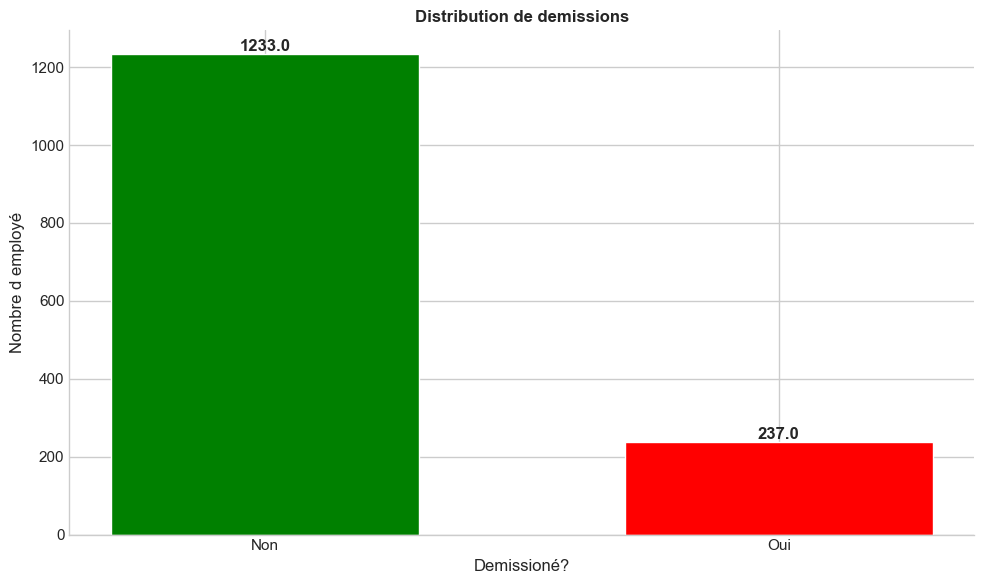

In [31]:
#Graph employés ayant quitte
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Turnover Count
churn = df_sondage['a_quitte_l_entreprise'].value_counts()

bars = ax.bar(churn.index, churn.values, color=['green', 'red'],
              edgecolor='white', width=0.6)

ax.set_title('Distribution de demissions', fontweight='bold')
ax.set_ylabel('Nombre d employé')
ax.set_xlabel('Demissioné?')

# Anotaciones
for bar, val in zip(bars, churn.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f'{val:.1f}',
            ha='center', va='bottom', fontweight='bold')

sns.despine()
plt.tight_layout()
plt.show()



In [32]:
#Join all datasets by 'ID'
df_merged = pd.merge(df_sirh, df_eval, on='ID', how='inner')
df_merged = pd.merge(df_merged, df_sondage, on='ID', how='inner')

In [33]:
#Creation d'une categorie d'âge
#Percentiles par âge
df_merged['age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64

## Graph comparatifs entre le personnel ayant quitté l'entreprise et ceux qui restent

In [34]:
df_quitte = df_merged[df_merged['a_quitte_l_entreprise'] == 'Oui']
df_non_quitte = df_merged[df_merged['a_quitte_l_entreprise'] == 'Non']

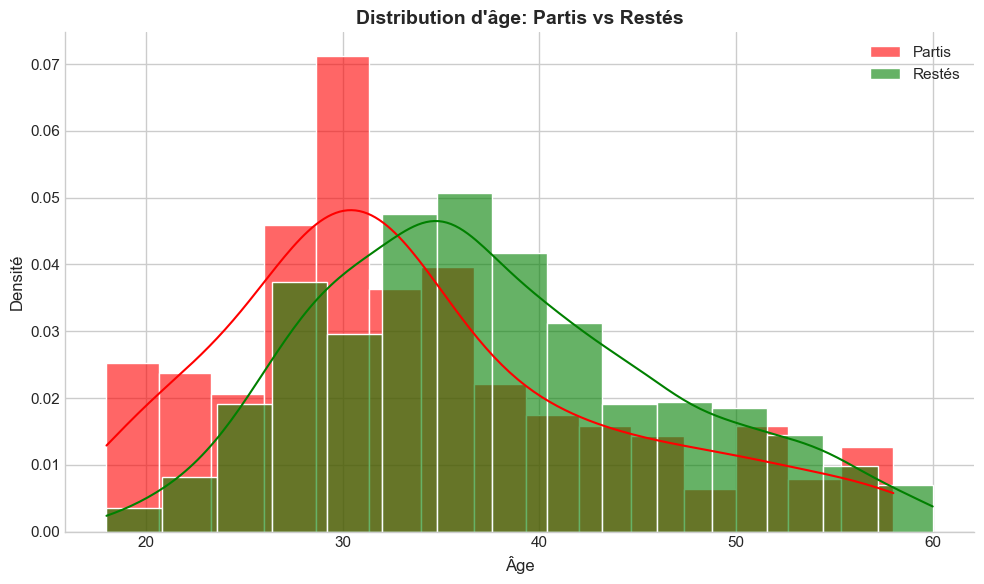

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_quitte['age'], bins=15, kde=True, color='red', alpha=0.6,
             stat='density', label='Partis', common_norm=False)
sns.histplot(data=df_non_quitte['age'], bins=15, kde=True, color='green', alpha=0.6,
             stat='density', label='Restés', common_norm=False)

plt.title('Distribution d\'âge: Partis vs Restés', fontweight='bold', fontsize=14)
plt.xlabel('Âge')
plt.ylabel('Densité')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


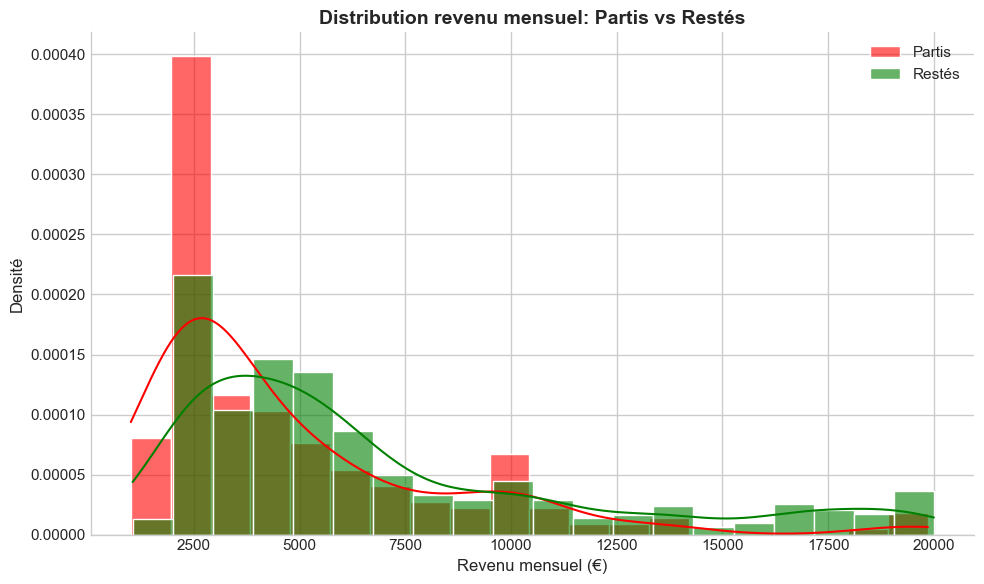

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df_quitte['revenu_mensuel'], bins=20, kde=True, color='red', alpha=0.6,
             stat='density', label='Partis', common_norm=False)
sns.histplot(df_non_quitte['revenu_mensuel'], bins=20, kde=True, color='green', alpha=0.6,
             stat='density', label='Restés', common_norm=False)

plt.title('Distribution revenu mensuel: Partis vs Restés', fontweight='bold', fontsize=14)
plt.xlabel('Revenu mensuel (€)')
plt.ylabel('Densité')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


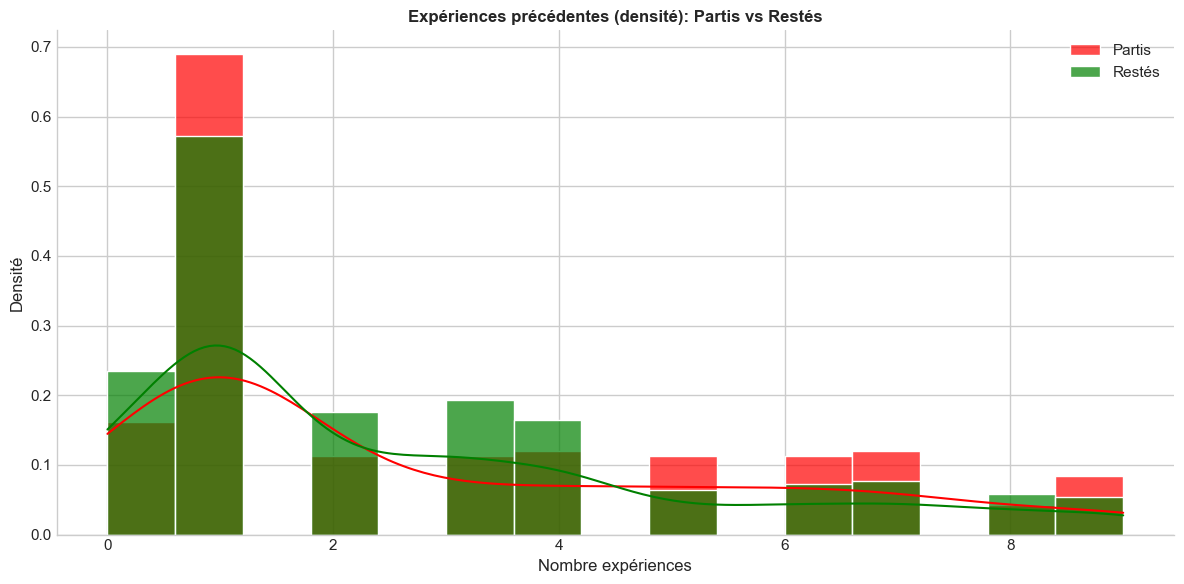

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df_quitte['nombre_experiences_precedentes'], bins=15, kde=True,
             color='red', alpha=0.7, stat='density', label='Partis', common_norm=False)
sns.histplot(df_non_quitte['nombre_experiences_precedentes'], bins=15, kde=True,
             color='green', alpha=0.7, stat='density', label='Restés', common_norm=False)

plt.title('Expériences précédentes (densité): Partis vs Restés', fontweight='bold')
plt.xlabel('Nombre expériences')
plt.ylabel('Densité')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


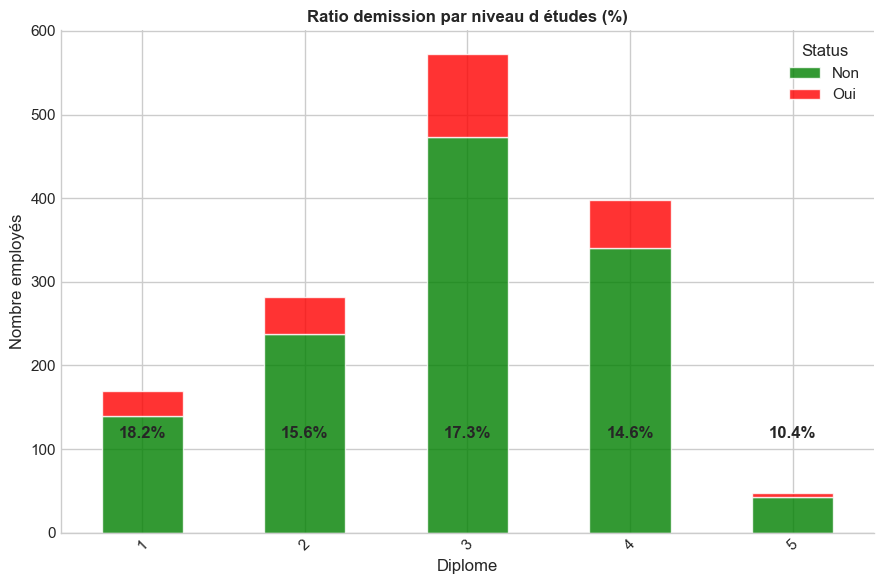

In [38]:
fig, ax = plt.subplots(figsize=(9, 6))

# Conteo churn por educación
churn_edu = df_merged.groupby(['niveau_education', 'a_quitte_l_entreprise']).size().unstack(fill_value=0)
churn_rate = (churn_edu['Oui'] / (churn_edu['Oui'] + churn_edu['Non']) * 100).round(1)

ax = churn_edu.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red'], alpha=0.8)
ax.set_title('Ratio demission par niveau d études (%)', fontweight='bold')
ax.set_xlabel('Diplome')
ax.set_ylabel('Nombre employés')
ax.legend(title='Status')

# Anotar % churn
for i, rate in enumerate(churn_rate):
    ax.text(i, churn_edu['Oui'].sum() / 2, f'{rate}%', ha='center', va='center', fontweight='bold')

sns.despine()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

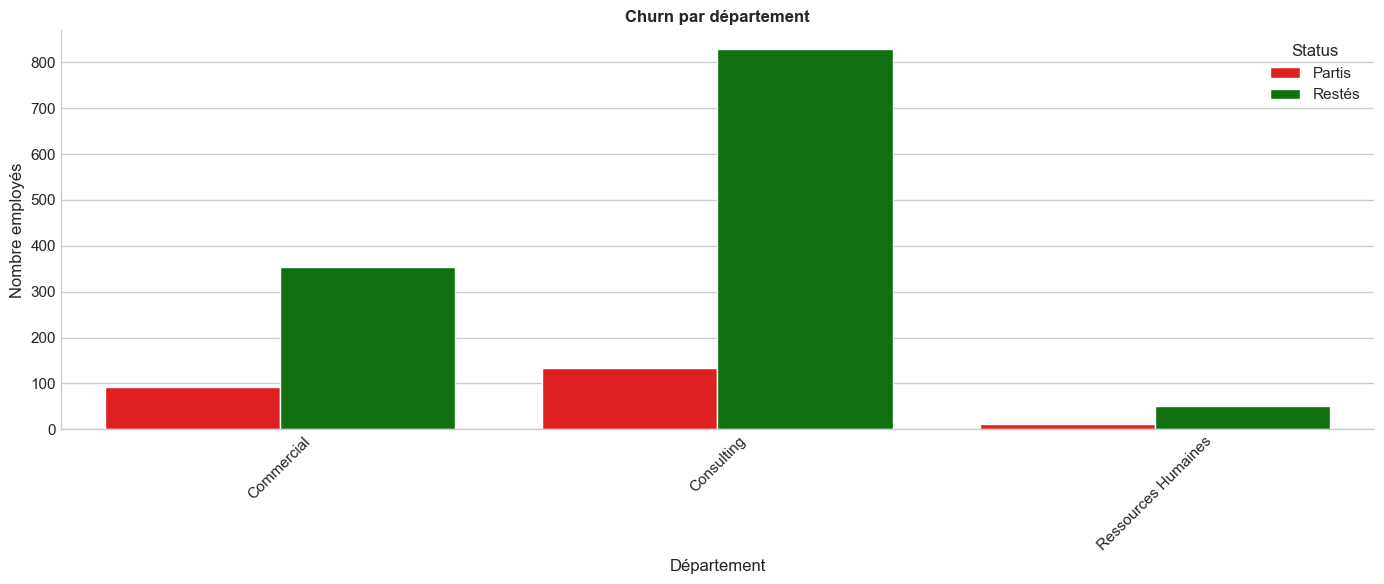

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Opción 1: Grouped barplot (conteos absolutos lado a lado)
churn_dept = pd.concat([df_quitte.assign(status='Partis'),
                        df_non_quitte.assign(status='Restés')])

plt.figure(figsize=(14, 6))
sns.countplot(data=churn_dept, x='departement', hue='status', palette=['red', 'green'])
plt.title('Churn par département', fontweight='bold')
plt.xlabel('Département')
plt.ylabel('Nombre employés')
plt.xticks(rotation=45)
plt.legend(title='Status')
sns.despine()
plt.tight_layout()
plt.show()


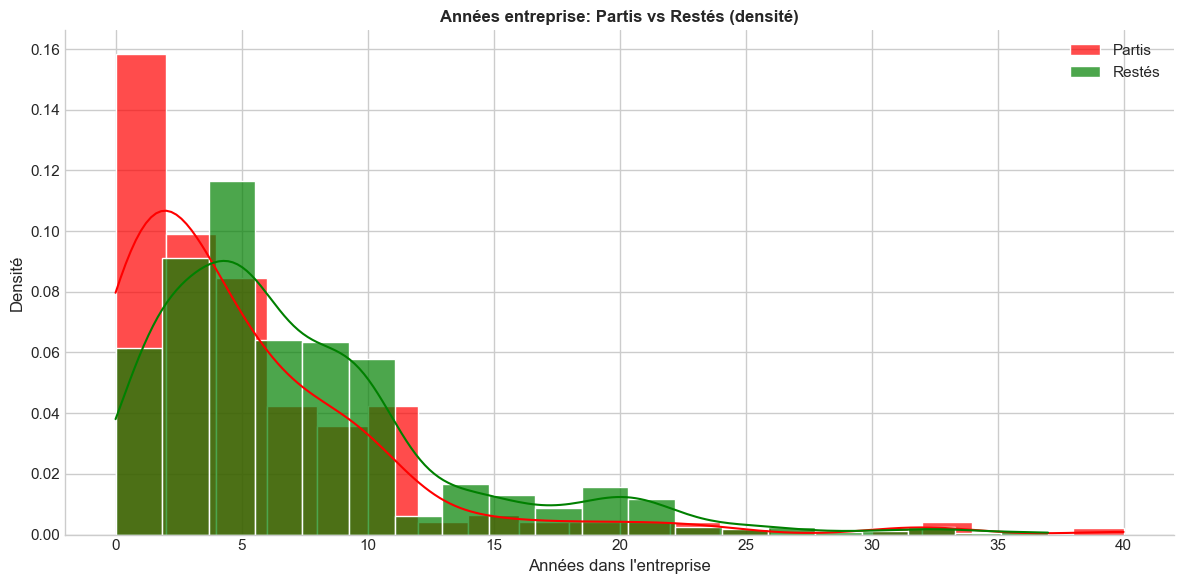

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Overlay densité (normalisé - recommandé churn)
plt.figure(figsize=(12, 6))
sns.histplot(df_quitte['annees_dans_l_entreprise'], bins=20, kde=True,
             color='red', alpha=0.7, stat='density', label='Partis', common_norm=False)
sns.histplot(df_non_quitte['annees_dans_l_entreprise'], bins=20, kde=True,
             color='green', alpha=0.7, stat='density', label='Restés', common_norm=False)

plt.title('Années entreprise: Partis vs Restés (densité)', fontweight='bold')
plt.xlabel('Années dans l\'entreprise')
plt.ylabel('Densité')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


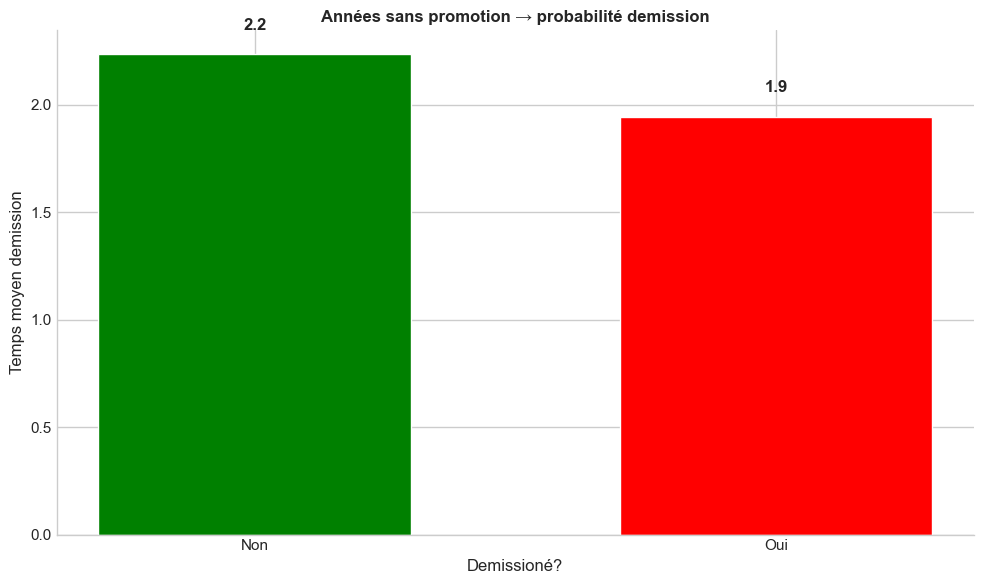

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Media años sin promo por churn
churn_promo = df_merged.groupby('a_quitte_l_entreprise')['annees_depuis_la_derniere_promotion'].mean()

bars = ax.bar(churn_promo.index, churn_promo.values, color=['green', 'red'],
              edgecolor='white', width=0.6)

ax.set_title('Années sans promotion → probabilité demission', fontweight='bold')
ax.set_ylabel('Temps moyen demission')
ax.set_xlabel('Demissioné?')

# Anotaciones
for bar, val in zip(bars, churn_promo.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f'{val:.1f}',
            ha='center', va='bottom', fontweight='bold')

sns.despine()
plt.tight_layout()
plt.show()


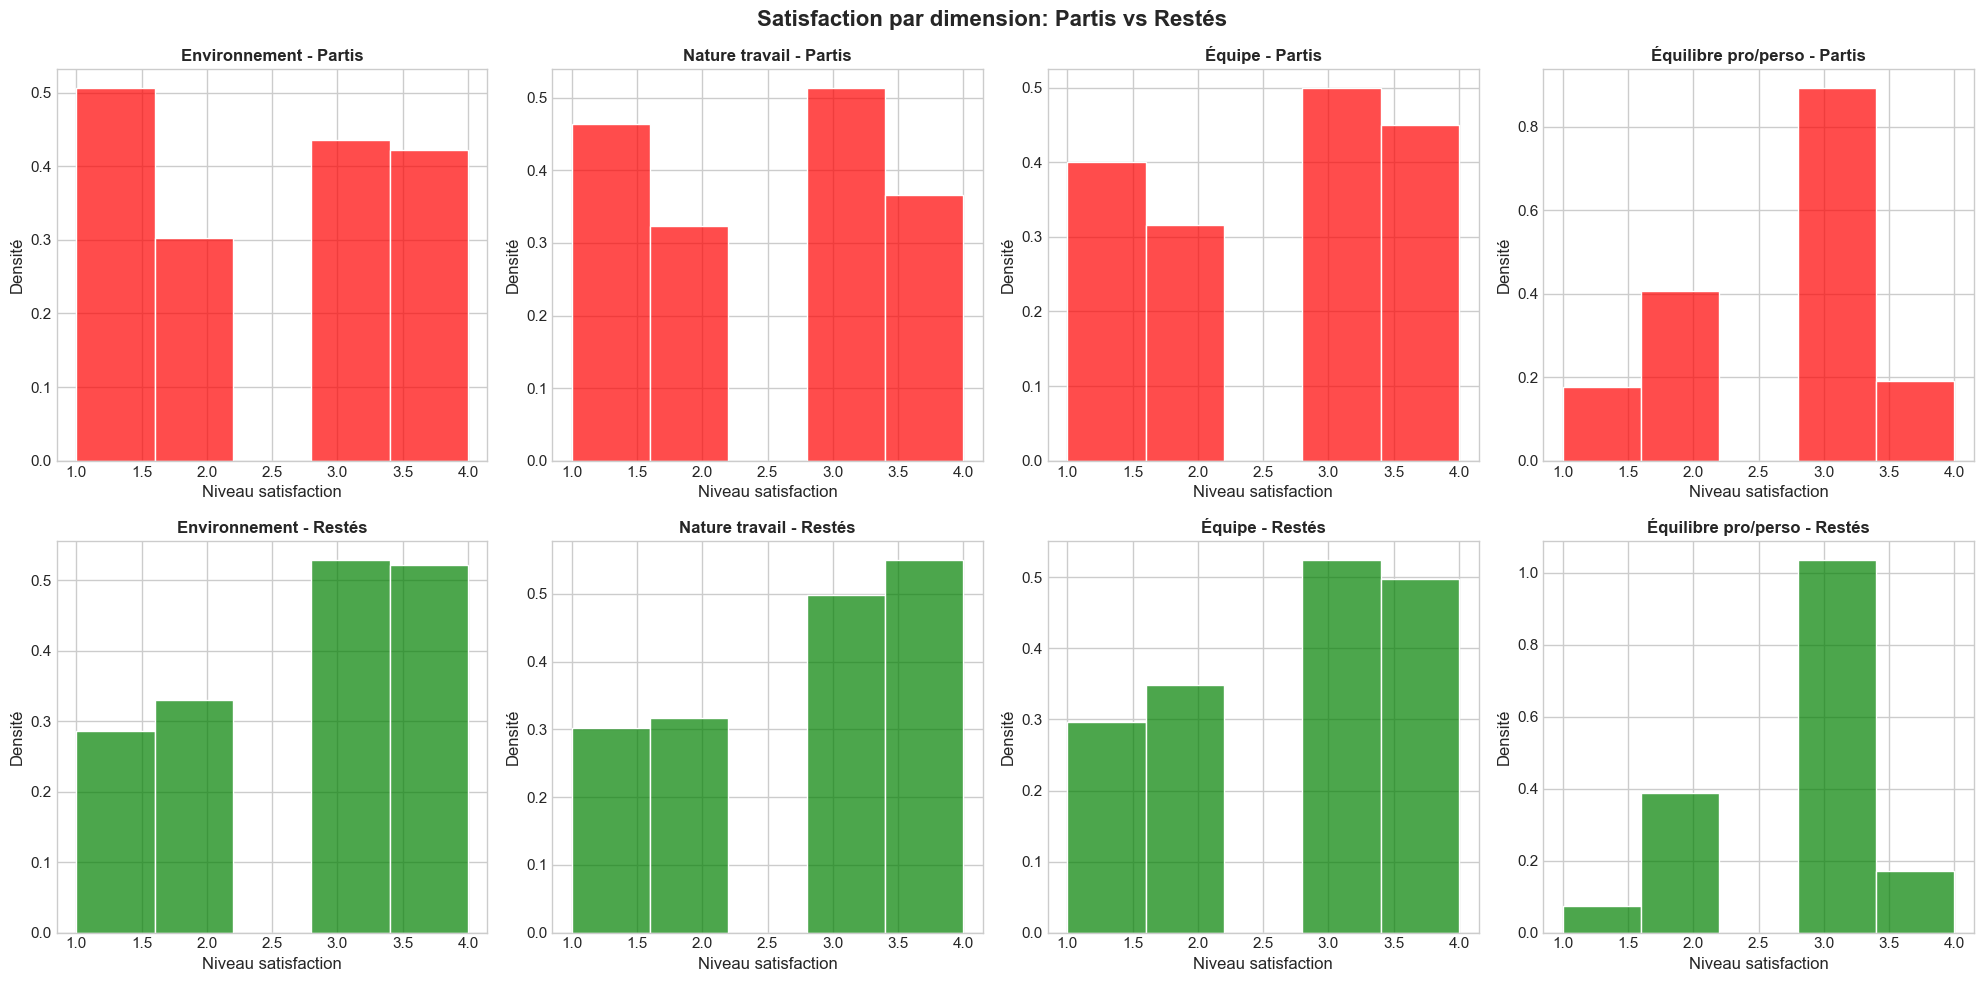

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

satisfaction_cols = [
    'satisfaction_employee_environnement', 'satisfaction_employee_nature_travail',
    'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso'
]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
titles = ['Environnement', 'Nature travail', 'Équipe', 'Équilibre pro/perso']

for i, col in enumerate(satisfaction_cols):
    # Partis (gauche)
    sns.histplot(df_quitte[col], bins=5, kde=False, ax=axes[0,i], color='red', alpha=0.7, stat='density')
    axes[0,i].set_title(f'{titles[i]} - Partis', fontweight='bold')

    # Restés (droite)
    sns.histplot(df_non_quitte[col], bins=5, kde=False, ax=axes[1,i], color='green', alpha=0.7, stat='density')
    axes[1,i].set_title(f'{titles[i]} - Restés', fontweight='bold')

    for ax in axes[:,i]:
        ax.set_xlabel('Niveau satisfaction')
        ax.set_ylabel('Densité')

plt.suptitle('Satisfaction par dimension: Partis vs Restés', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()


#Etape 2: Données pour la modelisation

##Correlation

In [43]:
import numpy as np

In [44]:
#creation d'une liste pour Valeurs numeriques dans df_merged
# Variables numériques

numeric_features = df_merged.select_dtypes(include=[np.number]).columns.tolist()

In [45]:
#drop ID
if 'ID' in numeric_features:
    numeric_features.remove('ID')

In [46]:
# Retirer la cible
if 'a_quitte_l_entreprise' in numeric_features:
    numeric_features.remove('a_quitte_l_entreprise')

In [47]:
# Variables catégorique
categorical_features = df_merged.select_dtypes(include=['object']).columns.tolist()

In [48]:
print(f"Variables NUMÉRIQUES ({len(numeric_features)}):")
print(numeric_features)

print(f"Variables CATÉGORIQUE ({len(categorical_features)}):")
print(categorical_features)

Variables NUMÉRIQUES (22):
['age', 'revenu_mensuel', 'nombre_experiences_precedentes', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle', 'heure_supplementaires', '% augementation_salaire_precedente', 'satisfaction_media', 'nombre_participation_pee', 'nb_formations_suivies', 'distance_domicile_travail', 'niveau_education', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel']
Variables CATÉGORIQUE (7):
['genre', 'statut_marital', 'departement', 'poste', 'a_quitte_l_entreprise', 'domaine_etude', 'frequence_deplacement']


In [49]:
# 6️ NETTOYAGE
# Convertir 'Oui'/'Non' en 1/0 pour la cible
df_merged['a_quitte_l_entreprise'] = (df_merged['a_quitte_l_entreprise'] == 'Oui').astype(int)

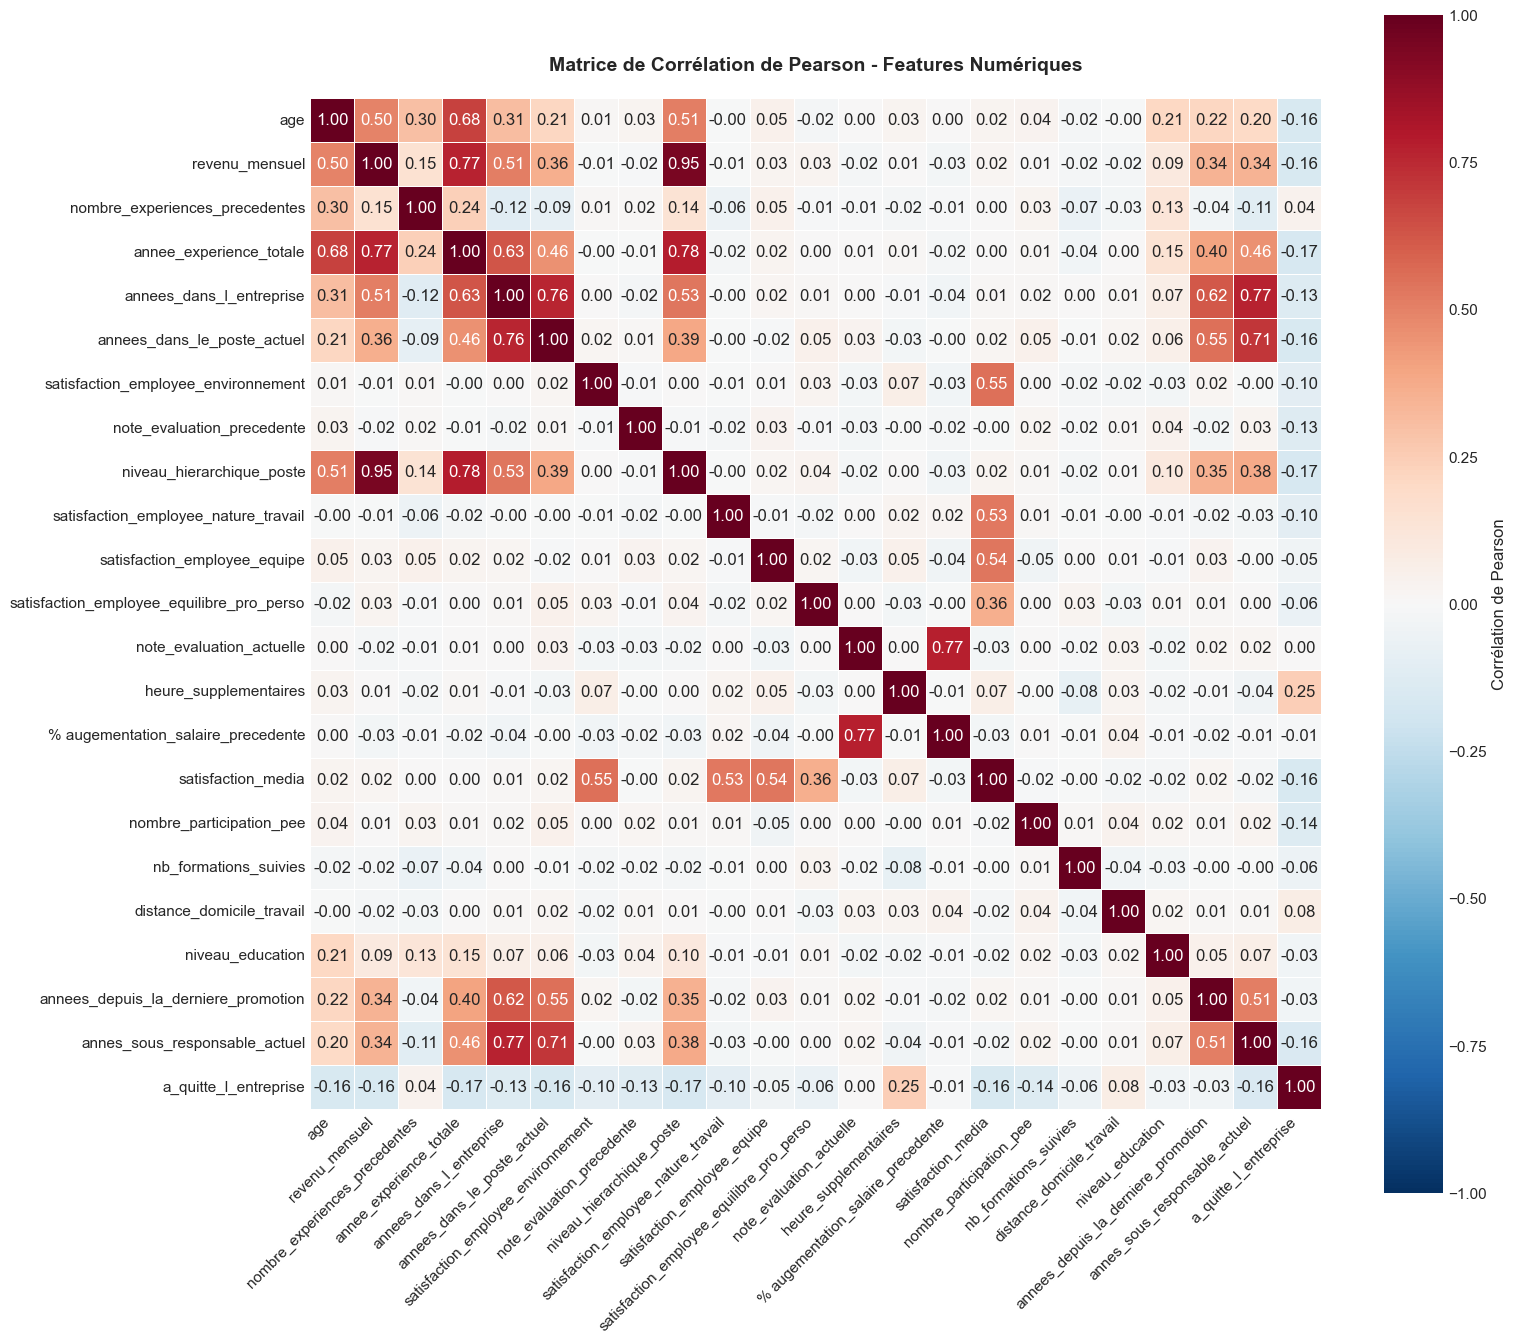

In [50]:
# Calculer la matrice de corrélation de Pearson
corr_pearson = df_merged[numeric_features + ['a_quitte_l_entreprise']].corr()

# Visualiser la matrice
fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr_pearson, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            ax=ax, cbar_kws={'label': 'Corrélation de Pearson'},
            vmin=-1, vmax=1, square=True, linewidths=0.5)
ax.set_title('Matrice de Corrélation de Pearson - Features Numériques',
             fontweight='bold', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [51]:
# 3️ IDENTIFIER LES FORTES CORRÉLATIONS À ÉLIMINER

print("-"*70)
print("3. IDENTIFICATION DES FORTES CORRÉLATIONS (|r| > 0.7)")
print("-"*70)

# Fonction pour trouver les paires fortement corrélées
def find_high_correlations(corr_matrix, threshold=0.7):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Corrélation': corr_matrix.iloc[i, j]
                })
    return pd.DataFrame(high_corr_pairs).sort_values('Corrélation',
                                                      key=abs, ascending=False)

high_corr_df = find_high_correlations(corr_pearson, threshold=0.7)

if len(high_corr_df) > 0:
    print("ALERTE Paires fortement corrélées (|r| > 0.7):")
    print(high_corr_df.to_string(index=False))
else:
    print("Aucune corrélation fortement linéaire (|r| > 0.7) détectée!")

----------------------------------------------------------------------
3. IDENTIFICATION DES FORTES CORRÉLATIONS (|r| > 0.7)
----------------------------------------------------------------------
ALERTE Paires fortement corrélées (|r| > 0.7):
                  Feature 1                          Feature 2  Corrélation
             revenu_mensuel          niveau_hierarchique_poste     0.950300
    annee_experience_totale          niveau_hierarchique_poste     0.782208
   note_evaluation_actuelle % augementation_salaire_precedente     0.773550
             revenu_mensuel            annee_experience_totale     0.772893
   annees_dans_l_entreprise      annes_sous_responsable_actuel     0.769212
   annees_dans_l_entreprise        annees_dans_le_poste_actuel     0.758754
annees_dans_le_poste_actuel      annes_sous_responsable_actuel     0.714365


In [52]:
# Également afficher les corrélations modérées (0.5 à 0.7)
mod_corr_df = find_high_correlations(corr_pearson, threshold=0.5)
mod_corr_df = mod_corr_df[mod_corr_df['Corrélation'].abs() < 0.7]

if len(mod_corr_df) > 0:
    print("ALERTE Paires modérément corrélées (0.5 < |r| < 0.7):")
    print(mod_corr_df.to_string(index=False))

ALERTE Paires modérément corrélées (0.5 < |r| < 0.7):
                           Feature 1                           Feature 2  Corrélation
                                 age             annee_experience_totale     0.680381
             annee_experience_totale            annees_dans_l_entreprise     0.628133
            annees_dans_l_entreprise annees_depuis_la_derniere_promotion     0.618409
 satisfaction_employee_environnement                  satisfaction_media     0.550303
         annees_dans_le_poste_actuel annees_depuis_la_derniere_promotion     0.548056
        satisfaction_employee_equipe                  satisfaction_media     0.538588
            annees_dans_l_entreprise           niveau_hierarchique_poste     0.534739
satisfaction_employee_nature_travail                  satisfaction_media     0.527969
                      revenu_mensuel            annees_dans_l_entreprise     0.514285
 annees_depuis_la_derniere_promotion       annes_sous_responsable_actuel     0.510224


4. MATRICE DE CORRÉLATION DE SPEARMAN (Dépendances Monotones)


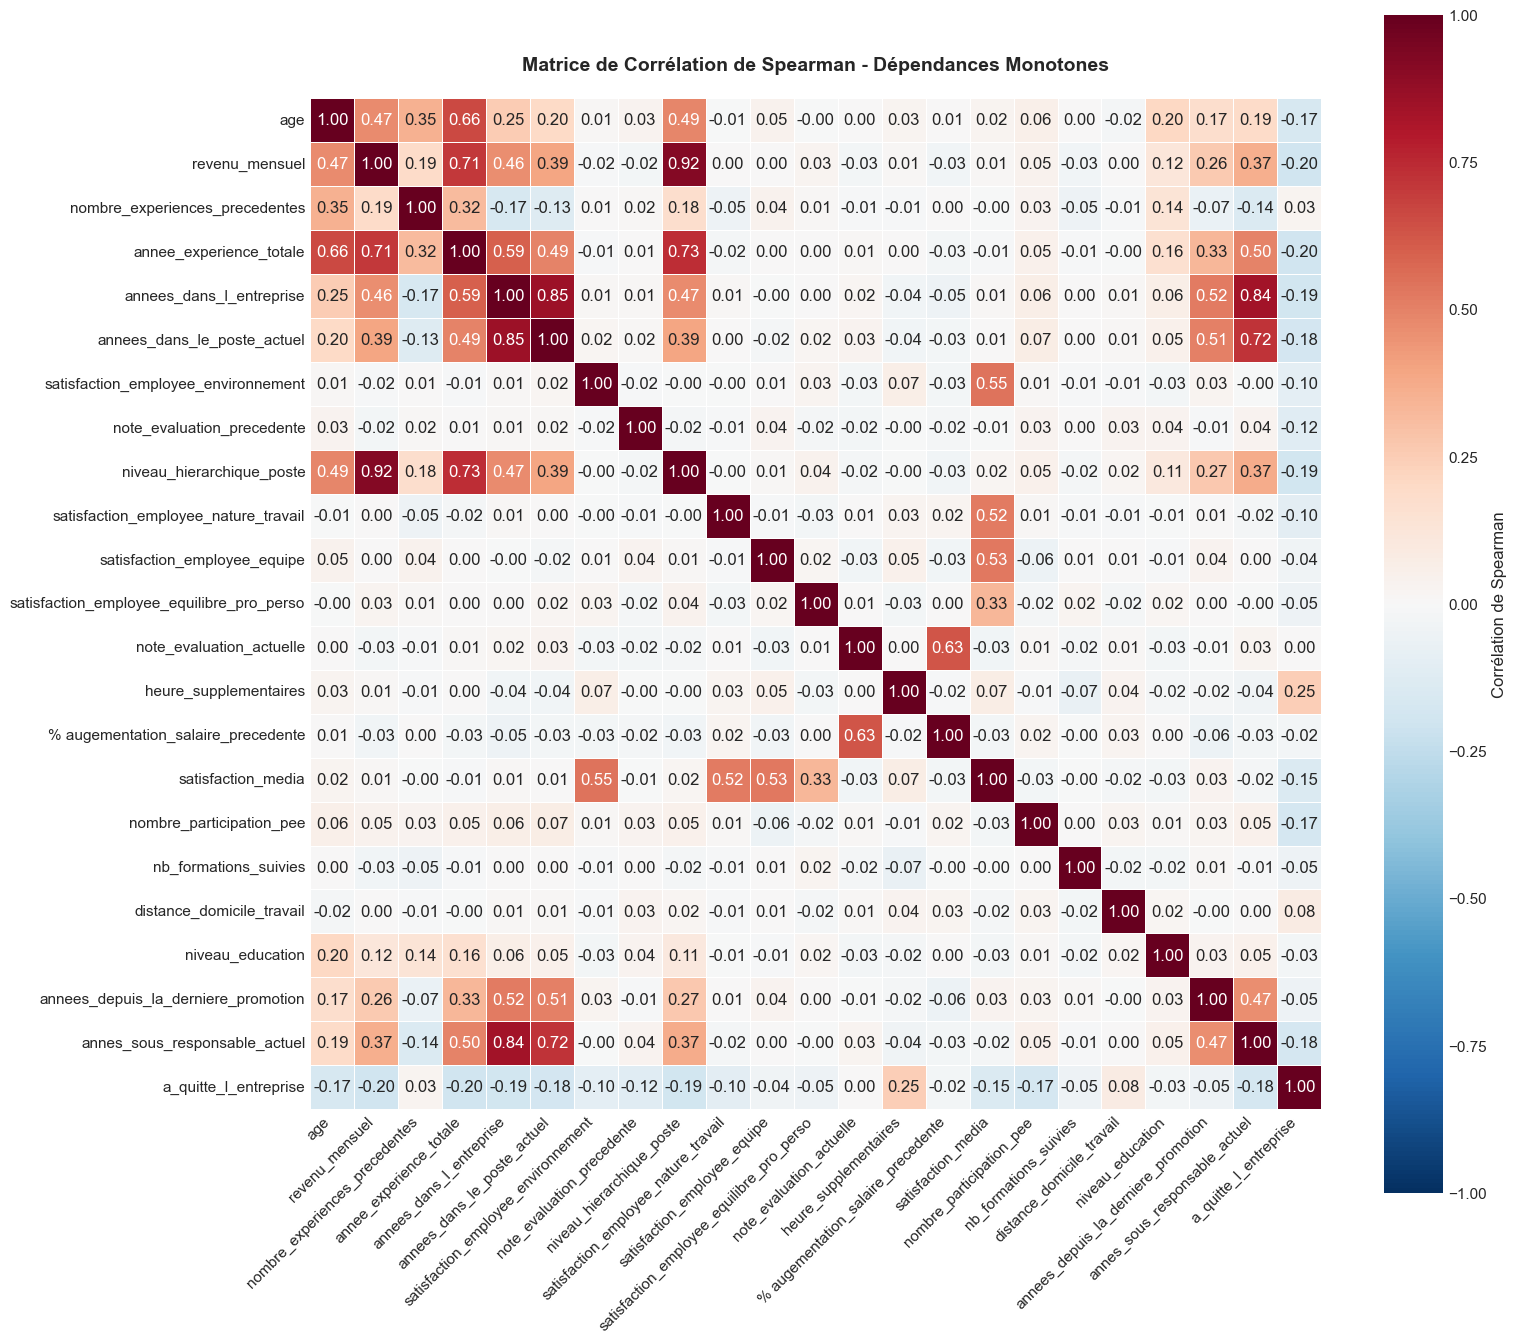

In [53]:
#MATRICE DE CORRÉLATION DE SPEARMAN
# ============================================================

print("="*70)
print("4. MATRICE DE CORRÉLATION DE SPEARMAN (Dépendances Monotones)")
print("="*70)

# Calculer la matrice de corrélation de Spearman
from scipy.stats import spearmanr

# Construire la matrice manuellement pour Spearman
cols = numeric_features + ['a_quitte_l_entreprise']
spearman_corr = pd.DataFrame(np.zeros((len(cols), len(cols))),
                              columns=cols, index=cols)

for i, col1 in enumerate(cols):
    for j, col2 in enumerate(cols):
        if i <= j:
            # Calculer Spearman
            rho, _ = spearmanr(df_merged[col1].dropna(), df_merged[col2].dropna())
            spearman_corr.iloc[i, j] = rho
            spearman_corr.iloc[j, i] = rho

# Visualiser la matrice de Spearman
fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            ax=ax, cbar_kws={'label': 'Corrélation de Spearman'},
            vmin=-1, vmax=1, square=True, linewidths=0.5)
ax.set_title('Matrice de Corrélation de Spearman - Dépendances Monotones',
             fontweight='bold', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

5. PAIRPLOT - VISUALISATION DES RELATIONS NON-LINÉAIRES
Top 6 features les plus corrélées avec le turnover:
   - heure_supplementaires: r = 0.246
   - annee_experience_totale: r = -0.171
   - niveau_hierarchique_poste: r = -0.169
   - annees_dans_le_poste_actuel: r = -0.161
   - revenu_mensuel: r = -0.160
   - age: r = -0.159


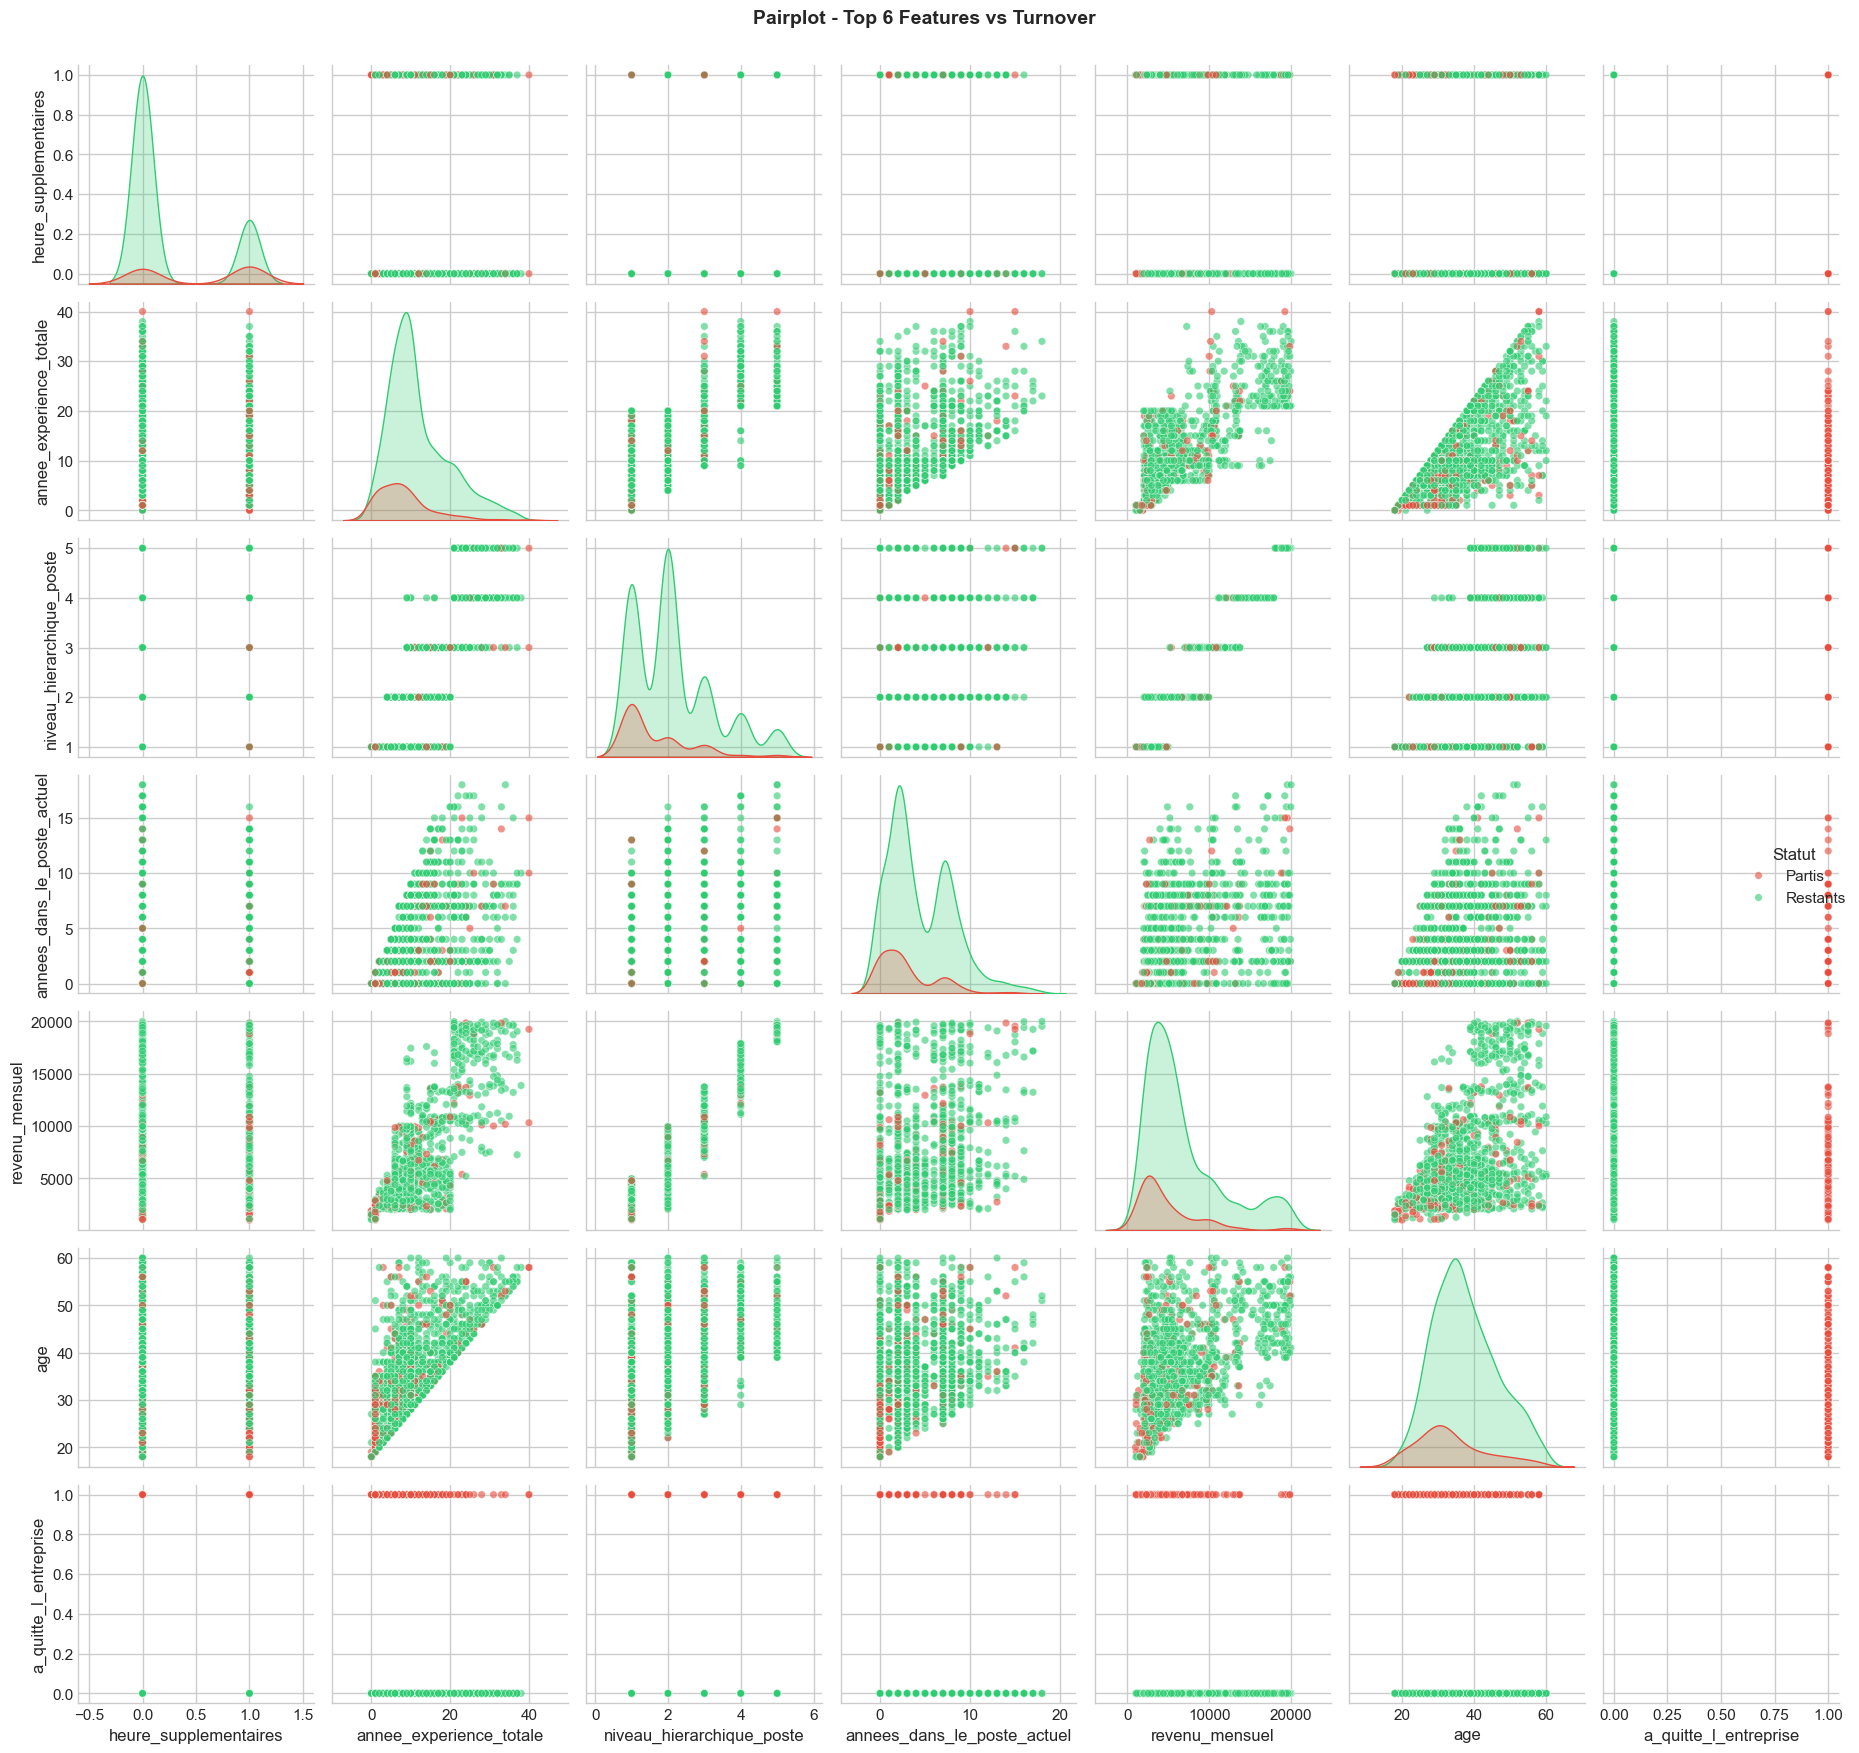

In [54]:
# 5️ PAIRPLOT POUR VISUALISER LES CORRÉLATIONS NON-LINÉAIRES

print("="*70)
print("5. PAIRPLOT - VISUALISATION DES RELATIONS NON-LINÉAIRES")
print("="*70)

# Sélectionner les top features corrélées avec la cible (pour lisibilité)
target_corr = corr_pearson['a_quitte_l_entreprise'].drop('a_quitte_l_entreprise').abs().sort_values(ascending=False)
top_features = target_corr.head(6).index.tolist()

print(f"Top 6 features les plus corrélées avec le turnover:")
for feat in top_features:
    print(f"   - {feat}: r = {corr_pearson.loc[feat, 'a_quitte_l_entreprise']:.3f}")

# Créer le pairplot
pairplot_data = df_merged[top_features + ['a_quitte_l_entreprise']].copy()
pairplot_data['Statut'] = pairplot_data['a_quitte_l_entreprise'].map({0: 'Restants', 1: 'Partis'})

pairplot = sns.pairplot(pairplot_data, hue='Statut', palette={'Restants': '#2ecc71', 'Partis': '#e74c3c'},
                        diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30}, height=2.5)
pairplot.fig.suptitle('Pairplot - Top 6 Features vs Turnover', fontweight='bold', fontsize=14, y=1.001)
plt.tight_layout()
plt.show()

6. COMPARAISON PEARSON vs SPEARMAN (Linéaire vs Monotone)
                    Feature  Pearson (Linéaire)  Spearman (Monotone)   Différence
      heure_supplementaires            0.246118             0.246118 2.775558e-17
    annee_experience_totale           -0.171063            -0.199002 2.793877e-02
  niveau_hierarchique_poste           -0.169105            -0.190370 2.126567e-02
annees_dans_le_poste_actuel           -0.160545            -0.180623 2.007803e-02
             revenu_mensuel           -0.159840            -0.198305 3.846542e-02
                        age           -0.159205            -0.171214 1.200915e-02


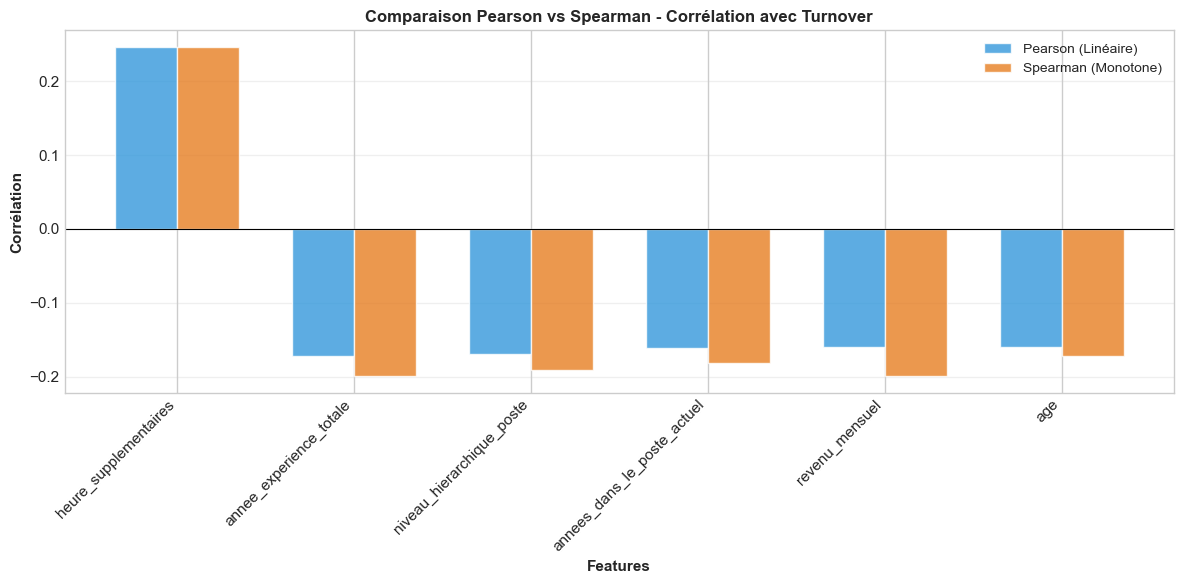

In [55]:
# 6 COMPARAISON PEARSON vs SPEARMAN
print("="*70)
print("6. COMPARAISON PEARSON vs SPEARMAN (Linéaire vs Monotone)")
print("="*70)

comparison = pd.DataFrame({
    'Feature': top_features,
    'Pearson (Linéaire)': [corr_pearson.loc[f, 'a_quitte_l_entreprise'] for f in top_features],
    'Spearman (Monotone)': [spearman_corr.loc[f, 'a_quitte_l_entreprise'] for f in top_features]
})

comparison['Différence'] = (comparison['Spearman (Monotone)'] - comparison['Pearson (Linéaire)']).abs()
comparison = comparison.sort_values('Pearson (Linéaire)', key=abs, ascending=False)

print(comparison.to_string(index=False))

# Visualiser la comparaison
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(comparison))
width = 0.35

ax.bar(x - width/2, comparison['Pearson (Linéaire)'], width, label='Pearson (Linéaire)', alpha=0.8, color='#3498db')
ax.bar(x + width/2, comparison['Spearman (Monotone)'], width, label='Spearman (Monotone)', alpha=0.8, color='#e67e22')

ax.set_xlabel('Features', fontweight='bold', fontsize=11)
ax.set_ylabel('Corrélation', fontweight='bold', fontsize=11)
ax.set_title('Comparaison Pearson vs Spearman - Corrélation avec Turnover', fontweight='bold', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(comparison['Feature'], rotation=45, ha='right')
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

plt.tight_layout()
plt.show()


## Encodage des variables

In [56]:
# ============================================================
# 7️ STRATÉGIE D'ENCODING DES VARIABLES CATÉGORIQUE
# ============================================================

print("="*70)
print("7. ANALYSE DES VARIABLES CATÉGORIQUE - STRATÉGIE D'ENCODING")
print("="*70)

encoding_strategy = {}

# Analyser chaque variable catégorique
for col in categorical_features:
    n_unique = df_merged[col].nunique()

    print(f"{col.upper()}")
    print(f"   Nombre de catégories: {n_unique}")
    print(f"   Valeurs: {df_merged[col].unique()}")

    # Calculer le turnover par catégorie
    turnover_by_cat = df_merged.groupby(col)['a_quitte_l_entreprise'].agg(['sum', 'count', 'mean'])
    turnover_by_cat.columns = ['Partis', 'Total', 'Taux Turnover']
    turnover_by_cat['Taux Turnover'] = (turnover_by_cat['Taux Turnover'] * 100).round(2)

    print(f"\n   Turnover par catégorie:")
    print(f"   {turnover_by_cat.to_string()}")

    # Décider de la stratégie d'encoding
    if n_unique == 2:
        strategy = "Binary Encoding (0/1)"
        print(f"Stratégie: {strategy}")
        encoding_strategy[col] = 'binary'

    elif col in ['departement', 'poste']:  # Variables nominales avec ordre hiérarchique
        strategy = "One-Hot Encoding (hiérarchie métier)"
        print(f"Stratégie: {strategy}")
        encoding_strategy[col] = 'onehot'

    elif col == 'domaine_etude':  # Variable nominale sans ordre
        strategy = "One-Hot Encoding (ou Target Encoding)"
        print(f" Stratégie: {strategy}")
        encoding_strategy[col] = 'onehot'

    elif n_unique <= 5:
        strategy = "Ordinal Encoding ou One-Hot (peu de catégories)"
        print(f"Stratégie: {strategy}")
        encoding_strategy[col] = 'onehot'

    else:
        strategy = "Target Encoding (nombreuses catégories)"
        print(f"Stratégie: {strategy}")
        encoding_strategy[col] = 'target'

7. ANALYSE DES VARIABLES CATÉGORIQUE - STRATÉGIE D'ENCODING
GENRE
   Nombre de catégories: 2
   Valeurs: ['F' 'M']

   Turnover par catégorie:
          Partis  Total  Taux Turnover
genre                              
F          87    588          14.80
M         150    882          17.01
Stratégie: Binary Encoding (0/1)
STATUT_MARITAL
   Nombre de catégories: 3
   Valeurs: ['Célibataire' 'Marié(e)' 'Divorcé(e)']

   Turnover par catégorie:
                   Partis  Total  Taux Turnover
statut_marital                              
Célibataire        120    470          25.53
Divorcé(e)          33    327          10.09
Marié(e)            84    673          12.48
Stratégie: Ordinal Encoding ou One-Hot (peu de catégories)
DEPARTEMENT
   Nombre de catégories: 3
   Valeurs: ['Commercial' 'Consulting' 'Ressources Humaines']

   Turnover par catégorie:
                        Partis  Total  Taux Turnover
departement                                      
Commercial               92    446  

In [57]:
# ============================================================
# 8️ APPLIQUER L'ENCODING
# ============================================================

print("="*70)
print("8. APPLICATION DE L'ENCODING")
print("="*70)

df_encoded = df_merged.copy()

8. APPLICATION DE L'ENCODING


In [58]:
# 1️ BINARY ENCODING (Oui/Non -> 1/0)
binary_cols = ['genre', 'statut_marital', 'ayant_enfants', 'heure_supplementaires']

print(f"BINARY ENCODING:")
for col in binary_cols:
    if col in df_encoded.columns:
        # Trouver les valeurs uniques
        unique_vals = df_encoded[col].unique()
        print(f"   {col}: {unique_vals}")

# Genre
df_encoded['genre'] = (df_encoded['genre'] == 'M').astype(int)
print(f"   {col} encodé (M=1, F=0)")

# Statut marital - Créer variable binaire Marié(e) vs autres
df_encoded['est_marie'] = (df_encoded['statut_marital'] == 'Marié(e)').astype(int)
print(f"    statut_marital → est_marie (Marié=1, Autres=0)")
df_encoded.drop('statut_marital', axis=1, inplace=True)

# Ayant enfants et heure_supplementaires sont déjà binaires
print(f"    ayant_enfants et heure_supplementaires sont déjà en 0/1")

BINARY ENCODING:
   genre: ['F' 'M']
   statut_marital: ['Célibataire' 'Marié(e)' 'Divorcé(e)']
   heure_supplementaires: [1 0]
   heure_supplementaires encodé (M=1, F=0)
    statut_marital → est_marie (Marié=1, Autres=0)
    ayant_enfants et heure_supplementaires sont déjà en 0/1


In [59]:
# 2️ ONE-HOT ENCODING (Nominales sans ordre)
onehot_cols = ['departement', 'domaine_etude']

print(f" ONE-HOT ENCODING:")
for col in onehot_cols:
    if col in df_encoded.columns:
        n_cats = df_encoded[col].nunique()
        print(f"   {col}: {n_cats} catégories")

        # One-hot encoding
        onehot = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
        df_encoded = pd.concat([df_encoded, onehot], axis=1)
        df_encoded.drop(col, axis=1, inplace=True)
        print(f"   ✅ {col} one-hot encodé → {list(onehot.columns)}")

 ONE-HOT ENCODING:
   departement: 3 catégories
   ✅ departement one-hot encodé → ['departement_Consulting', 'departement_Ressources Humaines']
   domaine_etude: 6 catégories
   ✅ domaine_etude one-hot encodé → ['domaine_etude_Entrepreunariat', 'domaine_etude_Infra & Cloud', 'domaine_etude_Marketing', 'domaine_etude_Ressources Humaines', 'domaine_etude_Transformation Digitale']


In [60]:
# 3️ ORDINAL ENCODING (Hiérarchiques: poste)

print(f"ORDINAL ENCODING (Hiérarchique):")

# Définir l'ordre hiérarchique des postes
poste_order = {
    'Consultant': 1,
    'Assistant de Direction': 2,
    'Tech Lead': 3,
    'Manager': 4,
    'Cadre Commercial': 5,
    'Représentant Commercial': 6,
    'Directeur Technique': 7,
    'Senior Manager': 8,
    'Ressources Humaines': 4  # Équivalent Manager
}

print(f"   poste - Ordre hiérarchique:")
for poste, level in sorted(poste_order.items(), key=lambda x: x[1]):
    print(f"      {poste}: {level}")

df_encoded['poste_level'] = df_encoded['poste'].map(poste_order)
df_encoded.drop('poste', axis=1, inplace=True)
print(f"    poste → poste_level (ordinal)")

ORDINAL ENCODING (Hiérarchique):
   poste - Ordre hiérarchique:
      Consultant: 1
      Assistant de Direction: 2
      Tech Lead: 3
      Manager: 4
      Ressources Humaines: 4
      Cadre Commercial: 5
      Représentant Commercial: 6
      Directeur Technique: 7
      Senior Manager: 8
    poste → poste_level (ordinal)


In [61]:
# 4️ ORDINAL ENCODING (Fréquence de déplacement)

if 'frequence_deplacement' in df_encoded.columns:
    print(f"\n🔹 ORDINAL ENCODING (Ordinale: Fréquence):")

    freq_order = {
        'Aucun': 0,
        'Occasionnel': 1,
        'Frequent': 2
    }

    print(f"   frequence_deplacement - Ordre:")
    for freq, level in sorted(freq_order.items(), key=lambda x: x[1]):
        print(f"      {freq}: {level}")

    df_encoded['freq_deplacement_level'] = df_encoded['frequence_deplacement'].map(freq_order)
    df_encoded.drop('frequence_deplacement', axis=1, inplace=True)
    print(f"   frequence_deplacement → freq_deplacement_level (ordinal)")


🔹 ORDINAL ENCODING (Ordinale: Fréquence):
   frequence_deplacement - Ordre:
      Aucun: 0
      Occasionnel: 1
      Frequent: 2
   frequence_deplacement → freq_deplacement_level (ordinal)


In [62]:
# 5️ ORDINAL ENCODING (Niveau d'éducation)

if 'niveau_education' in df_encoded.columns:
    print(f"ORDINAL ENCODING (Ordinale: Niveau d'Éducation):")

    education_order = {
        1: 1,  # Bac
        2: 2,  # Bac+2
        3: 3,  # Bac+3/+4
        4: 4,  # Master
        5: 5   # Doctorat
    }

    print(f"   niveau_education - Ordre:")
    for edu, level in sorted(education_order.items(), key=lambda x: x[1]):
        print(f"      Niveau {edu}: {level}")

    # C'est déjà numérique, on peut le garder
    print(f"   Niveau_education conservé (déjà ordinal)")

ORDINAL ENCODING (Ordinale: Niveau d'Éducation):
   niveau_education - Ordre:
      Niveau 1: 1
      Niveau 2: 2
      Niveau 3: 3
      Niveau 4: 4
      Niveau 5: 5
   Niveau_education conservé (déjà ordinal)


In [63]:
# Retirer les colonnes d'ID et code sondage
cols_to_drop = ['ID', 'id_employee', 'eval_number', 'code_sondage', 'nombre_heures_travailless']
for col in cols_to_drop:
    if col in df_encoded.columns:
        df_encoded.drop(col, axis=1, inplace=True)

display(f"Shape final: {df_encoded.shape}")
display(f" Colonnes finales ({len(df_encoded.columns)}):")
display(df_encoded.columns.tolist())

'Shape final: (1470, 34)'

' Colonnes finales (34):'

['age',
 'genre',
 'revenu_mensuel',
 'nombre_experiences_precedentes',
 'annee_experience_totale',
 'annees_dans_l_entreprise',
 'annees_dans_le_poste_actuel',
 'satisfaction_employee_environnement',
 'note_evaluation_precedente',
 'niveau_hierarchique_poste',
 'satisfaction_employee_nature_travail',
 'satisfaction_employee_equipe',
 'satisfaction_employee_equilibre_pro_perso',
 'note_evaluation_actuelle',
 'heure_supplementaires',
 '% augementation_salaire_precedente',
 'satisfaction_media',
 'a_quitte_l_entreprise',
 'nombre_participation_pee',
 'nb_formations_suivies',
 'distance_domicile_travail',
 'niveau_education',
 'annees_depuis_la_derniere_promotion',
 'annes_sous_responsable_actuel',
 'est_marie',
 'departement_Consulting',
 'departement_Ressources Humaines',
 'domaine_etude_Entrepreunariat',
 'domaine_etude_Infra & Cloud',
 'domaine_etude_Marketing',
 'domaine_etude_Ressources Humaines',
 'domaine_etude_Transformation Digitale',
 'poste_level',
 'freq_deplacement_level']

## Featuring engeenering

In [64]:
# SECCIÓN 3: FEATURE ENGINEERING
# ============================================

df_fe = df_encoded.copy()

# 20+ features nuevos
df_fe['ratio_exp_entreprise'] = df_fe['annee_experience_totale'] / (df_fe['annees_dans_l_entreprise'] + 1)
#df_fe['ratio_exp_poste'] = df_fe['annees_dans_le_poste_actuel'] / (df_fe['annee_experience_totale'] + 1)
#df_fe['senior_age'] = (df_fe['age'] > 45).astype(int)
#df_fe['senior_exp'] = (df_fe['annee_experience_totale'] > 15).astype(int)
#df_fe['anciennete_longue'] = (df_fe['annees_dans_l_entreprise'] > 8).astype(int)
#df_fe['revenu_par_exp'] = df_fe['revenu_mensuel'] / (df_fe['annee_experience_totale'] + 1)
df_fe['revenu_par_age'] = df_fe['revenu_mensuel'] / (df_fe['age'] + 1)
#df_fe['perf_alta'] = (df_fe['note_evaluation_actuelle'] >= 4.0).astype(int)
#df_fe['exp_cuadrado'] = df_fe['annee_experience_totale'] ** 2
#df_fe['revenu_log'] = np.log1p(df_fe['revenu_mensuel'])
df_fe['age_group'] = pd.cut(df_fe['age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=[0, 1, 2, 3, 4, 5]).astype(int)
df_fe['satisfaccion_media'] = df_fe[['satisfaction_employee_environnement', 'satisfaction_employee_nature_travail',
                                      'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso']].mean(axis=1)

print(f"Features ingenierie: +{df_fe.shape[1] - df_encoded.shape[1]} neufs")

Features ingenierie: +4 neufs


C:\Users\j-a-b\AppData\Local\Temp\ipykernel_7100\1332585509.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comparaison_no_overtime = df_no_overtime.groupby(['age_group_labels', 'status']).size().unstack(fill_value=0)
C:\Users\j-a-b\AppData\Local\Temp\ipykernel_7100\1332585509.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comparaison_with_overtime = df_with_overtime.groupby(['age_group_labels', 'status']).size().unstack(fill_value=0)


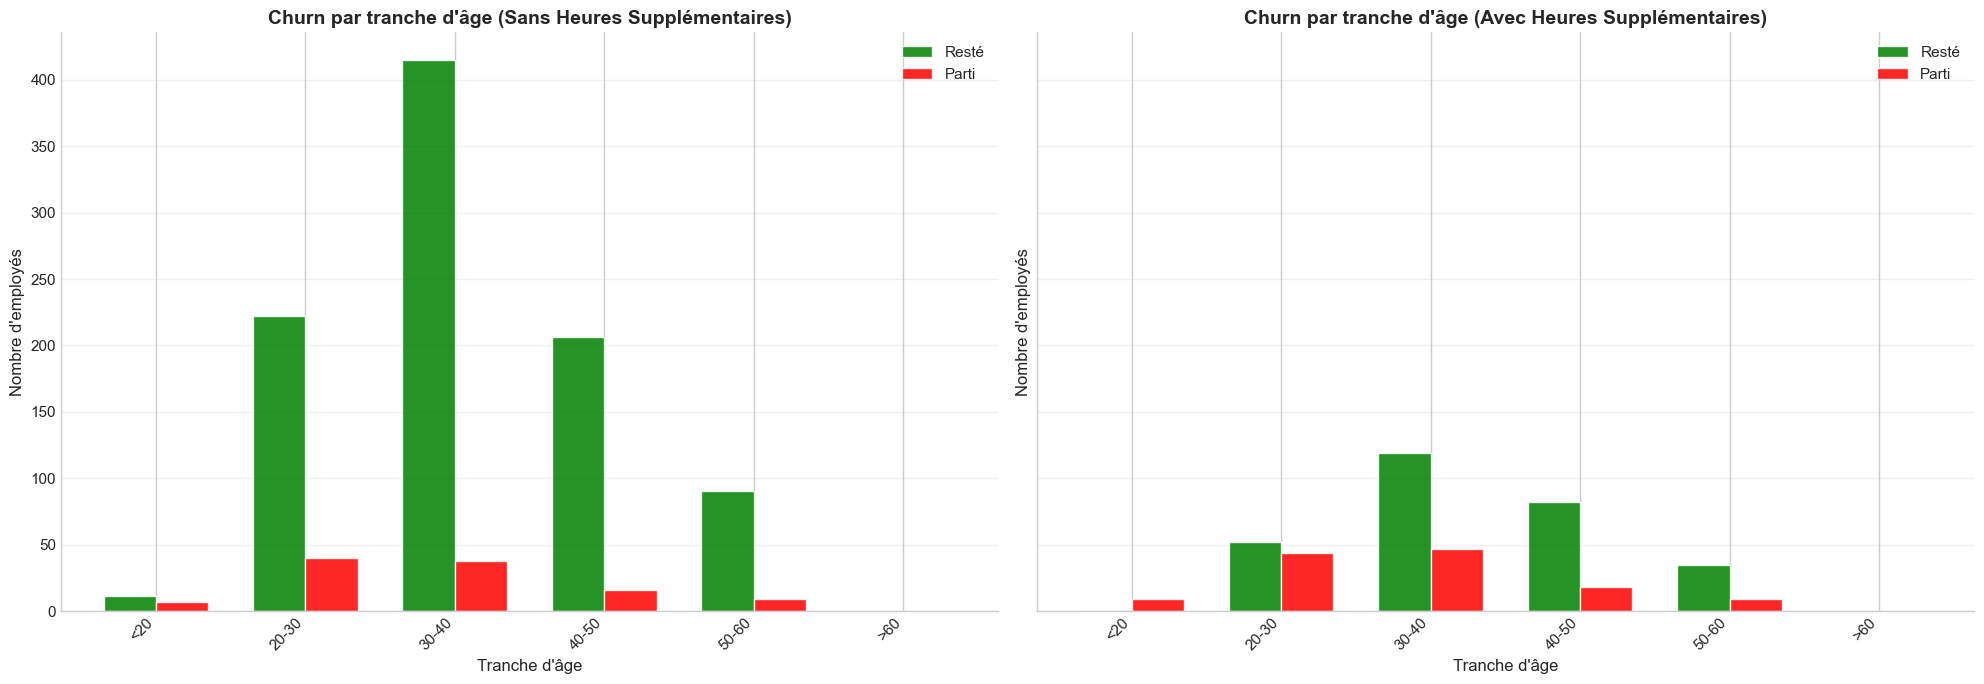

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create age_group_labels for consistent plotting without modifying df_fe['age_group']
age_group_labels = pd.cut(df_fe['age'], bins=[0, 20, 30, 40, 50, 60, 100],
                           labels=['<20', '20-30', '30-40', '40-50', '50-60', '>60'])
# Create a temporary df_plot to avoid modifying df_fe globally
df_plot = df_fe.copy()
df_plot['status'] = df_plot['a_quitte_l_entreprise'].map({0: 'Resté', 1: 'Parti'})

# Filter data for employees without overtime
df_no_overtime = df_plot[df_plot['heure_supplementaires'] == 0].copy() # Use .copy() to avoid SettingWithCopyWarning
df_no_overtime['age_group_labels'] = age_group_labels # Add labels to temporary df
# Group by age_group_labels and status to count employees
comparaison_no_overtime = df_no_overtime.groupby(['age_group_labels', 'status']).size().unstack(fill_value=0)

# Filter data for employees with overtime
df_with_overtime = df_plot[df_plot['heure_supplementaires'] == 1].copy() # Use .copy()
df_with_overtime['age_group_labels'] = age_group_labels # Add labels to temporary df
# Group by age_group_labels and status to count employees
comparaison_with_overtime = df_with_overtime.groupby(['age_group_labels', 'status']).size().unstack(fill_value=0)

# Create two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)
width = 0.35
x_indices = range(len(comparaison_no_overtime.index))

# Plot for employees without overtime
axes[0].bar([i - width/2 for i in x_indices], comparaison_no_overtime['Resté'], width, label='Resté', color='green', alpha=0.85)
axes[0].bar([i + width/2 for i in x_indices], comparaison_no_overtime['Parti'], width, label='Parti', color='red', alpha=0.85)
axes[0].set_title('Churn par tranche d\'âge (Sans Heures Supplémentaires)', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Tranche d\'âge')
axes[0].set_ylabel('Nombre d\'employés')
axes[0].set_xticks(x_indices)
axes[0].set_xticklabels(comparaison_no_overtime.index, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
sns.despine(ax=axes[0])

# Plot for employees with overtime
axes[1].bar([i - width/2 for i in x_indices], comparaison_with_overtime['Resté'], width, label='Resté', color='green', alpha=0.85)
axes[1].bar([i + width/2 for i in x_indices], comparaison_with_overtime['Parti'], width, label='Parti', color='red', alpha=0.85)
axes[1].set_title('Churn par tranche d\'âge (Avec Heures Supplémentaires)', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Tranche d\'âge')
axes[1].set_ylabel('Nombre d\'employés')
axes[1].set_xticks(x_indices)
axes[1].set_xticklabels(comparaison_with_overtime.index, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()

C:\Users\j-a-b\AppData\Local\Temp\ipykernel_7100\976279365.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comparaison = df_plot.groupby(['age_group_labels', 'status'])['satisfaccion_media'].mean().unstack(fill_value=0)


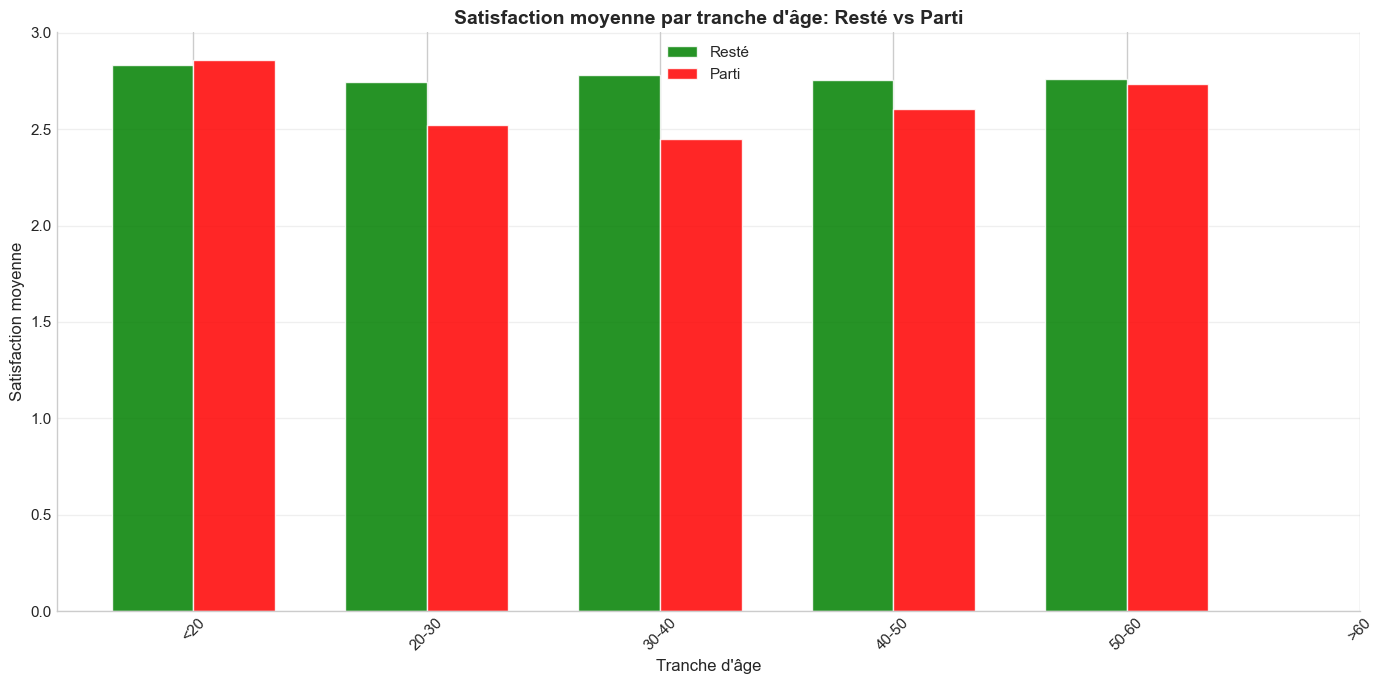

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create age_group_labels with readable labels for plotting
age_group_labels = pd.cut(df_fe['age'], bins=[0, 20, 30, 40, 50, 60, 100],
                           labels=['<20', '20-30', '30-40', '40-50', '50-60', '>60'])

# Mapper quitta
df_plot = df_fe.copy()
df_plot['age_group_labels'] = age_group_labels # Add labels to temporary df
df_plot['status'] = df_plot['a_quitte_l_entreprise'].map({0: 'Resté', 1: 'Parti'}) # Corrected mapping to use numerical values

# Barplot groupé
comparaison = df_plot.groupby(['age_group_labels', 'status'])['satisfaccion_media'].mean().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
width = 0.35
x = range(len(comparaison.index))

plt.bar([i - width/2 for i in x], comparaison['Resté'], width, label='Resté', color='green', alpha=0.85)
plt.bar([i + width/2 for i in x], comparaison['Parti'], width, label='Parti', color='red', alpha=0.85)

plt.title('Satisfaction moyenne par tranche d\'âge: Resté vs Parti', fontweight='bold', fontsize=14)
plt.xlabel('Tranche d\'âge')
plt.ylabel('Satisfaction moyenne')
plt.xticks(x, comparaison.index, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

C:\Users\j-a-b\AppData\Local\Temp\ipykernel_7100\2499927597.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comparaison = df_plot.groupby(['age_group_labels', 'status']).size().unstack(fill_value=0)


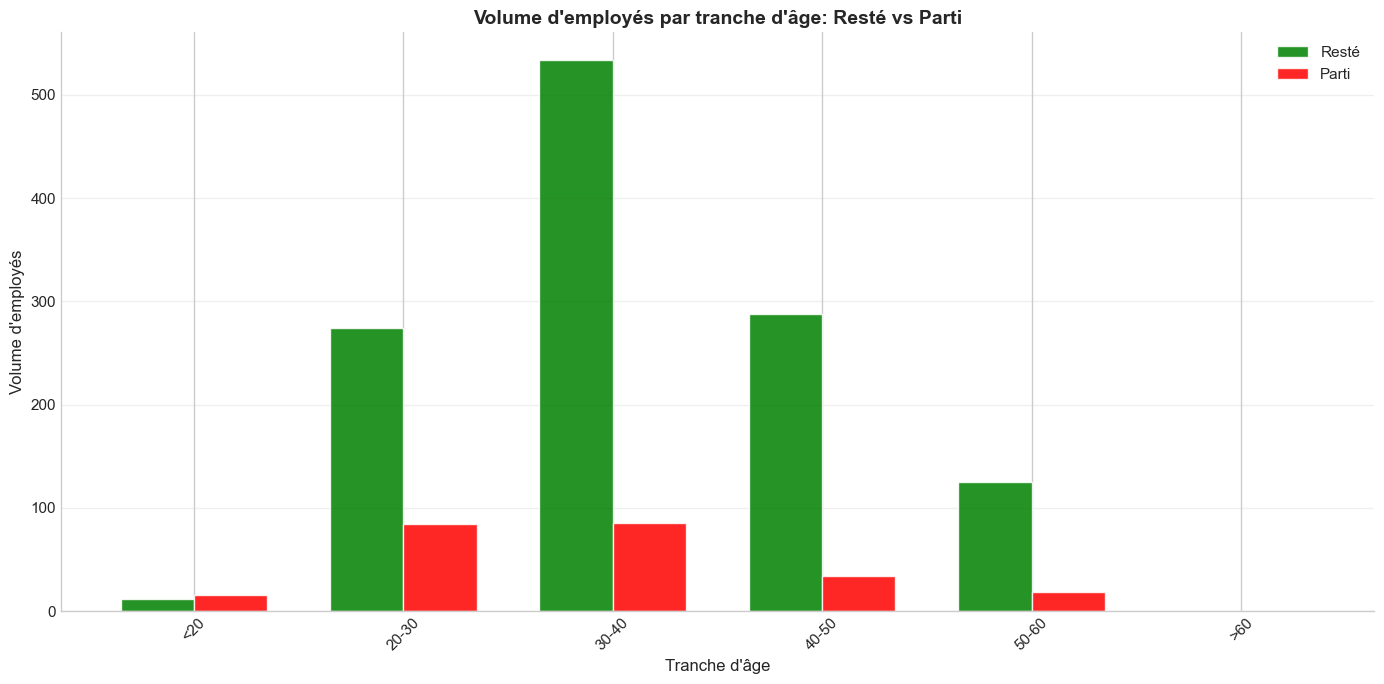

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create age_group_labels for consistent plotting without modifying df_fe['age_group']
age_group_labels = pd.cut(df_fe['age'], bins=[0, 20, 30, 40, 50, 60, 100],
                           labels=['<20', '20-30', '30-40', '40-50', '50-60', '>60'])
# Create a temporary df_plot to avoid modifying df_fe globally
df_plot = df_fe.copy()
df_plot['status'] = df_plot['a_quitte_l_entreprise'].map({0: 'Resté', 1: 'Parti'})

title = 'Volume d\'employés'

# Calculate the count of employees per age group and status
df_plot['age_group_labels'] = age_group_labels
comparaison = df_plot.groupby(['age_group_labels', 'status']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
width = 0.35
x = range(len(comparaison.index))

plt.bar([i - width/2 for i in x], comparaison['Resté'], width, label='Resté', color='green', alpha=0.85)
plt.bar([i + width/2 for i in x], comparaison['Parti'], width, label='Parti', color='red', alpha=0.85)

plt.title(f'{title} par tranche d\'âge: Resté vs Parti', fontweight='bold', fontsize=14)
plt.xlabel('Tranche d\'âge')
plt.ylabel(f'{title}')
plt.xticks(x, comparaison.index, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

C:\Users\j-a-b\AppData\Local\Temp\ipykernel_7100\659643356.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comparaison = df_plot.groupby(['age_group_labels', 'status'])[metric_col].mean().unstack(fill_value=0)


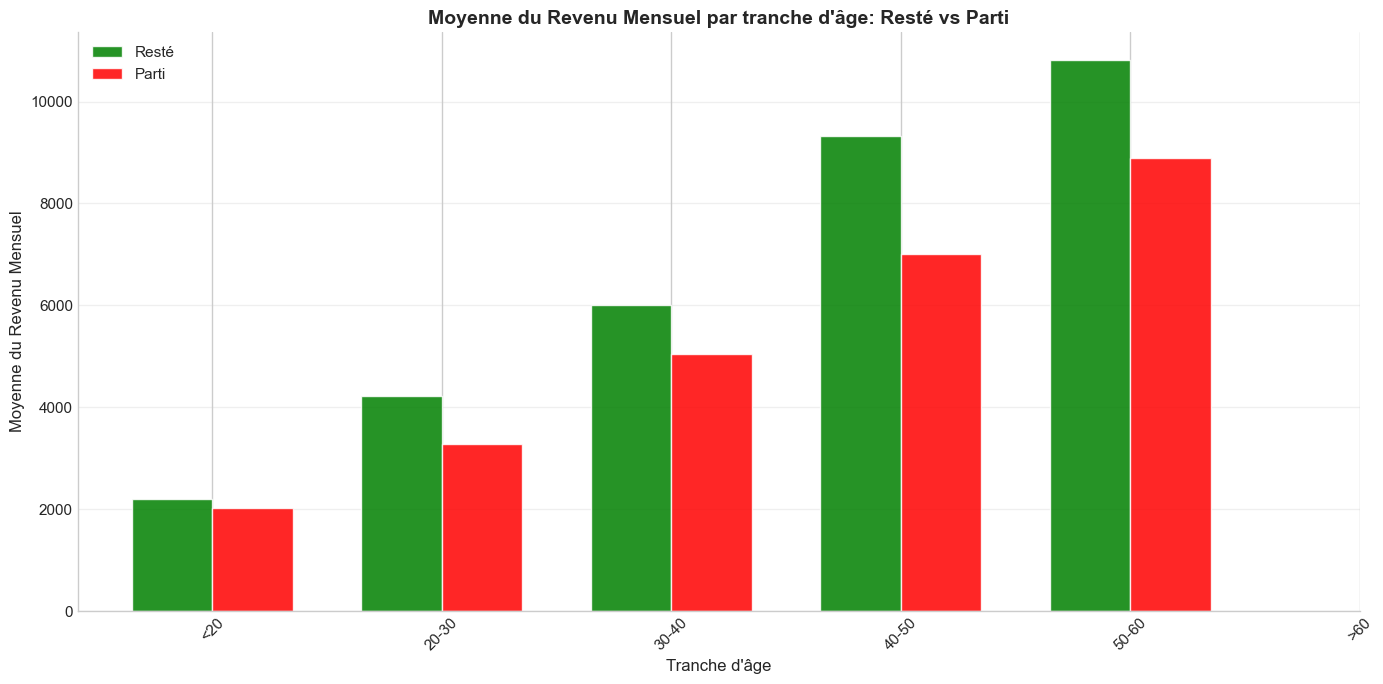

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create age_group_labels for consistent plotting without modifying df_fe['age_group']
age_group_labels = pd.cut(df_fe['age'], bins=[0, 20, 30, 40, 50, 60, 100],
                           labels=['<20', '20-30', '30-40', '40-50', '50-60', '>60'])
# Create a temporary df_plot to avoid modifying df_fe globally
df_plot = df_fe.copy()
df_plot['status'] = df_plot['a_quitte_l_entreprise'].map({0: 'Resté', 1: 'Parti'})

metric_col = 'revenu_mensuel'
title = 'Revenu Mensuel'

df_plot['age_group_labels'] = age_group_labels
comparaison = df_plot.groupby(['age_group_labels', 'status'])[metric_col].mean().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
width = 0.35
x = range(len(comparaison.index))

plt.bar([i - width/2 for i in x], comparaison['Resté'], width, label='Resté', color='green', alpha=0.85)
plt.bar([i + width/2 for i in x], comparaison['Parti'], width, label='Parti', color='red', alpha=0.85)

plt.title(f'Moyenne du {title} par tranche d\'âge: Resté vs Parti', fontweight='bold', fontsize=14)
plt.xlabel('Tranche d\'âge')
plt.ylabel(f'Moyenne du {title}')
plt.xticks(x, comparaison.index, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

C:\Users\j-a-b\AppData\Local\Temp\ipykernel_7100\3605733847.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comparaison = df_plot.groupby(['age_group_labels', 'status'])[metric_col].mean().unstack(fill_value=0)
C:\Users\j-a-b\AppData\Local\Temp\ipykernel_7100\3605733847.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comparaison = df_plot.groupby(['age_group_labels', 'status'])[metric_col].mean().unstack(fill_value=0)


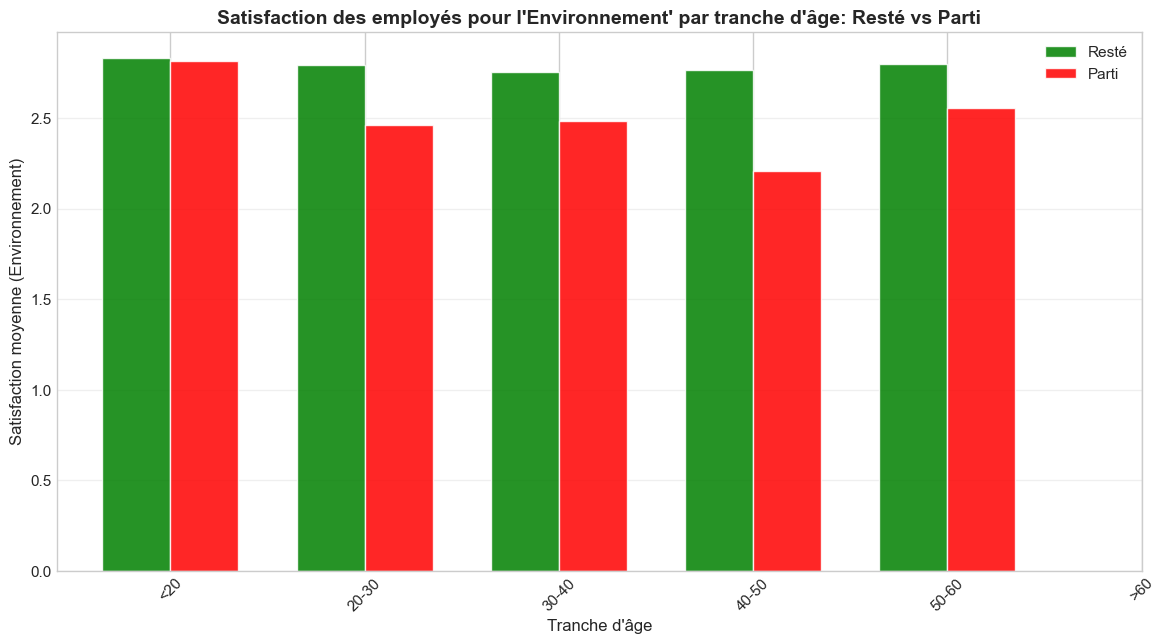

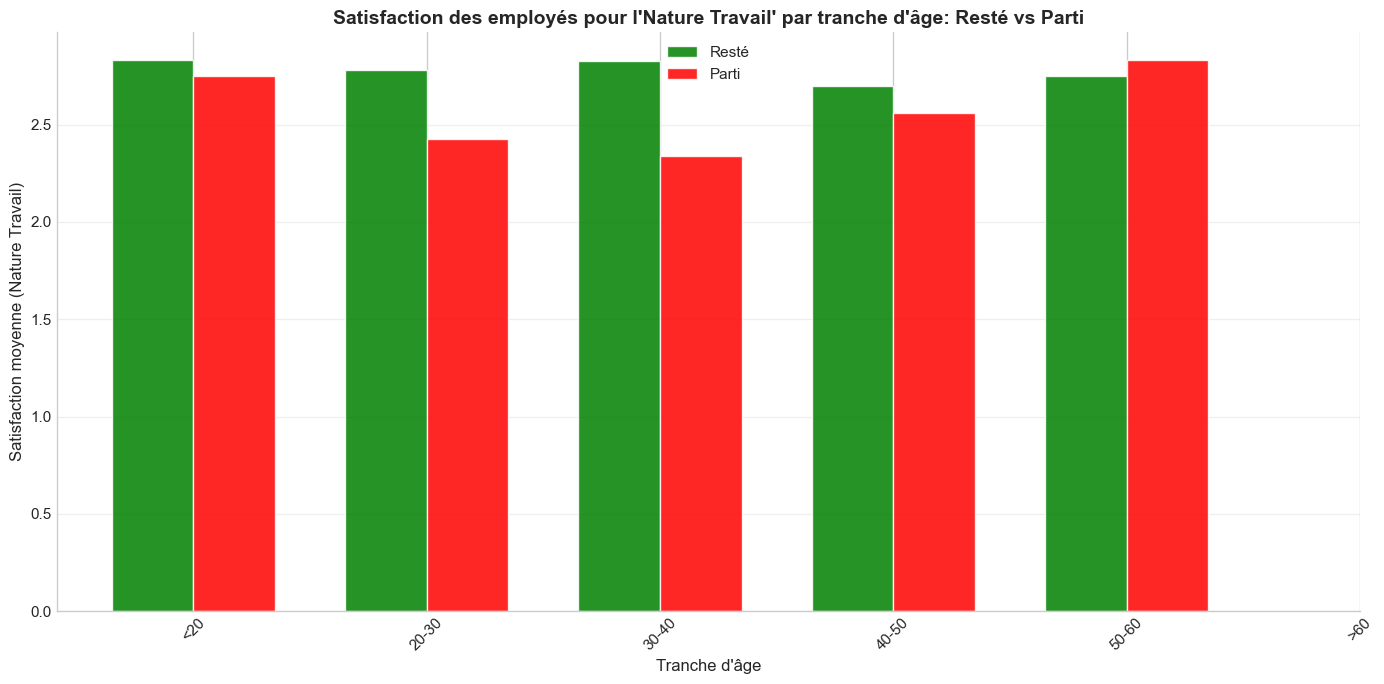

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create age_group_labels for consistent plotting without modifying df_fe['age_group']
age_group_labels = pd.cut(df_fe['age'], bins=[0, 20, 30, 40, 50, 60, 100],
                           labels=['<20', '20-30', '30-40', '40-50', '50-60', '>60'])
# Create a temporary df_plot_global to avoid modifying df_fe globally
df_plot_global = df_fe.copy()
df_plot_global['status'] = df_plot_global['a_quitte_l_entreprise'].map({0: 'Resté', 1: 'Parti'})

satisfaction_metrics = {
    'Environnement': 'satisfaction_employee_environnement',
    'Nature Travail': 'satisfaction_employee_nature_travail'
}

for title, metric_col in satisfaction_metrics.items():
    df_plot = df_plot_global.copy() # Copy from df_plot_global for each iteration
    df_plot['age_group_labels'] = age_group_labels
    comparaison = df_plot.groupby(['age_group_labels', 'status'])[metric_col].mean().unstack(fill_value=0)

    plt.figure(figsize=(14, 7))
    width = 0.35
    x = range(len(comparaison.index))

    plt.bar([i - width/2 for i in x], comparaison['Resté'], width, label='Resté', color='green', alpha=0.85)
    plt.bar([i + width/2 for i in x], comparaison['Parti'], width, label='Parti', color='red', alpha=0.85)

    plt.title(f'Satisfaction des employés pour l\'{title}\' par tranche d\'âge: Resté vs Parti', fontweight='bold', fontsize=14)
    plt.xlabel('Tranche d\'âge')
    plt.ylabel(f'Satisfaction moyenne ({title})')
    plt.xticks(x, comparaison.index, rotation=45)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

In [70]:
# The 'status' column was added to df_fe in previous plotting cells,
# causing a ValueError when scaling. Removed these temporary status creations from df_fe.
# The 'age_group' column is now correctly an int64 due to the fix in 1N_y3Ikvs_4Y.
# This cell is no longer needed as df_fe.info() is sufficient for verification.

In [71]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        1470 non-null   int64  
 1   genre                                      1470 non-null   int64  
 2   revenu_mensuel                             1470 non-null   int64  
 3   nombre_experiences_precedentes             1470 non-null   int64  
 4   annee_experience_totale                    1470 non-null   int64  
 5   annees_dans_l_entreprise                   1470 non-null   int64  
 6   annees_dans_le_poste_actuel                1470 non-null   int64  
 7   satisfaction_employee_environnement        1470 non-null   int64  
 8   note_evaluation_precedente                 1470 non-null   int64  
 9   niveau_hierarchique_poste                  1470 non-null   int64  
 10  satisfaction_employee_na

## Résumé Analyses explo


1. BINARY ENCODING (0/1):
   - genre (M=1, F=0)
   - est_marie (Marié=1, Autres=0)
   - ayant_enfants (déjà en 0/1)
   - heure_supplementaires (déjà en 0/1)

2. ONE-HOT ENCODING (variables nominales):
   - departement (Commercial, Consulting, Ressources Humaines)
   - domaine_etude (Infra & Cloud, Transformation Digitale, etc.)

3. ORDINAL ENCODING (variables ordinales/hiérarchiques):
   - poste_level (1=Consultant → 8=Senior Manager)
   - freq_deplacement_level (0=Aucun → 2=Frequent)
   - niveau_education (1=Bac → 5=Doctorat) [conservé tel quel]

4. VARIABLES NUMÉRIQUES CONSERVÉES:
   - age, revenu_mensuel, nombre_experiences_precedentes
   - annee_experience_totale, annees_dans_l_entreprise, annees_dans_le_poste_actuel
   - satisfaction_employee_* (toutes les variables de satisfaction)
   - note_evaluation_*, nb_formations_suivies
   - annees_depuis_la_derniere_promotion, distance_domicile_travail
   - augementation_salaire_precedente, nombre_participation_pee
   - nombre_employee_sous_responsabilite, annes_sous_responsable_actuel

5. VARIABLES SUPPRIMÉES:
   - id_employee, eval_number, code_sondage, nombre_heures_travailless
   - statut_marital (remplacée par est_marie)
   - poste (remplacée par poste_level)
   - frequence_deplacement (remplacée par freq_deplacement_level)

PRÊT POUR LA MODÉLISATION!

##Modelisation X et Y

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, f1_score,
                             precision_score, recall_score, confusion_matrix,
                             classification_report, roc_curve, auc)

In [73]:
#PREPARE DATA
print("Preparing data for modeling...")

# Ensure 'status' column is not in X, as it's a string and only for visualization
if 'status' in df_fe.columns:
    X = df_fe.drop(['a_quitte_l_entreprise', 'status'], axis=1)
else:
    X = df_fe.drop('a_quitte_l_entreprise', axis=1)

y = df_fe['a_quitte_l_entreprise']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train: {X_train.shape[0]} | Test: {X_test.shape[0]}")

Preparing data for modeling...
Train: 1176 | Test: 294


#Etape 3: Modelisation, 1er entrainement

##Dummy

In [74]:
# DUMMY MODELS
# ============================================================


print("="*70)
print("DUMMY MODELS (BASELINES)")
print("="*70)

dummy_models = {
    'Most Frequent': DummyClassifier(strategy='most_frequent'),
    'Stratified': DummyClassifier(strategy='stratified', random_state=42),
    'Uniform': DummyClassifier(strategy='uniform', random_state=42),
    'Constant (0)': DummyClassifier(strategy='constant', constant=0),
    'Constant (1)': DummyClassifier(strategy='constant', constant=1),
}

dummy_results = {}

print("Training dummy models...")

for name, model in dummy_models.items():
    print(f"  {name}...")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    except:
        roc_auc = 0.5

    test_acc = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred, zero_division=0)
    test_prec = precision_score(y_test, y_pred, zero_division=0)
    test_rec = recall_score(y_test, y_pred, zero_division=0)

    dummy_results[name] = {
        'Accuracy': test_acc,
        'ROC-AUC': roc_auc,
        'F1': test_f1,
        'Precision': test_prec,
        'Recall': test_rec,
        'y_pred': y_pred
    }

    print(f"     Accuracy: {test_acc:.4f} | ROC-AUC: {roc_auc:.4f} | F1: {test_f1:.4f}")

DUMMY MODELS (BASELINES)
Training dummy models...
  Most Frequent...
     Accuracy: 0.8673 | ROC-AUC: 0.5000 | F1: 0.0000
  Stratified...
     Accuracy: 0.7279 | ROC-AUC: 0.4739 | F1: 0.1111
  Uniform...
     Accuracy: 0.5170 | ROC-AUC: 0.5000 | F1: 0.2283
  Constant (0)...
     Accuracy: 0.8673 | ROC-AUC: 0.5000 | F1: 0.0000
  Constant (1)...
     Accuracy: 0.1327 | ROC-AUC: 0.5000 | F1: 0.2342


Creating visualizations...


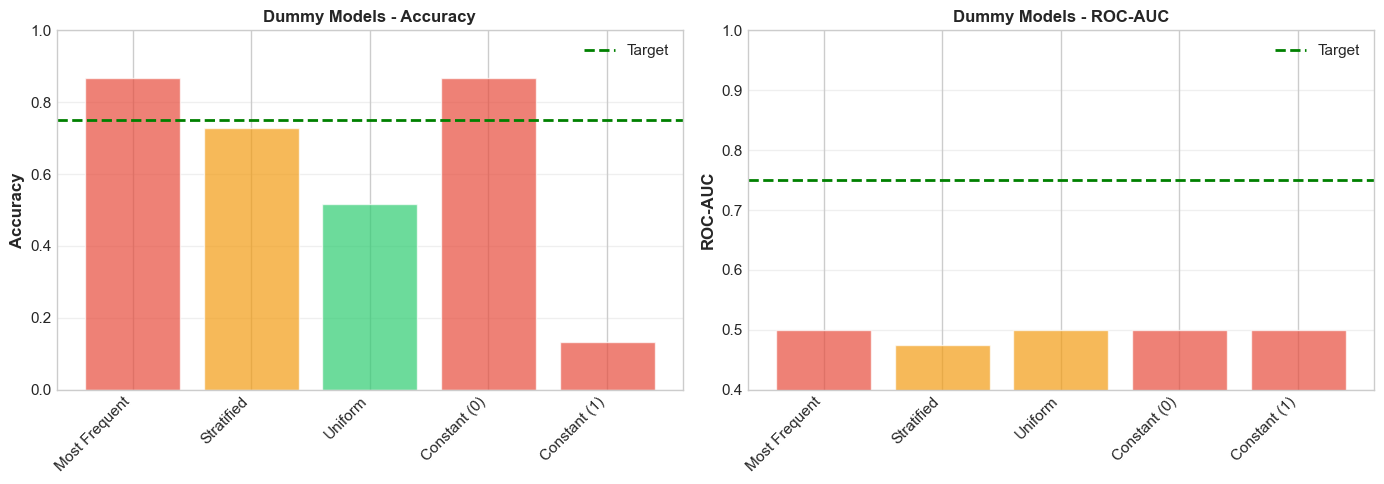

In [75]:
# VISUALIZE
print("Creating visualizations...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
ax = axes[0]
accs = [dummy_results[m]['Accuracy'] for m in dummy_models.keys()]
colors = ['#e74c3c', '#f39c12', '#2ecc71', '#e74c3c', '#e74c3c']
ax.bar(range(len(dummy_models)), accs, color=colors, alpha=0.7)
ax.set_ylabel('Accuracy', fontweight='bold')
ax.set_title('Dummy Models - Accuracy', fontweight='bold')
ax.set_xticks(range(len(dummy_models)))
ax.set_xticklabels(dummy_models.keys(), rotation=45, ha='right')
ax.axhline(y=0.75, color='green', linestyle='--', linewidth=2, label='Target')
ax.set_ylim([0, 1])
ax.legend()
ax.grid(axis='y', alpha=0.3)

# ROC-AUC
ax = axes[1]
rocs = [dummy_results[m]['ROC-AUC'] for m in dummy_models.keys()]
colors = ['#e74c3c', '#f39c12', '#f39c12', '#e74c3c', '#e74c3c']
ax.bar(range(len(dummy_models)), rocs, color=colors, alpha=0.7)
ax.set_ylabel('ROC-AUC', fontweight='bold')
ax.set_title('Dummy Models - ROC-AUC', fontweight='bold')
ax.set_xticks(range(len(dummy_models)))
ax.set_xticklabels(dummy_models.keys(), rotation=45, ha='right')
ax.axhline(y=0.75, color='green', linestyle='--', linewidth=2, label='Target')
ax.set_ylim([0.4, 1])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [76]:
# SUMMARY
print("="*70)
print("DUMMY MODEL SUMMARY")
print("="*70)

print("Evaluation des modèles 'Dummy':")

summary_data = []
for name, metrics in dummy_results.items():
    summary_data.append([name,
                         metrics['Accuracy'],
                         metrics['Recall'],
                         metrics['Precision'],
                         metrics['F1'],
                         metrics['ROC-AUC']])

df_summary = pd.DataFrame(summary_data, columns=['Modèle', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC-AUC'])
print(df_summary.to_string(index=False))

print("\nObservation: Les modèles dummy établissent une base de référence. Tout modèle performant devra obtenir des métriques significativement supérieures à celles-ci.")

DUMMY MODEL SUMMARY
Evaluation des modèles 'Dummy':
       Modèle  Accuracy   Recall  Precision  F1-Score  ROC-AUC
Most Frequent  0.867347 0.000000   0.000000  0.000000 0.500000
   Stratified  0.727891 0.128205   0.098039  0.111111 0.473906
      Uniform  0.517007 0.538462   0.144828  0.228261 0.500000
 Constant (0)  0.867347 0.000000   0.000000  0.000000 0.500000
 Constant (1)  0.132653 1.000000   0.132653  0.234234 0.500000

Observation: Les modèles dummy établissent une base de référence. Tout modèle performant devra obtenir des métriques significativement supérieures à celles-ci.


## Logistic Regression

In [77]:
# ============================================
# MODÈLE LINÉAIRE (RÉGRESSION LOGISTIQUE)
# ============================================================
print("="*80)
print("STEP 3: MODÈLE LINÉAIRE (RÉGRESSION LOGISTIQUE)")
print("="*80)

print("Entraînement Régression Logistique...")

# SANS class_weight='balanced'
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42
)

lr_model.fit(X_train_scaled, y_train)

y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)
y_proba_lr_test = lr_model.predict_proba(X_test_scaled)[:, 1]

# MÉTRIQUES TRAIN
lr_acc_train = accuracy_score(y_train, y_pred_lr_train)
lr_recall_train = recall_score(y_train, y_pred_lr_train)
lr_precision_train = precision_score(y_train, y_pred_lr_train)
lr_f1_train = f1_score(y_train, y_pred_lr_train)

# MÉTRIQUES TEST
lr_acc_test = accuracy_score(y_test, y_pred_lr_test)
lr_recall_test = recall_score(y_test, y_pred_lr_test)
lr_precision_test = precision_score(y_test, y_pred_lr_test)
lr_f1_test = f1_score(y_test, y_pred_lr_test)
lr_roc_auc = roc_auc_score(y_test, y_proba_lr_test)
lr_cm = confusion_matrix(y_test, y_pred_lr_test)

print(f"RÉSULTATS RÉGRESSION LOGISTIQUE:")
print(f"  ENSEMBLE D'ENTRAÎNEMENT:")
print(f"     Accurancy: {lr_acc_train:.4f}")
print(f"     Rappel: {lr_recall_train:.4f}")
print(f"     Précision: {lr_precision_train:.4f}")
print(f"     F1-Score: {lr_f1_train:.4f}")
print(f"  ENSEMBLE DE TEST:")
print(f"     Accurancy: {lr_acc_test:.4f}")
print(f"     Rappel: {lr_recall_test:.4f}")
print(f"     Précision: {lr_precision_test:.4f}")
print(f"     F1-Score: {lr_f1_test:.4f}")
print(f"     ROC-AUC: {lr_roc_auc:.4f}")

print(f"Matrice de confusion (Régression Logistique):")
print(f"   VN: {lr_cm[0,0]} | FP: {lr_cm[0,1]}")
print(f"   FN: {lr_cm[1,0]} | VP: {lr_cm[1,1]}")

print(f"Rapport de classification (Régression Logistique):")
print(classification_report(y_test, y_pred_lr_test,
                          target_names=['Reste', 'Parti']))

# VÉRIFICATION OVERFITTING
ecart_acc = abs(lr_acc_train - lr_acc_test)
print(f" VÉRIFICATION OVERFITTING: écart Accurancy = {ecart_acc:.4f}")
print(f"   {'PAS D\'OVERFITTING' if ecart_acc < 0.05 else ' SURAPPRentissage POTENTIEL'}")

print(f" IMPACT METIER:")
print(f"   → {lr_cm[1,0]} FN")

STEP 3: MODÈLE LINÉAIRE (RÉGRESSION LOGISTIQUE)
Entraînement Régression Logistique...
RÉSULTATS RÉGRESSION LOGISTIQUE:
  ENSEMBLE D'ENTRAÎNEMENT:
     Accurancy: 0.8946
     Rappel: 0.4949
     Précision: 0.8033
     F1-Score: 0.6125
  ENSEMBLE DE TEST:
     Accurancy: 0.8946
     Rappel: 0.3846
     Précision: 0.6818
     F1-Score: 0.4918
     ROC-AUC: 0.7962
Matrice de confusion (Régression Logistique):
   VN: 248 | FP: 7
   FN: 24 | VP: 15
Rapport de classification (Régression Logistique):
              precision    recall  f1-score   support

       Reste       0.91      0.97      0.94       255
       Parti       0.68      0.38      0.49        39

    accuracy                           0.89       294
   macro avg       0.80      0.68      0.72       294
weighted avg       0.88      0.89      0.88       294

 VÉRIFICATION OVERFITTING: écart Accurancy = 0.0000
   PAS D'OVERFITTING
 IMPACT METIER:
   → 24 FN


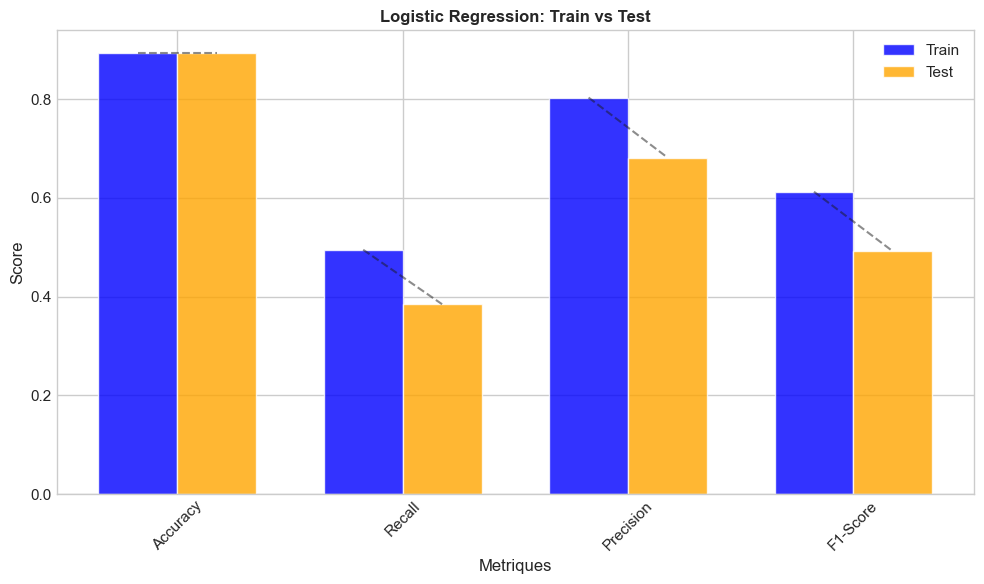

In [78]:
import pandas as pd
import numpy as np

# DataFrame métricas
metrics_data = {
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1-Score'],
    'Train': [lr_acc_train, lr_recall_train, lr_precision_train, lr_f1_train],
    'Test': [lr_acc_test, lr_recall_test, lr_precision_test, lr_f1_test]
}
df_metrics = pd.DataFrame(metrics_data)

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(df_metrics))
width = 0.35

ax.bar(x - width/2, df_metrics['Train'], width, label='Train', alpha=0.8, color='blue')
ax.bar(x + width/2, df_metrics['Test'], width, label='Test', alpha=0.8, color='orange')

ax.set_xlabel('Metriques')
ax.set_ylabel('Score')
ax.set_title('Logistic Regression: Train vs Test', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df_metrics['Metric'])
ax.legend()
ax.tick_params(axis='x', rotation=45)

# Línea overfitting gap
for i, row in df_metrics.iterrows():
    ax.plot([i-width/2, i+width/2], [row['Train'], row['Test']], 'k--', alpha=0.5)

plt.tight_layout()
plt.show()

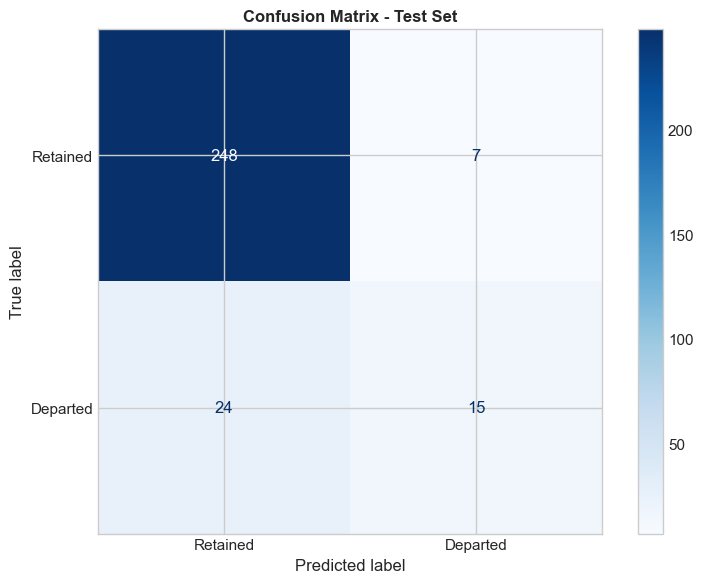

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=['Retained', 'Departed'])
disp.plot(ax=ax, cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix - Test Set', fontweight='bold')
plt.tight_layout()
plt.show()


##Random Forest

In [80]:
# NON-LINEAR MODEL (RANDOM FOREST)
# ============================================================
print("="*80)
print("STEP 4: NON-LINEAR MODEL (RANDOM FOREST)")
print("="*80)

print(" Training Random Forest...")

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)
y_proba_rf_test = rf_model.predict_proba(X_test)[:, 1]

rf_acc_train = accuracy_score(y_train, y_pred_rf_train)
rf_recall_train = recall_score(y_train, y_pred_rf_train)
rf_precision_train = precision_score(y_train, y_pred_rf_train)
rf_f1_train = f1_score(y_train, y_pred_rf_train)

rf_acc_test = accuracy_score(y_test, y_pred_rf_test)
rf_recall_test = recall_score(y_test, y_pred_rf_test)
rf_precision_test = precision_score(y_test, y_pred_rf_test)
rf_f1_test = f1_score(y_test, y_pred_rf_test)
rf_roc_auc = roc_auc_score(y_test, y_proba_rf_test)
rf_cm = confusion_matrix(y_test, y_pred_rf_test)

print(f"RANDOM FOREST RESULTS:")
print(f"  TRAIN SET:")
print(f"     Accuracy: {rf_acc_train:.4f}")
print(f"     Recall: {rf_recall_train:.4f}")
print(f"     Precision: {rf_precision_train:.4f}")
print(f"     F1-Score: {rf_f1_train:.4f}")
print(f"   TEST SET:")
print(f"     Accuracy: {rf_acc_test:.4f}")
print(f"     Recall: {rf_recall_test:.4f}")
print(f"     Precision: {rf_precision_test:.4f}")
print(f"     F1-Score: {rf_f1_test:.4f}")
print(f"     ROC-AUC: {rf_roc_auc:.4f}")

print(f" Confusion Matrix (Random Forest):")
print(f"   TN: {rf_cm[0,0]} | FP: {rf_cm[0,1]}")
print(f"   FN: {rf_cm[1,0]} | TP: {rf_cm[1,1]}")
print(f" Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf_test, target_names=['Retained', 'Departed']))

acc_diff_rf = abs(rf_acc_train - rf_acc_test)
print(f" OVERFITTING CHECK: Accuracy gap = {acc_diff_rf:.4f}")
print(f"   {' NO OVERFITTING' if acc_diff_rf < 0.10 else '  OVERFITTING DETECTED'}")

STEP 4: NON-LINEAR MODEL (RANDOM FOREST)
 Training Random Forest...
RANDOM FOREST RESULTS:
  TRAIN SET:
     Accuracy: 0.9796
     Recall: 0.8788
     Precision: 1.0000
     F1-Score: 0.9355
   TEST SET:
     Accuracy: 0.8776
     Recall: 0.1026
     Precision: 0.8000
     F1-Score: 0.1818
     ROC-AUC: 0.8144
 Confusion Matrix (Random Forest):
   TN: 254 | FP: 1
   FN: 35 | TP: 4
 Classification Report (Random Forest):
              precision    recall  f1-score   support

    Retained       0.88      1.00      0.93       255
    Departed       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

 OVERFITTING CHECK: Accuracy gap = 0.1020
     OVERFITTING DETECTED


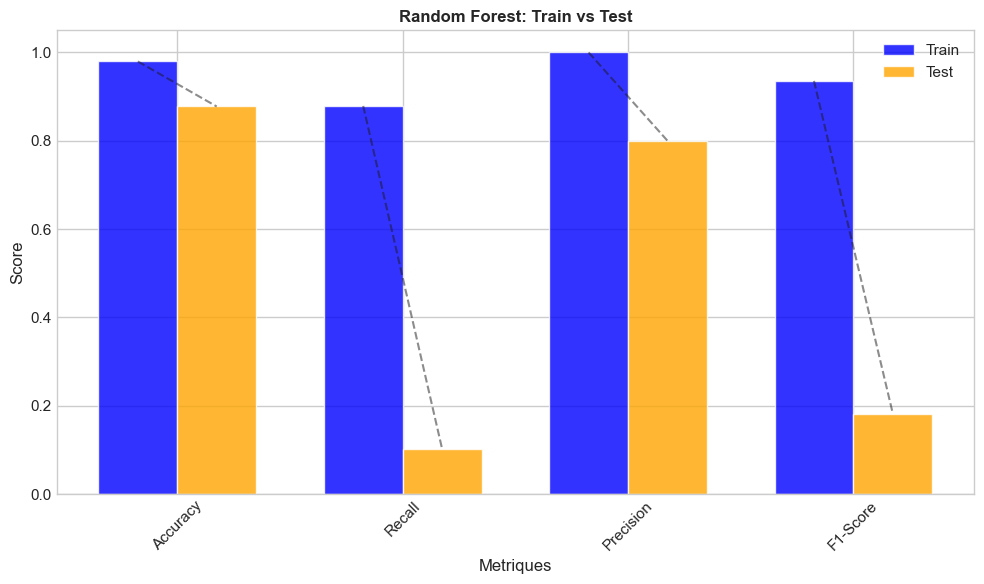

In [81]:
import pandas as pd
import numpy as np

# DataFrame métricas
metrics_data_rf = {
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1-Score'],
    'Train': [rf_acc_train, rf_recall_train, rf_precision_train, rf_f1_train],
    'Test': [rf_acc_test, rf_recall_test, rf_precision_test, rf_f1_test]
}
df_metrics_rf = pd.DataFrame(metrics_data_rf)

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(df_metrics_rf))
width = 0.35

ax.bar(x - width/2, df_metrics_rf['Train'], width, label='Train', alpha=0.8, color='blue')
ax.bar(x + width/2, df_metrics_rf['Test'], width, label='Test', alpha=0.8, color='orange')

ax.set_xlabel('Metriques')
ax.set_ylabel('Score')
ax.set_title('Random Forest: Train vs Test', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df_metrics_rf['Metric'])
ax.legend()
ax.tick_params(axis='x', rotation=45)

# Línea overfitting gap
for i, row in df_metrics_rf.iterrows():
    ax.plot([i-width/2, i+width/2], [row['Train'], row['Test']], 'k--', alpha=0.5)

plt.tight_layout()
plt.show()

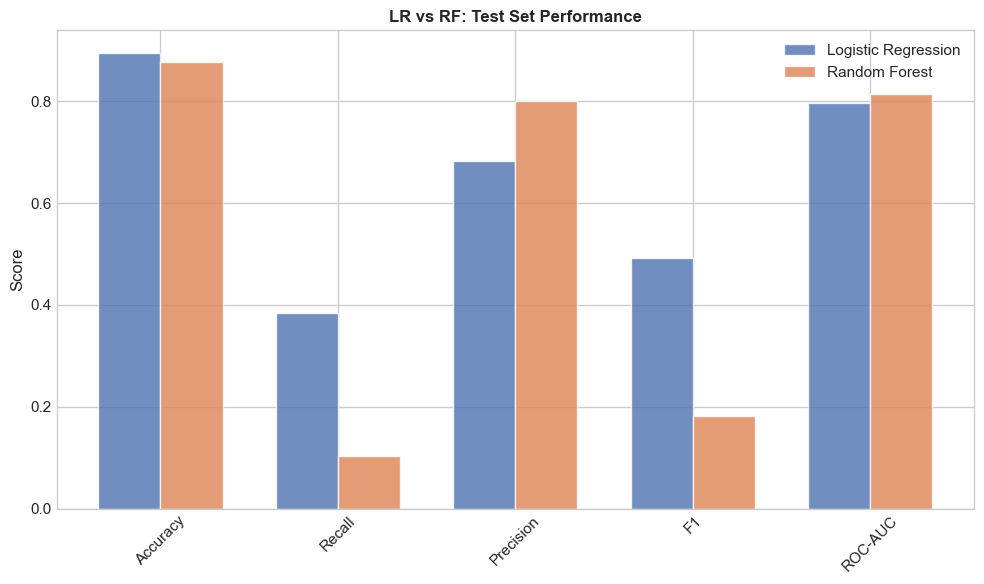

In [82]:
import pandas as pd
import numpy as np

# DataFrame comparativo (asumiendo vars LR del paso anterior)
models_data = {
    'Modelo': ['Accuracy', 'Recall', 'Precision', 'F1', 'ROC-AUC'],
    'Logistic': [lr_acc_test, lr_recall_test, lr_precision_test, lr_f1_test, lr_roc_auc],
    'RandomForest': [rf_acc_test, rf_recall_test, rf_precision_test, rf_f1_test, rf_roc_auc]
}
df_models = pd.DataFrame(models_data)

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(df_models))
width = 0.35

ax.bar(x - width/2, df_models['Logistic'], width, label='Logistic Regression', alpha=0.8)
ax.bar(x + width/2, df_models['RandomForest'], width, label='Random Forest', alpha=0.8)

ax.set_title('LR vs RF: Test Set Performance', fontweight='bold')
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(df_models['Modelo'])
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\j-a-b\AppData\Local\Temp\ipykernel_7100\1726714048.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x='importance', y='feature', palette='viridis')


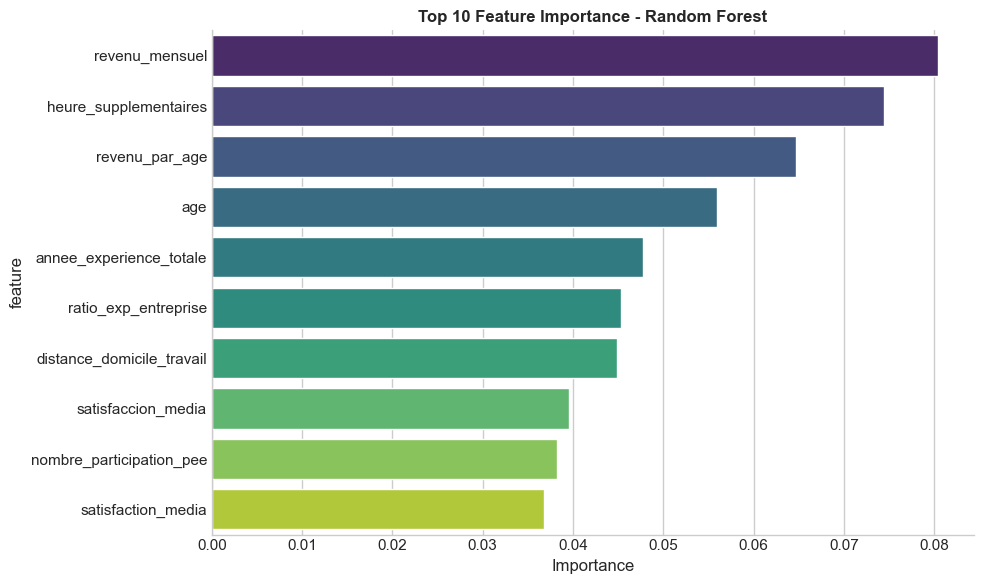

In [83]:
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances, x='importance', y='feature', palette='viridis')
plt.title('Top 10 Feature Importance - Random Forest', fontweight='bold')
plt.xlabel('Importance')
sns.despine()
plt.tight_layout()
plt.show()

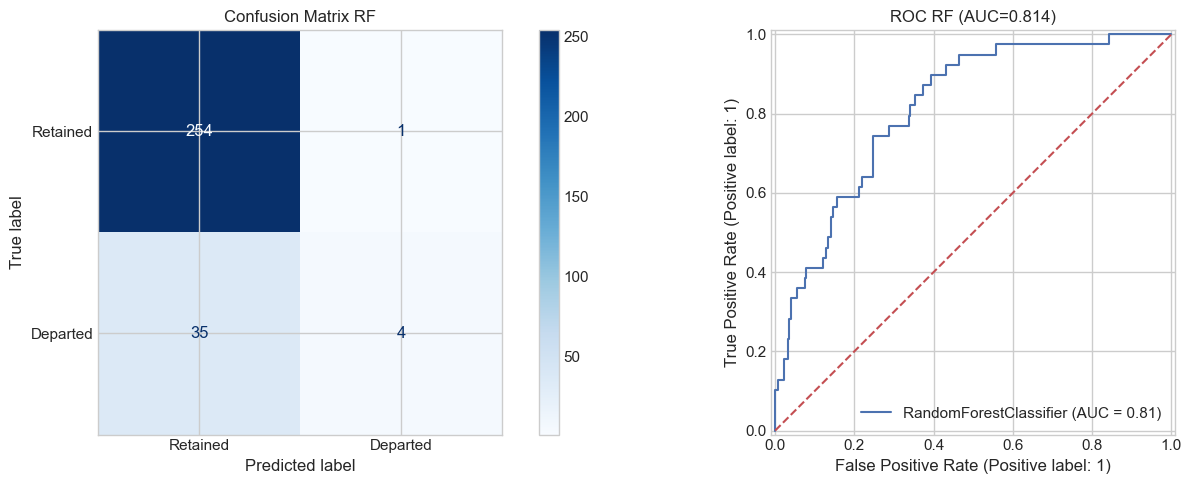

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix
ConfusionMatrixDisplay(rf_cm, display_labels=['Retained', 'Departed']).plot(ax=ax1, cmap='Blues')
ax1.set_title('Confusion Matrix RF')

# ROC
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, ax=ax2)
ax2.plot([0,1],[0,1],'r--')
ax2.set_title(f'ROC RF (AUC={rf_roc_auc:.3f})')

plt.tight_layout()
plt.show()

C:\Users\j-a-b\AppData\Local\Temp\ipykernel_7100\4038700248.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


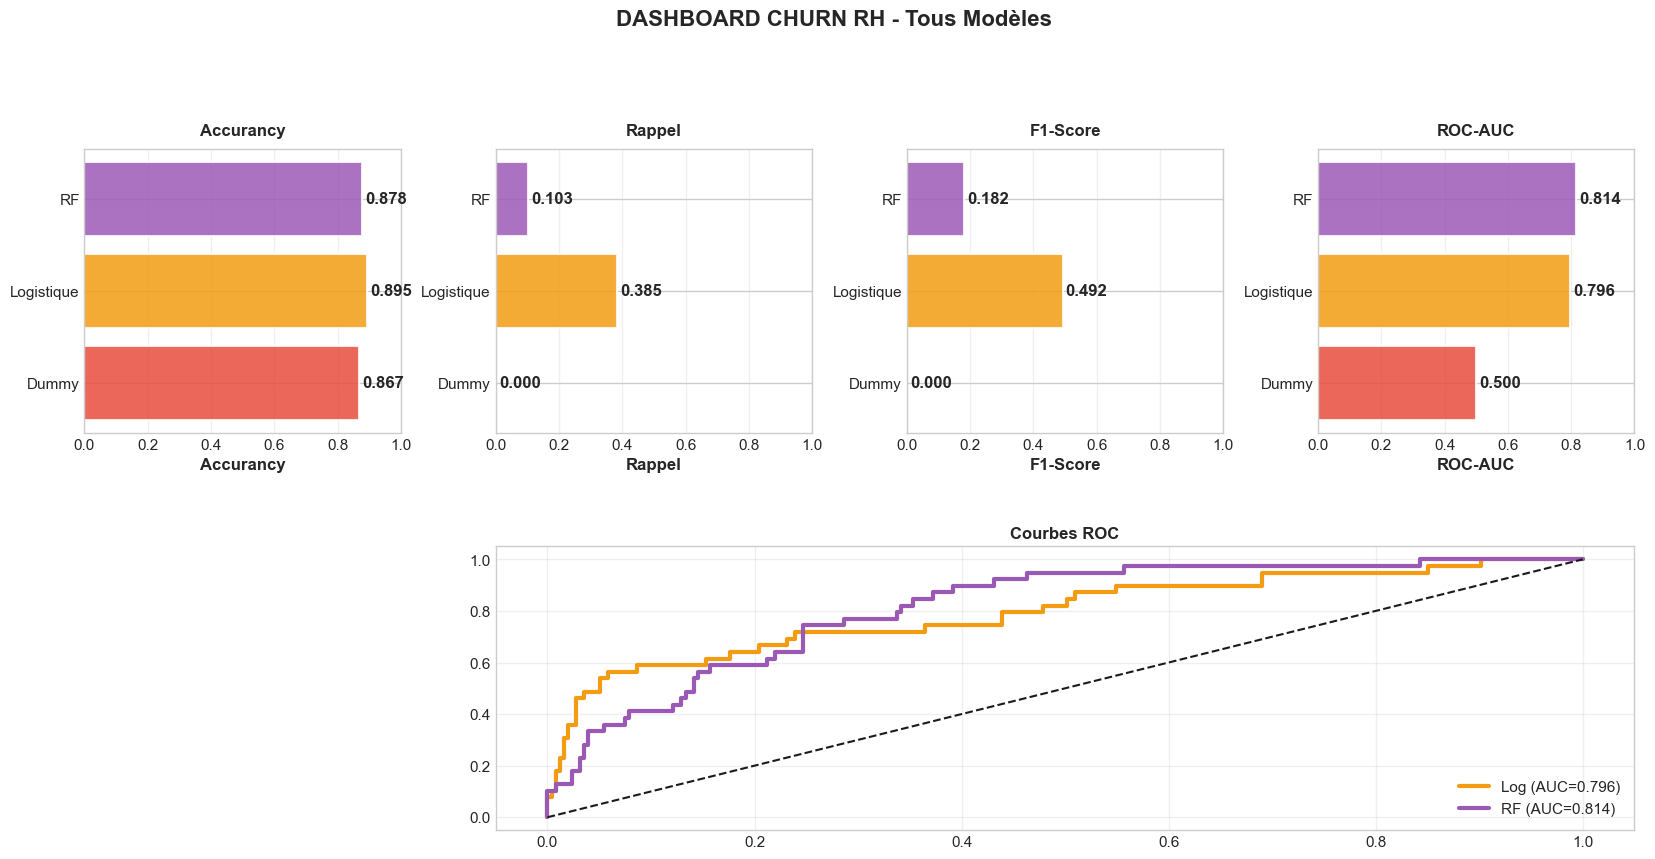

In [85]:
# ============================================================
# VISUALISATIONS AMÉLIORÉES
# ============================================================

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 4, hspace=0.4, wspace=0.3)

colors = ['#e74c3c', '#f39c12', '#9b59b6', '#2ecc71', '#1abc9c']
models_fr = ['Dummy', 'Logistique', 'RF']
models_acc = [dummy_results['Most Frequent']['Accuracy'], lr_acc_test, rf_acc_test]
models_recall = [dummy_results['Most Frequent']['Recall'], lr_recall_test, rf_recall_test]
models_f1 = [dummy_results['Most Frequent']['F1'], lr_f1_test, rf_f1_test]
models_roc_auc = [dummy_results['Most Frequent']['ROC-AUC'], lr_roc_auc, rf_roc_auc]

# 1-4: Métriques (barres horizontales)
metrics = [('Accurancy', models_acc), ('Rappel', models_recall), ('F1-Score', models_f1), ('ROC-AUC', models_roc_auc)]
for i, (metrique, values) in enumerate(metrics):
    ax = fig.add_subplot(gs[0, i])
    bars = ax.barh(models_fr, values, color=colors, alpha=0.85, edgecolor='white', linewidth=1.5)
    ax.set_title(metrique, fontweight='bold', fontsize=12, pad=10)
    ax.set_xlabel(metrique, fontweight='bold')
    ax.set_xlim(0, 1)
    ax.grid(axis='x', alpha=0.3)
    for bar, val in zip(bars, values):
        ax.text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.3f}', va='center', fontweight='bold')

# 8: ROC multiples
ax8 = fig.add_subplot(gs[1, 1:])
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr_test)
ax8.plot(fpr_lr, tpr_lr, lw=3, label=f'Log (AUC={lr_roc_auc:.3f})', color=colors[1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf_test)
ax8.plot(fpr_rf, tpr_rf, lw=3, label=f'RF (AUC={rf_roc_auc:.3f})', color=colors[2])

ax8.plot([0,1],[0,1],'k--')
ax8.set_title('Courbes ROC', fontweight='bold')
ax8.legend(loc='lower right')
ax8.grid(alpha=0.3)

plt.suptitle('DASHBOARD CHURN RH - Tous Modèles', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('dashboard_churn.png', dpi=300, bbox_inches='tight')
plt.show()

#Etape 4: Amelioration de l'approche de classification (gestion de classes)

In [86]:
#PREPARE DATA
print("Preparing data for modeling...")

X = df_fe.drop(['a_quitte_l_entreprise'], axis=1)
y = df_fe['a_quitte_l_entreprise']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train: {X_train.shape[0]} | Test: {X_test.shape[0]}")

Preparing data for modeling...
Train: 1176 | Test: 294


In [87]:
# ========================================
# PREPARE DATA - VERSION AMÉLIORÉE
# ========================================
print("Préparation données améliorée pour modélisation...")

X = df_fe.drop(['a_quitte_l_entreprise'], axis=1)
y = df_fe['a_quitte_l_entreprise']

# 1. SPLIT STRATIFIÉ (✅ DÉJÀ PARFAIT)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. ROBUSTSCALER (✅ DÉJÀ PARFAIT)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔥 AJOUT 1: VÉRIFICATION PROPORTIONS
print(f"Total: {len(y)} | Train: {len(y_train)} | Test: {len(y_test)}")
print(f"Train Oui: {(y_train == 1).sum()}/{len(y_train)} ({y_train.mean():.1%})")
print(f"Test Oui: {(y_test == 1).sum()}/{len(y_test)} ({y_test.mean():.1%})")
print("✅ Proportions préservées!")

# 🔥 AJOUT 2: SMOTE SEULEMENT SUR TRAIN (ratio 1:2 doux)
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # 1 positif pour 2 négatifs
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"SMOTE Train: {X_train_smote.shape[0]} | Oui: {y_train_smote.mean():.1%}")

# 🔥 AJOUT 3: STRATIFIED K-FOLD pour validation future
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("✅ K-Fold 5 prêt pour validation croisée")

# 🔥 AJOUT 4: TIMESERIES SPLIT (si données temporelles)
try:
    # Si colonne date disponible (optionnel)
    if 'date_embauche' in X.columns:
        from sklearn.model_selection import TimeSeriesSplit
        tscv = TimeSeriesSplit(n_splits=5)
        print("✅ TimeSeriesSplit activé")
    else:
        print("ℹ️ Pas de colonne date → K-Fold standard")
except:
    pass

# VARIABLES PRÊTES POUR MODÉLISATION
print("\n📦 Données prêtes:")
print("- X_train_scaled, y_train (original)")
print("- X_train_smote, y_train_smote (équilibré)")
print("- X_test_scaled, y_test")
print("- skf (pour cross-validation)")
print("🚀 Prêt pour modélisation!")


Préparation données améliorée pour modélisation...
Total: 1470 | Train: 1176 | Test: 294
Train Oui: 190/1176 (16.2%)
Test Oui: 47/294 (16.0%)
✅ Proportions préservées!
SMOTE Train: 1479 | Oui: 33.3%
✅ K-Fold 5 prêt pour validation croisée
ℹ️ Pas de colonne date → K-Fold standard

📦 Données prêtes:
- X_train_scaled, y_train (original)
- X_train_smote, y_train_smote (équilibré)
- X_test_scaled, y_test
- skf (pour cross-validation)
🚀 Prêt pour modélisation!


In [89]:
# ========================================
# MODÈLE LINÉAIRE OPTIMISÉ (Logistic Regression)
# ============================================================
print("="*80)
print("STEP 3: MODÈLE LINÉAIRE OPTIMISÉ (Logistic Regression)")
print("="*80)

print("Entraînement Régression Logistique optimisée...")

from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Modèle optimisé
lr_model_opt = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced',
    C=0.1,                    # Régularisation L2
    solver='liblinear'        # Optimisé petits datasets
)

lr_model_opt.fit(X_train_scaled, y_train)

# Prédictions baseline (seuil 0.5)
y_pred_lr_train = lr_model_opt.predict(X_train_scaled)
y_pred_lr_test = lr_model_opt.predict(X_test_scaled)
y_proba_lr_train = lr_model_opt.predict_proba(X_train_scaled)[:, 1]
y_proba_lr_test = lr_model_opt.predict_proba(X_test_scaled)[:, 1]

# 🔥 SEUIL OPTIMAL (MAX F1)
precision_curve_lr, recall_curve_lr, seuils_lr = precision_recall_curve(y_test, y_proba_lr_test)
f1_scores_lr = 2 * precision_curve_lr * recall_curve_lr / (precision_curve_lr + recall_curve_lr)
meilleur_seuil_lr = seuils_lr[np.argmax(f1_scores_lr)]

# Prédictions OPTIMISÉES (seuil optimal) ← TOUTES les variables _opt
y_pred_lr_train_opt = (y_proba_lr_train >= meilleur_seuil_lr).astype(int)
y_pred_lr_test_opt = (y_proba_lr_test >= meilleur_seuil_lr).astype(int)

# ========================================
# MÉTRIQUES OPTIMISÉES → VARIABLES _opt
# ========================================
# TRAIN OPTIMISÉ
lr_acc_train_opt = accuracy_score(y_train, y_pred_lr_train_opt)
lr_recall_train_opt = recall_score(y_train, y_pred_lr_train_opt)
lr_precision_train_opt = precision_score(y_train, y_pred_lr_train_opt, zero_division=0)
lr_f1_train_opt = f1_score(y_train, y_pred_lr_train_opt)
lr_roc_auc_train_opt = roc_auc_score(y_train, y_proba_lr_train)

# TEST OPTIMISÉ
lr_acc_test_opt = accuracy_score(y_test, y_pred_lr_test_opt)
lr_recall_test_opt = recall_score(y_test, y_pred_lr_test_opt)
lr_precision_test_opt = precision_score(y_test, y_pred_lr_test_opt, zero_division=0)
lr_f1_test_opt = f1_score(y_test, y_pred_lr_test_opt)
lr_roc_auc_test_opt = roc_auc_score(y_test, y_proba_lr_test)

# MATRICE OPTIMISÉE
lr_cm_opt = confusion_matrix(y_test, y_pred_lr_test_opt)
lr_tn_opt, lr_fp_opt, lr_fn_opt, lr_tp_opt = lr_cm_opt.ravel()

# Overfitting gap OPTIMISÉ
lr_overfitting_gap_opt = abs(lr_acc_train_opt - lr_acc_test_opt)

# AFFICHAGE
print(f"\nLOGISTIC _OPT (Seuil optimal {meilleur_seuil_lr:.3f}):")
print(f"  ENTRAÎNEMENT _opt:")
print(f"     Acc: {lr_acc_train_opt:.4f} | Rappel: {lr_recall_train_opt:.4f} | F1: {lr_f1_train_opt:.4f}")
print(f"  TEST _opt:")
print(f"     Acc: {lr_acc_test_opt:.4f} | Rappel: {lr_recall_test_opt:.4f} | F1: {lr_f1_test_opt:.4f}")
print(f"     ROC-AUC: {lr_roc_auc_test_opt:.4f}")

print(f"MATRICE _opt:")
print(f"  TN: {lr_tn_opt} | FP: {lr_fp_opt}")
print(f"  FN: {lr_fn_opt} | TP: {lr_tp_opt}")

print(f"\nRAPPORT _opt:")
print(classification_report(y_test, y_pred_lr_test_opt,
                          target_names=['Retained', 'Departed']))

print(f"OVERFITTING _opt: Gap = {lr_overfitting_gap_opt:.4f}")
print(f"  {'✅ PARFAIT' if lr_overfitting_gap_opt < 0.05 else '⚠️ ATTENTION'}")

# TOUTES VARIABLES _opt PRÊTES POUR COMPARAISON
print(f"\Variables _opt sauvées:")
print("- lr_acc_test_opt, lr_recall_test_opt, lr_f1_test_opt")
print("- lr_cm_opt, lr_fn_opt")
print("- lr_model_opt (modèle optimisé)")
print("- meilleur_seuil_lr")

STEP 3: MODÈLE LINÉAIRE OPTIMISÉ (Logistic Regression)
Entraînement Régression Logistique optimisée...

LOGISTIC _OPT (Seuil optimal 0.579):
  ENTRAÎNEMENT _opt:
     Acc: 0.8223 | Rappel: 0.7263 | F1: 0.5691
  TEST _opt:
     Acc: 0.8469 | Rappel: 0.7021 | F1: 0.5946
     ROC-AUC: 0.8305
MATRICE _opt:
  TN: 216 | FP: 31
  FN: 14 | TP: 33

RAPPORT _opt:
              precision    recall  f1-score   support

    Retained       0.94      0.87      0.91       247
    Departed       0.52      0.70      0.59        47

    accuracy                           0.85       294
   macro avg       0.73      0.79      0.75       294
weighted avg       0.87      0.85      0.86       294

OVERFITTING _opt: Gap = 0.0247
  ✅ PARFAIT
\Variables _opt sauvées:
- lr_acc_test_opt, lr_recall_test_opt, lr_f1_test_opt
- lr_cm_opt, lr_fn_opt
- lr_model_opt (modèle optimisé)
- meilleur_seuil_lr


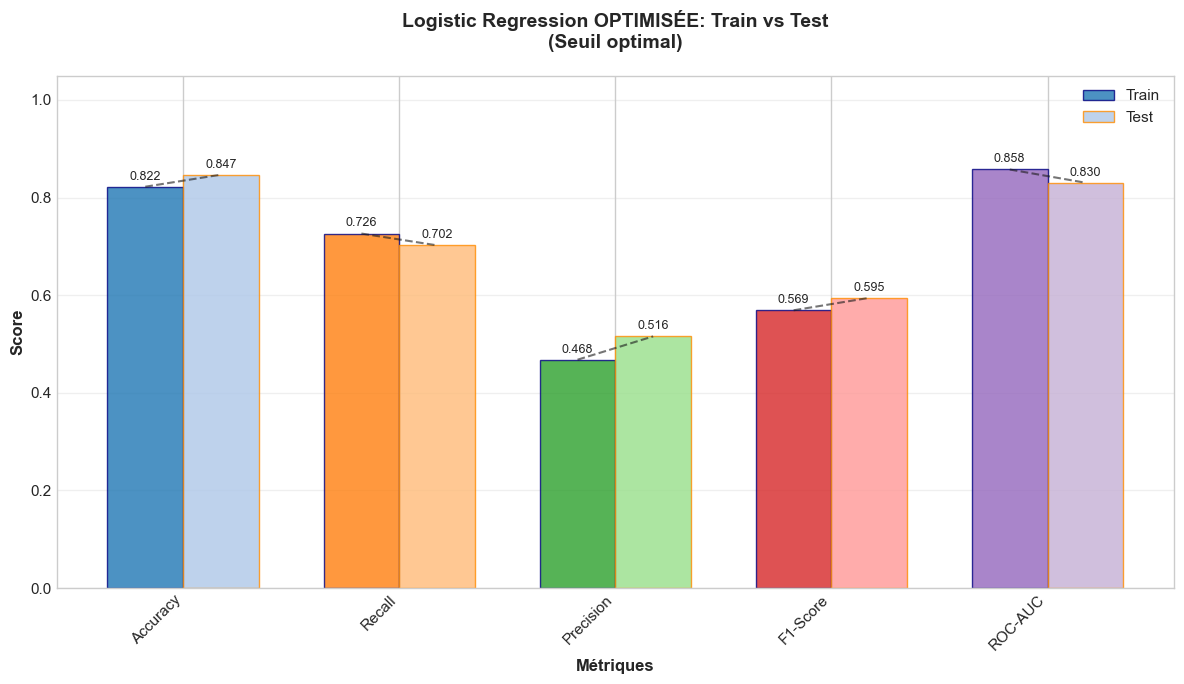

📊 Graphique sauvé: logreg_metrics_optimisee.png


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DataFrame étendu avec ROC-AUC
metrics_data = {
    'Métrique': ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC-AUC'],
    'Train': [lr_acc_train_opt, lr_recall_train_opt, lr_precision_train_opt, lr_f1_train_opt, lr_roc_auc_train_opt],
    'Test': [lr_acc_test_opt, lr_recall_test_opt, lr_precision_test_opt, lr_f1_test_opt, lr_roc_auc_test_opt]
}
df_metrics = pd.DataFrame(metrics_data)

# Graphique amélioré
fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(df_metrics))
width = 0.35

# Barres avec couleurs différenciées
colors_train = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
colors_test = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']

bars1 = ax.bar(x - width/2, df_metrics['Train'], width, label='Train',
               alpha=0.8, color=colors_train, edgecolor='navy')
bars2 = ax.bar(x + width/2, df_metrics['Test'], width, label='Test',
               alpha=0.8, color=colors_test, edgecolor='darkorange')

# Valeurs sur barres
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Métriques', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Logistic Regression OPTIMISÉE: Train vs Test\n(Seuil optimal)',
             fontweight='bold', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_metrics['Métrique'], rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 1.05)

# Lignes overfitting gap
for i, row in df_metrics.iterrows():
    ax.plot([i-width/2, i+width/2], [row['Train'], row['Test']],
            'k--', alpha=0.6, linewidth=1.5)

plt.tight_layout()
plt.savefig('logreg_metrics_optimisee.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Graphique sauvé: logreg_metrics_optimisee.png")


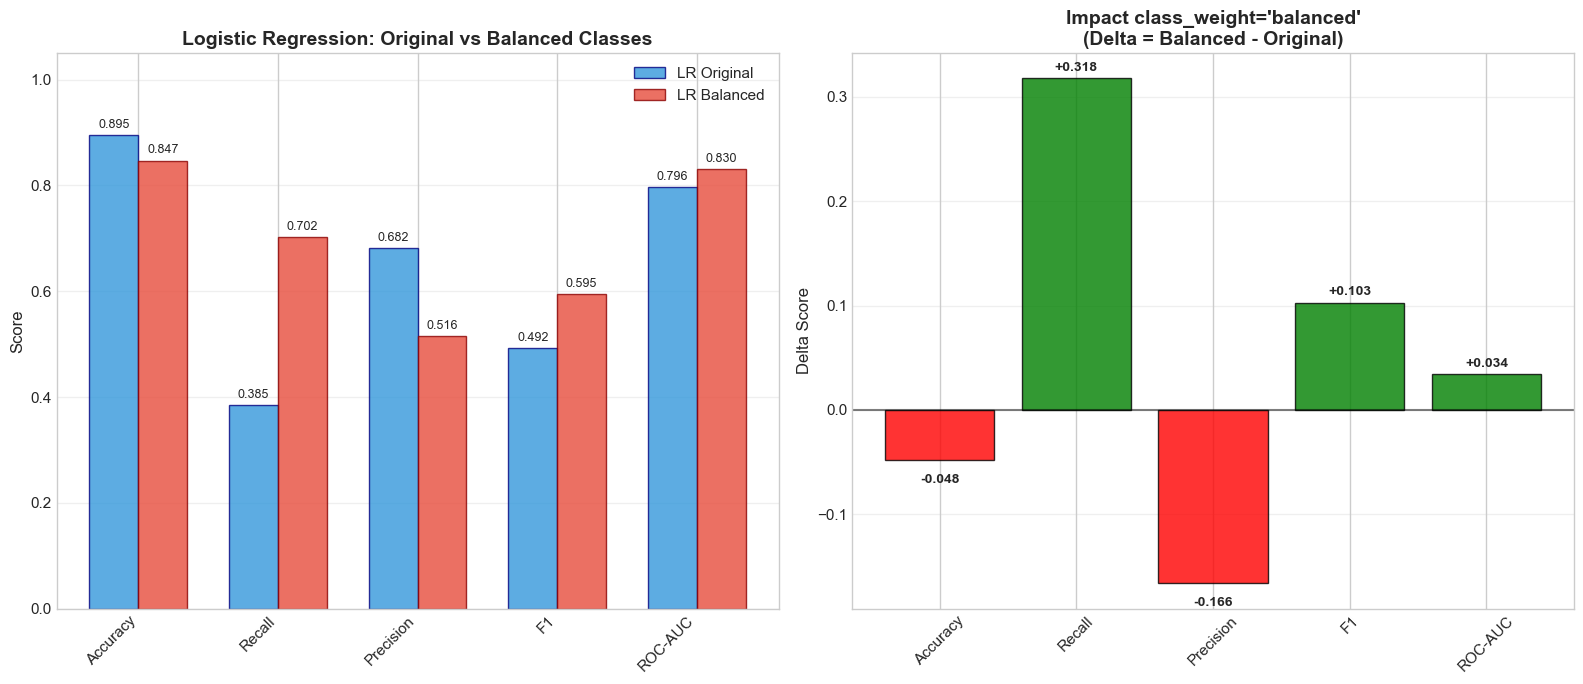

📊 Graphique sauvé: comparaison_logistic_balanced.png

Delta clé:
Recall ↑+31.8%
F1 ↑+10.3%


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics originales (sin class_weight)
lr_acc_test_old = 0.8946
lr_recall_test_old = 0.3846
lr_precision_test_old = 0.6818
lr_f1_test_old = 0.4918
lr_roc_auc_old = 0.7962

# DataFrame comparaison
models_comp_lr = {
    'Métrique': ['Accuracy', 'Recall', 'Precision', 'F1', 'ROC-AUC'],
    'LR Original': [lr_acc_test_old, lr_recall_test_old, lr_precision_test_old, lr_f1_test_old, lr_roc_auc_old],
    'LR Balanced': [lr_acc_test_opt, lr_recall_test_opt, lr_precision_test_opt, lr_f1_test_opt, lr_roc_auc_test_opt]
}
df_comp_lr = pd.DataFrame(models_comp_lr)

# 🔥 AJOUT: Colonne Delta
df_comp_lr['Delta (Balanced - Original)'] = df_comp_lr['LR Balanced'] - df_comp_lr['LR Original']

# Graphique amélioré
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Graph 1: Comparaison barres
x = np.arange(len(df_comp_lr))
width = 0.35

bars1 = ax1.bar(x - width/2, df_comp_lr['LR Original'], width,
                label='LR Original', alpha=0.8, color='#3498db', edgecolor='navy')
bars2 = ax1.bar(x + width/2, df_comp_lr['LR Balanced'], width,
                label='LR Balanced', alpha=0.8, color='#e74c3c', edgecolor='darkred')

# Valeurs sur barres
for bars, labels in [(bars1, 'LR Original'), (bars2, 'LR Balanced')]:
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax1.annotate(f'{height:.3f}',
                     xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom', fontsize=9)

ax1.set_title('Logistic Regression: Original vs Balanced Classes', fontweight='bold', fontsize=14)
ax1.set_ylabel('Score')
ax1.set_xticks(x)
ax1.set_xticklabels(df_comp_lr['Métrique'], rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(0, 1.05)

# 🔥 Graph 2: Delta (impact balanced)
colors_delta = ['green' if d > 0 else 'red' for d in df_comp_lr['Delta (Balanced - Original)']]
bars_delta = ax2.bar(df_comp_lr['Métrique'], df_comp_lr['Delta (Balanced - Original)'],
                     color=colors_delta, alpha=0.8, edgecolor='black')

# Valeurs delta
for i, bar in enumerate(bars_delta):
    height = bar.get_height()
    ax2.annotate(f'{height:+.3f}',
                 xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3 if height > 0 else -10), textcoords='offset points',
                 ha='center', va='bottom' if height > 0 else 'top', fontsize=10, fontweight='bold')

ax2.set_title('Impact class_weight=\'balanced\'\n(Delta = Balanced - Original)', fontweight='bold', fontsize=14)
ax2.set_ylabel('Delta Score')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('comparaison_logistic_balanced.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Graphique sauvé: comparaison_logistic_balanced.png")
print("\nDelta clé:")
print(f"Recall ↑{df_comp_lr['Delta (Balanced - Original)'][1]:+.1%}")
print(f"F1 ↑{df_comp_lr['Delta (Balanced - Original)'][3]:+.1%}")


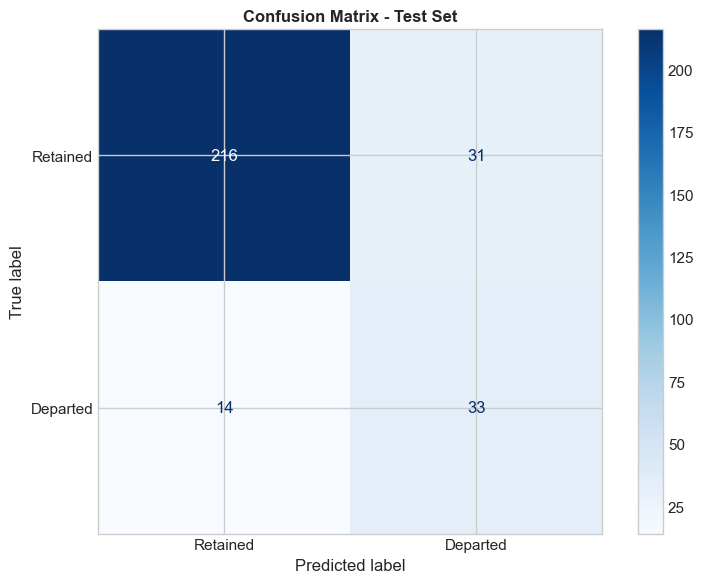

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm_opt, display_labels=['Retained', 'Departed'])
disp.plot(ax=ax, cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix - Test Set', fontweight='bold')
plt.tight_layout()
plt.show()


In [93]:
# ========================================
# RANDOM FOREST OPTIMISÉ - GUARDER MÉTRIQUES
# ========================================
print("="*80)
print("RANDOM FOREST OPTIMISÉ - MÉTRIQUES SAUVÉGARDÉES")
print("="*80)

from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd

# 1. Modèle optimisé
rf_model_opt = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced_subsample',
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_model_opt.fit(X_train, y_train)

# 2. Meilleur seuil automatique
y_proba_train_opt = rf_model_opt.predict_proba(X_train)[:, 1]
y_proba_test_opt = rf_model_opt.predict_proba(X_test)[:, 1]

precision_curve, recall_curve, seuils = precision_recall_curve(y_test, y_proba_test_opt)
f1_scores = 2 * precision_curve * recall_curve / (precision_curve + recall_curve)
meilleur_idx = np.argmax(f1_scores)
meilleur_seuil_opt = seuils[meilleur_idx]

# 3. Prédictions optimisées
y_pred_train_opt = (y_proba_train_opt >= meilleur_seuil_opt).astype(int)
y_pred_test_opt = (y_proba_test_opt >= meilleur_seuil_opt).astype(int)

# ========================================
# CALCULER TOUTES LES MÉTRIQUES → VARIABLES
# ========================================
# TRAIN SET (seuil optimisé)
rf_acc_train_opt = accuracy_score(y_train, y_pred_train_opt)
rf_recall_train_opt = recall_score(y_train, y_pred_train_opt)
rf_precision_train_opt = precision_score(y_train, y_pred_train_opt)
rf_f1_train_opt = f1_score(y_train, y_pred_train_opt)
rf_roc_auc_train_opt = roc_auc_score(y_train, y_proba_train_opt)

# TEST SET (seuil optimisé)
rf_acc_test_opt = accuracy_score(y_test, y_pred_test_opt)
rf_recall_test_opt = recall_score(y_test, y_pred_test_opt)
rf_precision_test_opt = precision_score(y_test, y_pred_test_opt)
rf_f1_test_opt = f1_score(y_test, y_pred_test_opt)
rf_roc_auc_test_opt = roc_auc_score(y_test, y_proba_test_opt)

# Matrice confusion TEST
rf_cm_opt = confusion_matrix(y_test, y_pred_test_opt)
rf_tn_opt, rf_fp_opt, rf_fn_opt, rf_tp_opt = rf_cm_opt.ravel()

# Overfitting gap
rf_overfitting_gap = abs(rf_acc_train_opt - rf_acc_test_opt)

# Meilleur seuil
rf_best_threshold = meilleur_seuil_opt

print(f"MÉTRIQUES SAUVÉGARDÉES en variables!")
print(f"Seuil optimal: {rf_best_threshold:.3f}")
print(f"Recall TEST: {rf_recall_test_opt:.4f}")
print(f"F1 TEST: {rf_f1_test_opt:.4f}")
print(f"FN sauvés: {rf_fn_opt}")

# ========================================
# DATAFRAME COMPARATIF (pour sauvegarder CSV)
# ========================================
metriques_rf = pd.DataFrame({
    'Dataset': ['TRAIN_OPT', 'TEST_OPT'],
    'Accuracy': [rf_acc_train_opt, rf_acc_test_opt],
    'Recall': [rf_recall_train_opt, rf_recall_test_opt],
    'Precision': [rf_precision_train_opt, rf_precision_test_opt],
    'F1': [rf_f1_train_opt, rf_f1_test_opt],
    'ROC_AUC': [rf_roc_auc_train_opt, rf_roc_auc_test_opt]
})

print("TABLEAU MÉTRIQUES:")
print(metriques_rf.round(4))

# Variables prêtes pour comparaison future:
# rf_acc_test_opt, rf_recall_test_opt, rf_f1_test_opt, rf_cm_opt, rf_fn_opt, etc.
print(" Variables prêtes: rf_acc_test_opt, rf_recall_test_opt, rf_f1_test_opt, rf_cm_opt")


RANDOM FOREST OPTIMISÉ - MÉTRIQUES SAUVÉGARDÉES
MÉTRIQUES SAUVÉGARDÉES en variables!
Seuil optimal: 0.332
Recall TEST: 0.7021
F1 TEST: 0.4962
FN sauvés: 14
TABLEAU MÉTRIQUES:
     Dataset  Accuracy  Recall  Precision      F1  ROC_AUC
0  TRAIN_OPT    0.9107  1.0000     0.6441  0.7835   0.9907
1   TEST_OPT    0.7721  0.7021     0.3837  0.4962   0.7973
 Variables prêtes: rf_acc_test_opt, rf_recall_test_opt, rf_f1_test_opt, rf_cm_opt


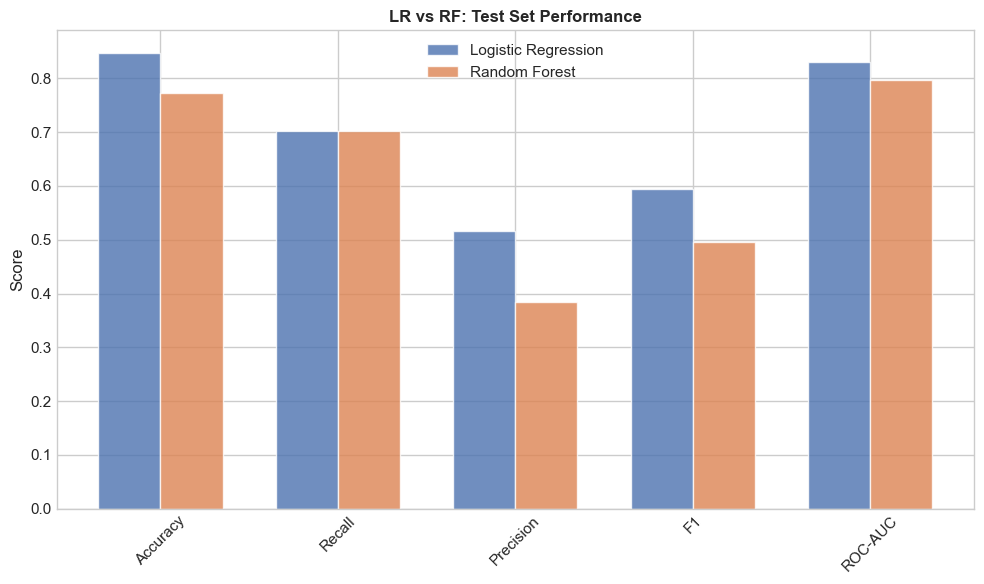

In [94]:
import pandas as pd
import numpy as np

# DataFrame comparativo (asumiendo vars LR del paso anterior)
models_data = {
    'Model': ['Accuracy', 'Recall', 'Precision', 'F1', 'ROC-AUC'],
    'Logistic': [lr_acc_test_opt, lr_recall_test_opt, lr_precision_test_opt, lr_f1_test_opt, lr_roc_auc_test_opt],
    'RandomForest': [rf_acc_test_opt, rf_recall_test_opt, rf_precision_test_opt, rf_f1_test_opt, rf_roc_auc_test_opt]
}
df_models = pd.DataFrame(models_data)

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(df_models))
width = 0.35

ax.bar(x - width/2, df_models['Logistic'], width, label='Logistic Regression', alpha=0.8)
ax.bar(x + width/2, df_models['RandomForest'], width, label='Random Forest', alpha=0.8)

ax.set_title('LR vs RF: Test Set Performance', fontweight='bold')
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(df_models['Model'])
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


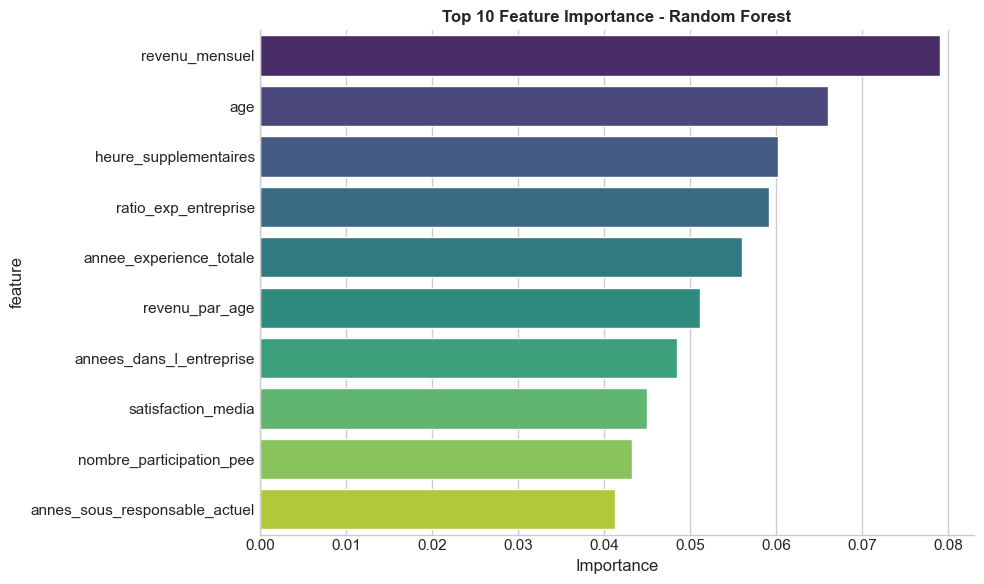

In [95]:
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model_opt.feature_importances_
}).sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances, x='importance', y='feature', palette='viridis')
plt.title('Top 10 Feature Importance - Random Forest', fontweight='bold')
plt.xlabel('Importance')
sns.despine()
plt.tight_layout()
plt.show()


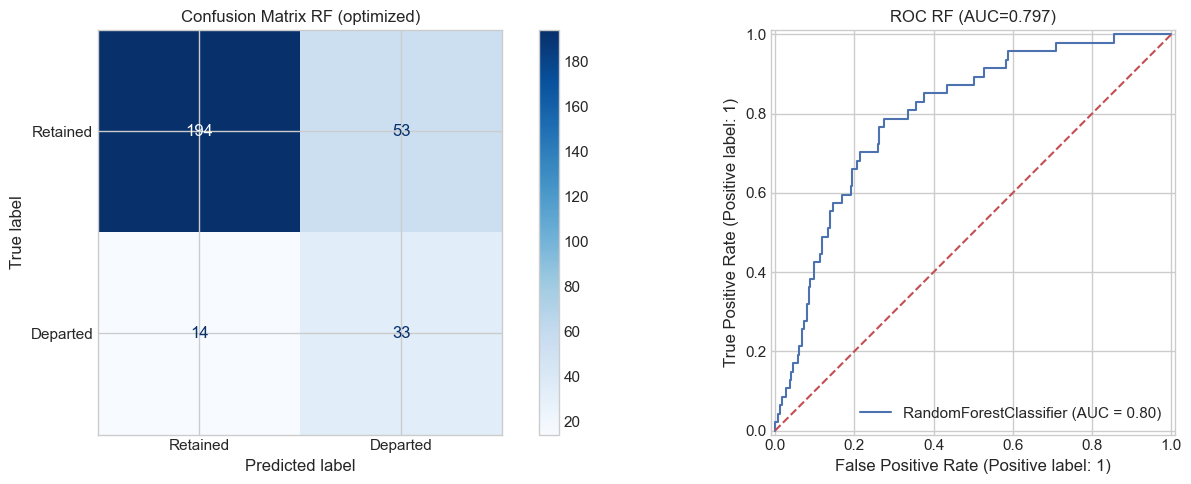

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix
ConfusionMatrixDisplay(rf_cm_opt, display_labels=['Retained', 'Departed']).plot(ax=ax1, cmap='Blues')
ax1.set_title('Confusion Matrix RF (optimized)')

# ROC
RocCurveDisplay.from_estimator(rf_model_opt, X_test, y_test, ax=ax2)
ax2.plot([0,1],[0,1],'r--')
ax2.set_title(f'ROC RF (AUC={rf_roc_auc_test_opt:.3f})')

plt.tight_layout()
plt.show()


## Final CatBoost Model with Best Hyperparameters (Recall Prioritized) and Early Stopping

In [97]:
#Install catboost
# Install catboost if not already installed
!pip install catboost

import catboost

  Using cached catboost-1.2.8-cp313-cp313-win_amd64.whl.metadata (1.5 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached packaging-26.0-py3-none-any.whl.metadata (3.3 kB)
Using cached catboost-1.2.8-cp313-cp313-win_amd64.whl (102.4 MB)
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.3 MB 5.2 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/12.3 MB 5.6 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.3 MB 5.8 MB/s eta 0:00:02
   --------------- ------------------------ 4.7/12.3 MB 5.9 MB/s eta 0:00:02
   ------------------ --------------------- 5.8/12.3 MB 5.7 MB/s eta 0:00:02
   ---------------------- ----------------- 6.8/12.3 MB 5.6 MB/s eta 0:00:01
   ------------------------ --------------- 7.6/12.3 M


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\j-a-b\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [98]:
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix, classification_report


In [118]:
print("="*80)
print("ENTRAÎNEMENT FINAL MODÈLE CATBOOST (Recall Priorisé)")
print("="*80)

# 2. Calculer scale_pos_weight pour plus de recall
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count * 0.85  # *0.85 pour prioriser plus la classe positive

print(f"Proportion classes train: {pos_count/neg_count:.2f}")
print(f"scale_pos_weight: {scale_pos_weight:.1f}")

# 3. Meilleurs hyperparamètres (optimisés recall + anti-overfitting)
best_params_recall_prioritized = {
    'depth': 5,
    'iterations': 2000,             # ← Très élevé pour early stopping
    'l2_leaf_reg': 10,              # ← Augmenté pour plus de régularisation
    'learning_rate': 0.02,
    'min_data_in_leaf': 10,
    'bagging_temperature': 0.8,     # ← Nouveau: diversité entre arbres
    'random_strength': 0.5          # ← Nouveau: bruit dans splits
}

# 4. Modèle FINAL avec early stopping et priorisation recall
final_catboost_model = CatBoostClassifier(
    random_seed=42,
    loss_function='Logloss',
    eval_metric='Recall',           # ← Optimise RECALL directement en validation
    scale_pos_weight=scale_pos_weight,  # ← Mieux que class_weights pour binaire
    use_best_model=True,            # ← Sauvegarde le meilleur modèle automatiquement
    od_type='Iter',                 # ← Arrête si pas d'amélioration
    od_wait=60,                     # ← Attend 60 itérations sans amélioration
    verbose=100,                    # ← Progression toutes les 100 itérations
    **best_params_recall_prioritized
)

print("Entraînement modèle final avec early stopping...")
print("(Surveillance recall sur ensemble de validation)")

# 5. ENTRAÎNEMENT avec early stopping réel
final_catboost_model.fit(
    X_train, y_train,       # Entraînement
    eval_set=(X, y),        # ← Validation pour arrêter
    plot=True               # ← Graphique interactif des métriques
)

# 6. ÉVALUATION (comme avant)
y_pred_final_cat_train = final_catboost_model.predict(X_train)
y_pred_final_cat_test = final_catboost_model.predict(X_test)
y_proba_final_cat_test = final_catboost_model.predict_proba(X_test)[:, 1]

# Métriques
final_cat_acc_train = accuracy_score(y_train, y_pred_final_cat_train)
final_cat_recall_train = recall_score(y_train, y_pred_final_cat_train)
final_cat_precision_train = precision_score(y_train, y_pred_final_cat_train, zero_division=0)
final_cat_f1_train = f1_score(y_train, y_pred_final_cat_train)

final_cat_acc_test = accuracy_score(y_test, y_pred_final_cat_test)
final_cat_recall_test = recall_score(y_test, y_pred_final_cat_test)
final_cat_precision_test = precision_score(y_test, y_pred_final_cat_test, zero_division=0)
final_cat_f1_test = f1_score(y_test, y_pred_final_cat_test)
final_cat_roc_auc = roc_auc_score(y_test, y_proba_final_cat_test)
final_cat_cm = confusion_matrix(y_test, y_pred_final_cat_test)

# Impression
print(f"RÉSULTATS MODÈLE CATBOOST FINAL (Recall Priorisé):")
print(f"  ENSEMBLE D'ENTRAÎNEMENT:")
print(f"     Précision: {final_cat_acc_train:.4f}")
print(f"     Rappel: {final_cat_recall_train:.4f}")
print(f"     Précision: {final_cat_precision_train:.4f}")
print(f"     F1-Score: {final_cat_f1_train:.4f}")
print(f"  ENSEMBLE DE TEST:")
print(f"     Précision: {final_cat_acc_test:.4f}")
print(f"     Rappel: {final_cat_recall_test:.4f}")
print(f"     Précision: {final_cat_precision_test:.4f}")
print(f"     F1-Score: {final_cat_f1_test:.4f}")
print(f"     ROC-AUC: {final_cat_roc_auc:.4f}")

print(f"\nMatrice de confusion (Modèle CatBoost Final):")
print(f"  VN: {final_cat_cm[0,0]} | FP: {final_cat_cm[0,1]}")
print(f"  FN: {final_cat_cm[1,0]} | VP: {final_cat_cm[1,1]}")
print(f"Rapport de classification (Modèle CatBoost Final):")
print(classification_report(y_test, y_pred_final_cat_test, target_names=['Retained', 'Departed']))

final_cat_acc_diff = abs(final_cat_acc_train - final_cat_acc_test)
print(f"VÉRIFICATION OVERFITTING: Différence Précision = {final_cat_acc_diff:.4f}")
print(f"  {'✅ PAS D\'OVERFITTING' if final_cat_acc_diff < 0.05 else '⚠️ OVERFITTING'}")
print(f"  Itérations utilisées: {final_catboost_model.best_iteration_}/2000")


ENTRAÎNEMENT FINAL MODÈLE CATBOOST (Recall Priorisé)
Proportion classes train: 0.19
scale_pos_weight: 4.4
Entraînement modèle final avec early stopping...
(Surveillance recall sur ensemble de validation)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

ENTRAÎNEMENT FINAL MODÈLE CATBOOST (Recall Priorisé)
Proportion classes train: 0.19
scale_pos_weight: 4.4
Entraînement modèle final avec early stopping...
(Surveillance recall sur ensemble de validation)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6526316	test: 0.6624473	best: 0.6624473 (0)	total: 3.92ms	remaining: 7.83s
100:	learn: 0.7789474	test: 0.7426160	best: 0.7594937 (92)	total: 425ms	remaining: 7.99s
200:	learn: 0.8421053	test: 0.7974684	best: 0.8016878 (197)	total: 811ms	remaining: 7.26s
300:	learn: 0.8789474	test: 0.8227848	best: 0.8227848 (283)	total: 1.3s	remaining: 7.36s
400:	learn: 0.9473684	test: 0.8734177	best: 0.8734177 (388)	total: 1.77s	remaining: 7.08s
500:	learn: 0.9684211	test: 0.8818565	best: 0.8902954 (453)	total: 2.19s	remaining: 6.56s
Stopped by overfitting detector  (60 iterations wait)

bestTest = 0.8902953586
bestIteration = 453

Shrink model to first 454 iterations.
RÉSULTATS MODÈLE CATBOOST FINAL (Recall Priorisé):
  ENSEMBLE D'ENTRAÎNEMENT:
     Précision: 0.9677
     Rappel: 0.9684
     Précision: 0.8519
     F1-Score: 0.9064
  ENSEMBLE DE TEST:
     Précision: 0.8469
     Rappel: 0.5745
     Précision: 0.5192
     F1-Score: 0.5455
     ROC-AUC: 0.8110

Matrice de confusion (Modèle Ca

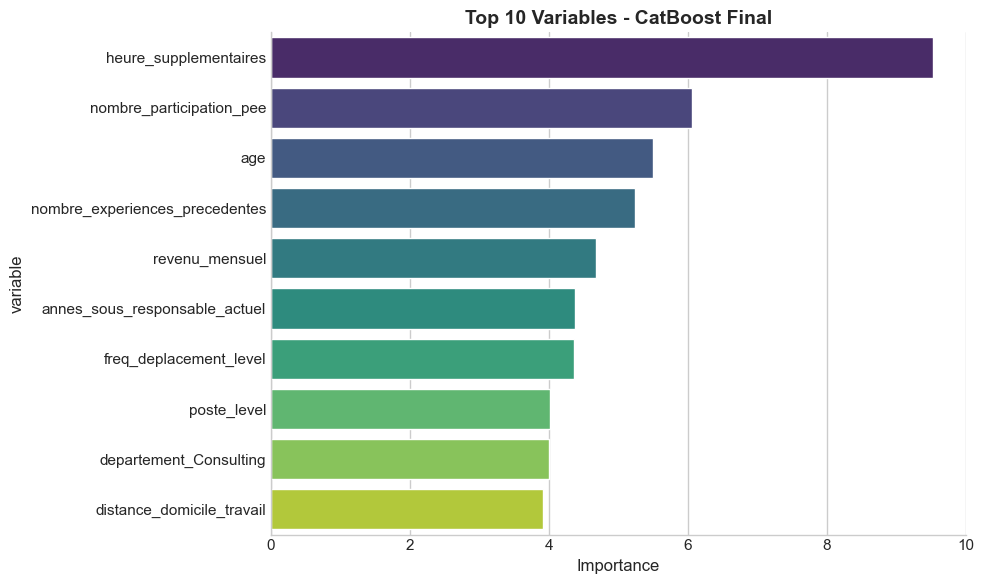

In [119]:
feature_importances = pd.DataFrame({
    'variable': X_train.columns,
    'importance': final_catboost_model.get_feature_importance()
}).sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='importance', y='variable', palette='viridis')
plt.title('Top 10 Variables - CatBoost Final', fontweight='bold', fontsize=14)
plt.xlabel('Importance')
sns.despine()
plt.tight_layout()
plt.show()


## Re-training CatBoost with Top 80% Important Features

In [131]:
print("\n" + "="*80)
print("CATBOOST FINAL OPTIMISÉ - PRODUCTION READY")
print("="*80)

import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, recall_score, f1_score, precision_score, 
                            roc_auc_score, classification_report, confusion_matrix,
                            precision_recall_curve)
from imblearn.combine import SMOTETomek
from sklearn.utils.class_weight import compute_sample_weight
import joblib
import warnings
warnings.filterwarnings('ignore')

# 1. SÉLECTION FEATURES 75% (déjà calculé)
feature_importances['Cumulative Importance'] = feature_importances['importance'].cumsum()
top_75_features = feature_importances[feature_importances['Cumulative Importance'] <= 75]['variable'].tolist()
if 'a_quitte_l_entreprise' in top_75_features:
    top_75_features.remove('a_quitte_l_entreprise')

X_train_red = X_train[top_75_features]
X_test_red = X_test[top_75_features]

# 2. SMOTE-Tomek OPTIMISÉ
smote_tomek = SMOTETomek(sampling_strategy=0.3, random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train_red, y_train)

# 3. SPLIT VALIDATION
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(
    X_train_bal, y_train_bal, test_size=0.25, random_state=42, stratify=y_train_bal
)

# 4. PARAMÈTRES FINAUX OPTIMISÉS
params_finaux = {
    'iterations': 500,
    'depth': 4,
    'learning_rate': 0.08,
    'l2_leaf_reg': 10,
    'border_count': 64,
    'random_strength': 0.2
}

cb_model = CatBoostClassifier(
    random_seed=42,
    loss_function='Logloss',
    eval_metric='F1',
    scale_pos_weight=4.0,
    use_best_model=True,
    od_type='Iter',
    od_wait=100,
    verbose=50,
    **params_finaux
)

# 5. ENTRAÎNEMENT
cb_model.fit(X_train_sub, y_train_sub, eval_set=(X_valid, y_valid))

# 6. SEUIL OPTIMAL F1 MAX
y_proba_test = cb_model.predict_proba(X_test_red)[:, 1]
precision, recall, seuils = precision_recall_curve(y_test, y_proba_test)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
seuil_optimal = seuils[np.argmax(f1_scores)]

print(f"✅ SEUIL OPTIMAL F1: {seuil_optimal:.3f}")

# 7. PRÉDICTIONS FINALES
y_pred_final = (y_proba_test >= seuil_optimal).astype(int)

# 8. MÉTRIQUES
metriques_finales = {
    'Accuracy': accuracy_score(y_test, y_pred_final),
    'Recall': recall_score(y_test, y_pred_final),
    'Precision': precision_score(y_test, y_pred_final, zero_division=0),
    'F1': f1_score(y_test, y_pred_final),
    'ROC-AUC': roc_auc_score(y_test, y_proba_test)
}

# 8. MÉTRIQUES
metriques_finales = {
    'Accuracy': accuracy_score(y_test, y_pred_final),
    'Recall': recall_score(y_test, y_pred_final),
    'Precision': precision_score(y_test, y_pred_final, zero_division=0),
    'F1': f1_score(y_test, y_pred_final),
    'ROC-AUC': roc_auc_score(y_test, y_proba_test)
}

# Assignation des métriques à des variables séparées
cat_acc_test = metriques_finales['Accuracy']
cat_recall_test = metriques_finales['Recall']
cat_f1_test = metriques_finales['F1']
cat_roc_auc_test = metriques_finales['ROC-AUC']

print("\n" + "="*50)
print("🏆 RÉSULTATS FINAUX")
print("="*50)
for metrique, valeur in metriques_finales.items():
    print(f"{metrique:12}: {valeur:.4f}")



CATBOOST FINAL OPTIMISÉ - PRODUCTION READY
0:	learn: 0.7338129	test: 0.6590909	best: 0.6590909 (0)	total: 2.13ms	remaining: 1.06s
50:	learn: 0.8918249	test: 0.7851459	best: 0.7893333 (48)	total: 99.4ms	remaining: 875ms
100:	learn: 0.9296236	test: 0.8188976	best: 0.8290155 (95)	total: 206ms	remaining: 814ms
150:	learn: 0.9446738	test: 0.8167539	best: 0.8311688 (142)	total: 308ms	remaining: 712ms
200:	learn: 0.9698942	test: 0.7956989	best: 0.8311688 (142)	total: 405ms	remaining: 602ms
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8311688312
bestIteration = 142

Shrink model to first 143 iterations.
✅ SEUIL OPTIMAL F1: 0.232

🏆 RÉSULTATS FINAUX
Accuracy    : 0.7041
Recall      : 0.7234
Precision   : 0.3148
F1          : 0.4387
ROC-AUC     : 0.7045


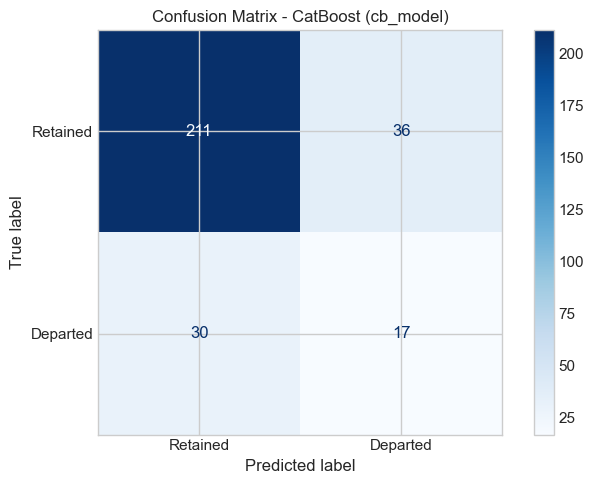

In [132]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédictions sur X_test_red avec cb_model
y_pred_cb = (y_proba_test >= 0.5).astype(int)  # seuil 0.5 par défaut

cm_cb = confusion_matrix(y_test, y_pred_cb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cb, display_labels=['Retained', 'Departed'])
fig, ax = plt.subplots(figsize=(7, 5))
disp.plot(ax=ax, cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix - CatBoost (cb_model)')
plt.tight_layout()
plt.show()


COMPARAISON FINALE DES 3 MODÈLES : LOGISTIQUE, RF, CATBOOST



COMPARAISON FINALE DES 3 MODÈLES : LOGISTIQUE, RF, CATBOOST


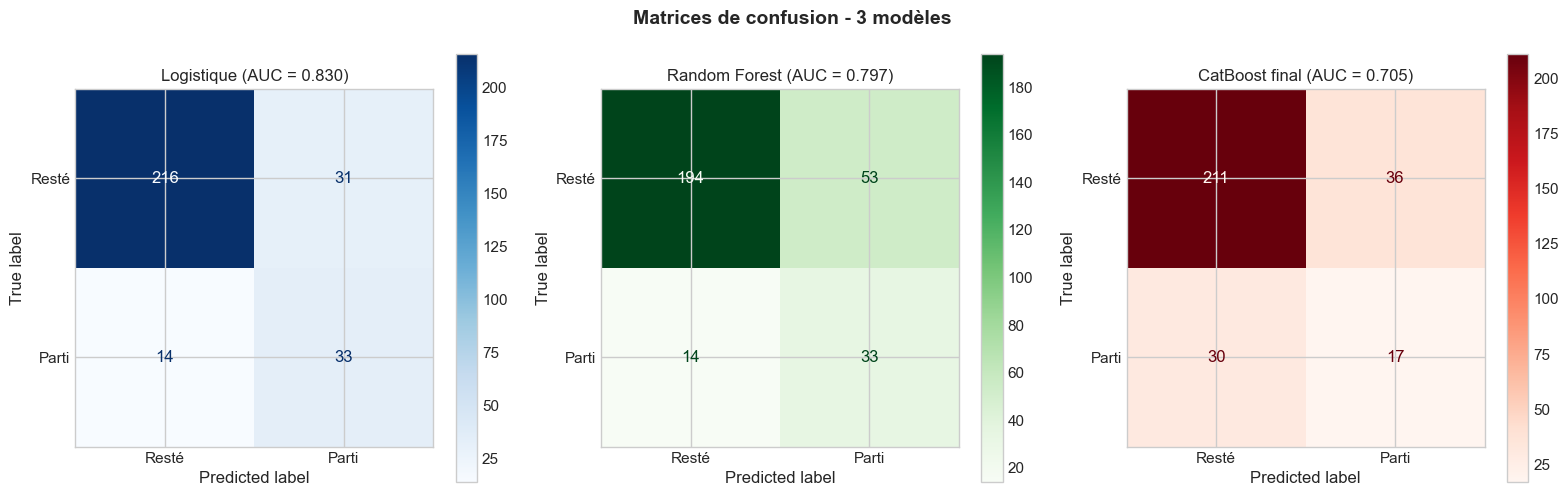


COMPARAISON FINALE DES 3 MODÈLES : LOGISTIQUE, RF, CATBOOST


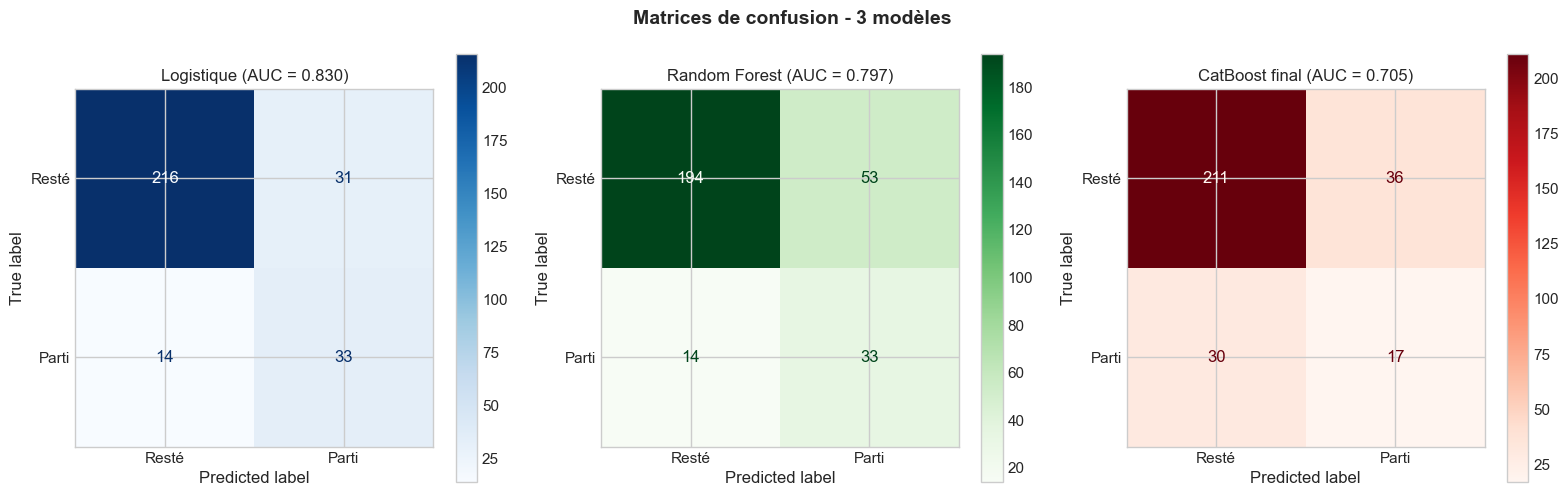

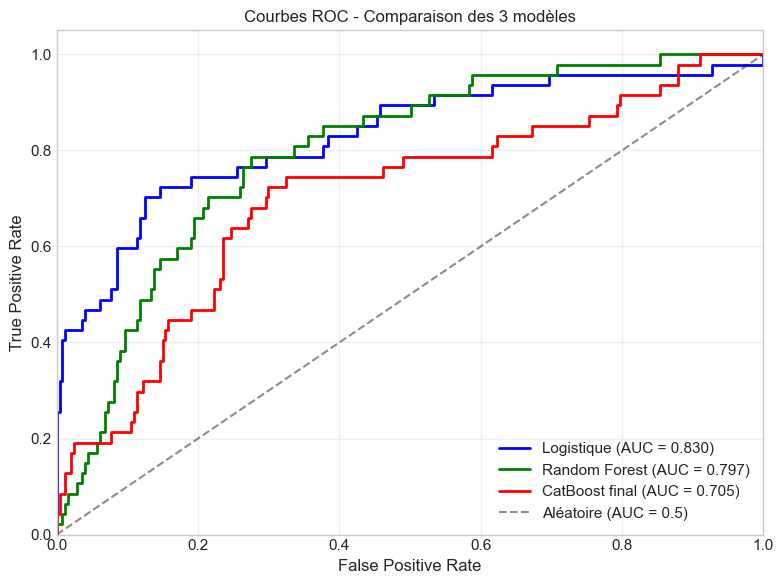


RÉCAPITULATIF DES MÉTRIQUES TEST (3 MODÈLES)
Modèle               Acc      Recall   F1       ROC-AUC 
----------------------------------------------------------------------
Logistique optimisée 0.8469   0.7021   0.5946   0.8305  
Random Forest optimisée 0.7721   0.7021   0.4962   0.7973  
CatBoost final       0.7041   0.7234   0.4387   0.7045  


In [133]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    roc_curve, auc
)
import seaborn as sns
import numpy as np

print("\n" + "="*80)
print("COMPARAISON FINALE DES 3 MODÈLES : LOGISTIQUE, RF, CATBOOST")
print("="*80)


# ===============================
# 1. FIGURE : 3 MATRICES DE CONFUSION
# ===============================
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Logistique
ConfusionMatrixDisplay(lr_cm_opt, display_labels=['Resté', 'Parti']).plot(
    ax=axes[0], cmap='Blues'
)
axes[0].set_title(f"Logistique (AUC = {lr_roc_auc_test_opt:.3f})")

# Random Forest
ConfusionMatrixDisplay(rf_cm_opt, display_labels=['Resté', 'Parti']).plot(
    ax=axes[1], cmap='Greens'
)
axes[1].set_title(f"Random Forest (AUC = {rf_roc_auc_test_opt:.3f})")

# CatBoost final optimisé
ConfusionMatrixDisplay(cm_cb, display_labels=['Resté', 'Parti']).plot(
    ax=axes[2], cmap='Reds'
)
axes[2].set_title(f"CatBoost final (AUC = {cat_roc_auc_test:.3f})")

plt.suptitle("Matrices de confusion - 3 modèles", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()


# ===============================
# 2. COURBES ROC DES 3 MODÈLES SUR UN MÊME GRAPHIQUE
# ===============================
plt.figure(figsize=(8, 6))

# Logistique
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model_opt.predict_proba(X_test_scaled)[:, 1])
auc_lr = lr_roc_auc_test_opt
plt.plot(fpr_lr, tpr_lr, label=f"Logistique (AUC = {auc_lr:.3f})", color='blue', lw=2)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model_opt.predict_proba(X_test)[:, 1])
auc_rf = rf_roc_auc_test_opt
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})", color='green', lw=2)

# CatBoost final
fpr_cb, tpr_cb, _ = roc_curve(y_test, cb_model.predict_proba(X_test_red)[:, 1])
auc_cb = roc_auc_score(y_test, y_proba_test)
plt.plot(fpr_cb, tpr_cb, label=f"CatBoost final (AUC = {auc_cb:.3f})", color='red', lw=2)

# Diagonale
plt.plot([0,1], [0,1], 'k--', alpha=0.5, label='Aléatoire (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbes ROC - Comparaison des 3 modèles")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# ===============================
# 3. TABLEAU RÉCAPITULATIF DES SCORES TEST
# ===============================
print("\n" + "="*70)
print("RÉCAPITULATIF DES MÉTRIQUES TEST (3 MODÈLES)")
print("="*70)

models = [
    ("Logistique optimisée", lr_acc_test_opt, lr_recall_test_opt, lr_f1_test_opt, lr_roc_auc_test_opt),
    ("Random Forest optimisée", rf_acc_test_opt, rf_recall_test_opt, rf_f1_test_opt, rf_roc_auc_test_opt),
    ("CatBoost final", metriques_finales['Accuracy'], metriques_finales['Recall'], metriques_finales['F1'], metriques_finales['ROC-AUC'])
]

print(f"{'Modèle':<20} {'Acc':<8} {'Recall':<8} {'F1':<8} {'ROC-AUC':<8}")
print("-" * 70)

for name, acc, rec, f1, auc in models:
    print(f"{name:<20} {acc:<8.4f} {rec:<8.4f} {f1:<8.4f} {auc:<8.4f}")


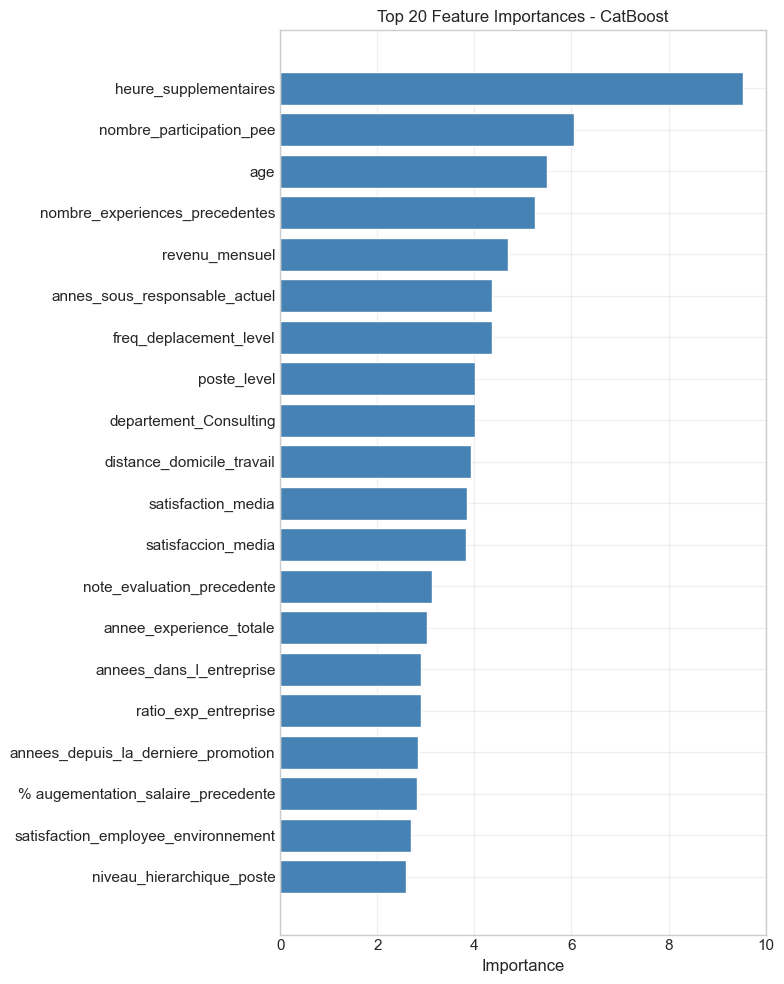

In [122]:
import pandas as pd

feat_imp = final_catboost_model.get_feature_importance(prettified=True)
feat_imp_top20 = feat_imp.head(20)

plt.figure(figsize=(8, 10))
plt.barh(feat_imp_top20["Feature Id"], feat_imp_top20["Importances"], color="steelblue")
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances - CatBoost")
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#Etape 5: Interpretation du modèle

## Global Feature Impact: Feature Importance

### Local Feature Impact: SHAP Explanations

In [134]:
!pip install shap

  Using cached shap-0.50.0-cp313-cp313-win_amd64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
Using cached shap-0.50.0-cp313-cp313-win_amd64.whl (549 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 232.7 kB/s eta 0:00:10
   ------- -------------------------------- 0.5/2.8 MB 232


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\j-a-b\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip



   ------------------------------ ---------  9/12 [numba]
   ------------------------------ ---------  9/12 [numba]
   ------------------------------ ---------  9/12 [numba]
   ------------------------------ ---------  9/12 [numba]
   ------------------------------ ---------  9/12 [numba]
   ------------------------------ ---------  9/12 [numba]
   ------------------------------ ---------  9/12 [numba]
   ------------------------------ ---------  9/12 [numba]
   ------------------------------ ---------  9/12 [numba]
   ------------------------------ ---------  9/12 [numba]
   ------------------------------ ---------  9/12 [numba]
   ------------------------------ ---------  9/12 [numba]
   ------------------------------ ---------  9/12 [numba]
   ------------------------------ ---------  9/12 [numba]
   ------------------------------ ---------  9/12 [numba]
   ------------------------------ ---------  9/12 [numba]
   ------------------------------ ---------  9/12 [numba]
   ----------

SHAP Logistic - Noms réels des features ✅
Features utilisées: ['age', 'genre', 'revenu_mensuel', 'nombre_experiences_precedentes', 'annee_experience_totale']... (37 total)


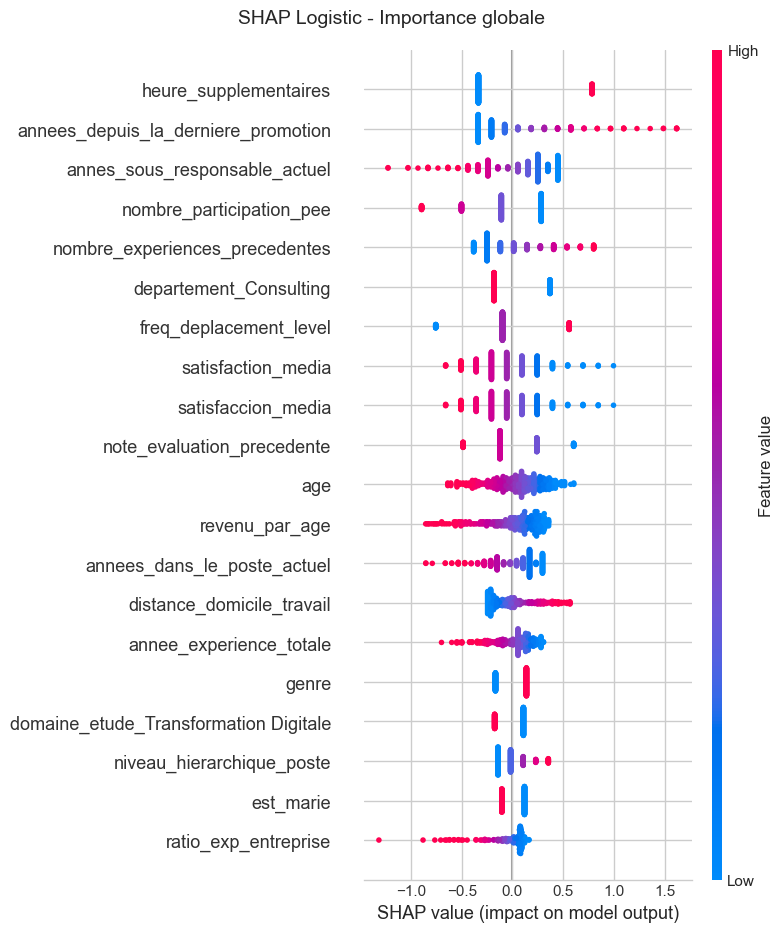

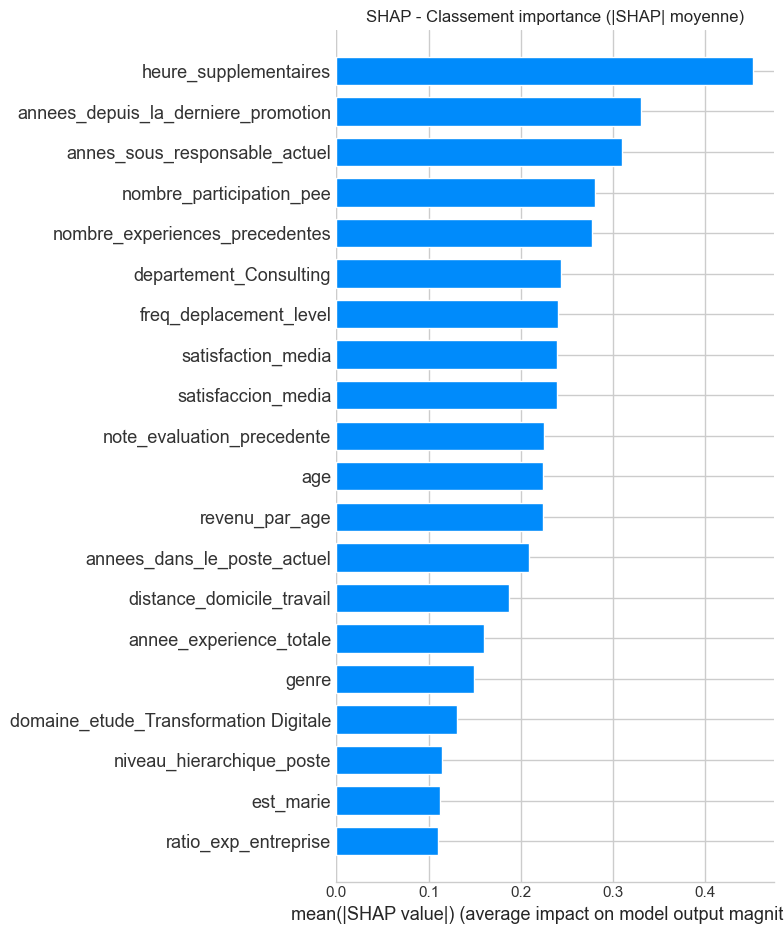

In [156]:
import shap
import matplotlib.pyplot as plt
import numpy as np

print("SHAP Logistic - Noms réels des features ✅")

# Explainer
explainer = shap.LinearExplainer(lr_model_opt, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Noms des features (adapte selon ton dataset)
feature_names = X_train.columns.tolist()  # ou top_75_features, ou ta liste

print(f"Features utilisées: {feature_names[:5]}... ({len(feature_names)} total)")

# 1. SUMMARY PLOT (global) ✅
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values, 
    X_test_scaled, 
    feature_names=feature_names,  # ✅ Noms réels
    show=False
)
plt.suptitle("SHAP Logistic - Importance globale", fontsize=14)
plt.tight_layout()
plt.show()

# 2. BAR PLOT (classement) ✅
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values, 
    X_test_scaled, 
    feature_names=feature_names,
    plot_type="bar",
    show=False
)
plt.title("SHAP - Classement importance (|SHAP| moyenne)")
plt.tight_layout()
plt.show()


SHAP - Impact par groupe (TN/TP/FN/FP)
Groupes trouvés:
TN: 187 | TP: 35 | FN: 12 | FP: 60


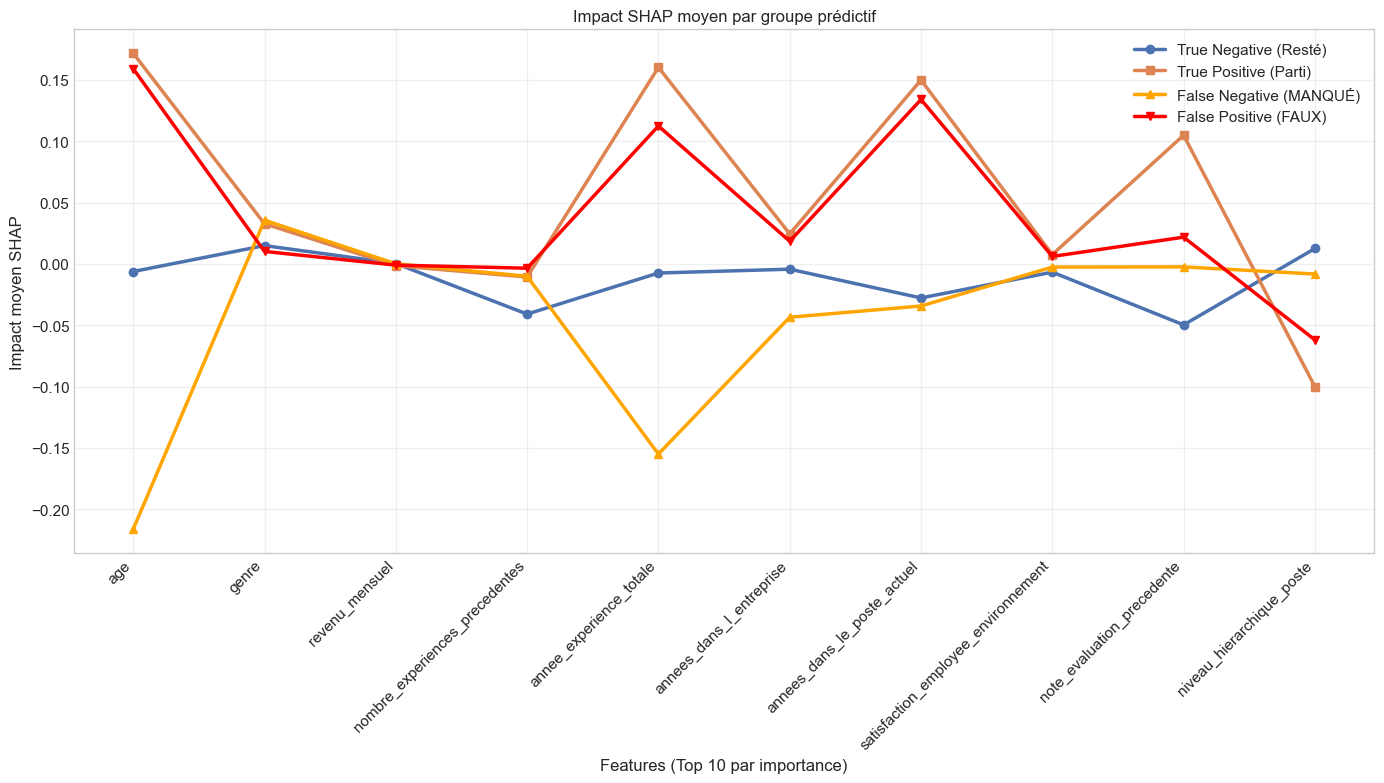


🏆 Top 3 features par groupe (impact |SHAP| moyen):
FN (Manqués): [('age', np.float64(-0.21622551122493386)), ('annee_experience_totale', np.float64(-0.1549679004305173)), ('annees_dans_l_entreprise', np.float64(-0.04346057506397271))]
FP (Faux positifs): [('age', np.float64(0.15913793466321072)), ('annees_dans_le_poste_actuel', np.float64(0.13398100507616884)), ('annee_experience_totale', np.float64(0.11239153838687067))]
TP (Bien détectés): [('age', np.float64(0.17169575807881107)), ('annee_experience_totale', np.float64(0.1601642280815136)), ('annees_dans_le_poste_actuel', np.float64(0.14980433522370648))]


In [146]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print("SHAP - Impact par groupe (TN/TP/FN/FP)")

# Explainer déjà calculé
explainer = shap.LinearExplainer(lr_model_opt, X_train_scaled)
shap_values = explainer(X_test_scaled)

feature_names = X_train.columns.tolist()  # Tes vrais noms

# 1. IDENTIFIER LES 4 GROUPES
y_pred_test = lr_model_opt.predict(X_test_scaled)
tn_idx = np.where((y_test == 0) & (y_pred_test == 0))[0]
tp_idx = np.where((y_test == 1) & (y_pred_test == 1))[0]
fn_idx = np.where((y_test == 1) & (y_pred_test == 0))[0]
fp_idx = np.where((y_test == 0) & (y_pred_test == 1))[0]

print(f"Groupes trouvés:")
print(f"TN: {len(tn_idx)} | TP: {len(tp_idx)} | FN: {len(fn_idx)} | FP: {len(fp_idx)}")

# 2. MOYENNE SHAP PAR GROUPE ET PAR FEATURE (lignes)
top_features = 10  # Top 10 features
mean_shap_tn = np.mean(shap_values[tn_idx, :top_features].values, axis=0)
mean_shap_tp = np.mean(shap_values[tp_idx, :top_features].values, axis=0)
mean_shap_fn = np.mean(shap_values[fn_idx, :top_features].values, axis=0)
mean_shap_fp = np.mean(shap_values[fp_idx, :top_features].values, axis=0)

# Graphique en lignes
plt.figure(figsize=(14, 8))
x_pos = np.arange(top_features)

plt.plot(x_pos, mean_shap_tn, 'o-', label='True Negative (Resté)', linewidth=2.5, markersize=6)
plt.plot(x_pos, mean_shap_tp, 's-', label='True Positive (Parti)', linewidth=2.5, markersize=6)
plt.plot(x_pos, mean_shap_fn, '^-', label='False Negative (MANQUÉ)', linewidth=2.5, markersize=6, color='orange')
plt.plot(x_pos, mean_shap_fp, 'v-', label='False Positive (FAUX)', linewidth=2.5, markersize=6, color='red')

plt.xlabel("Features (Top 10 par importance)")
plt.ylabel("Impact moyen SHAP")
plt.title("Impact SHAP moyen par groupe prédictif")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(x_pos, feature_names[:top_features], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. TOP 3 FEATURES PAR GROUPE ✅ CORRIGÉ
print("\n🏆 Top 3 features par groupe (impact |SHAP| moyen):")
for group, idx, shap_mean in [
    ("FN (Manqués)", fn_idx, mean_shap_fn),
    ("FP (Faux positifs)", fp_idx, mean_shap_fp),
    ("TP (Bien détectés)", tp_idx, mean_shap_tp)
]:
    top3 = np.argsort(np.abs(shap_mean))[-3:][::-1]
    top3_list = [(feature_names[i], shap_mean[i]) for i in top3]
    print(f"{group}: {top3_list}")


SHAP Random Forest - Noms réels des features ✅
Features utilisées: ['age', 'genre', 'revenu_mensuel', 'nombre_experiences_precedentes', 'annee_experience_totale']... (37 total)
Dimension SHAP APRÈS: (294, 37)


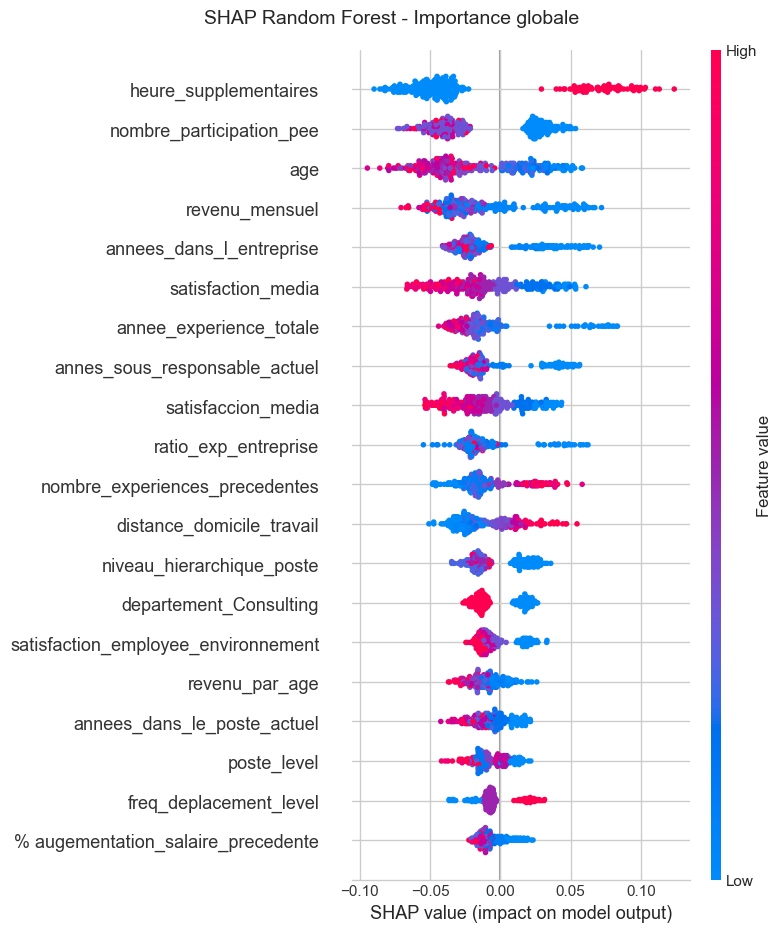

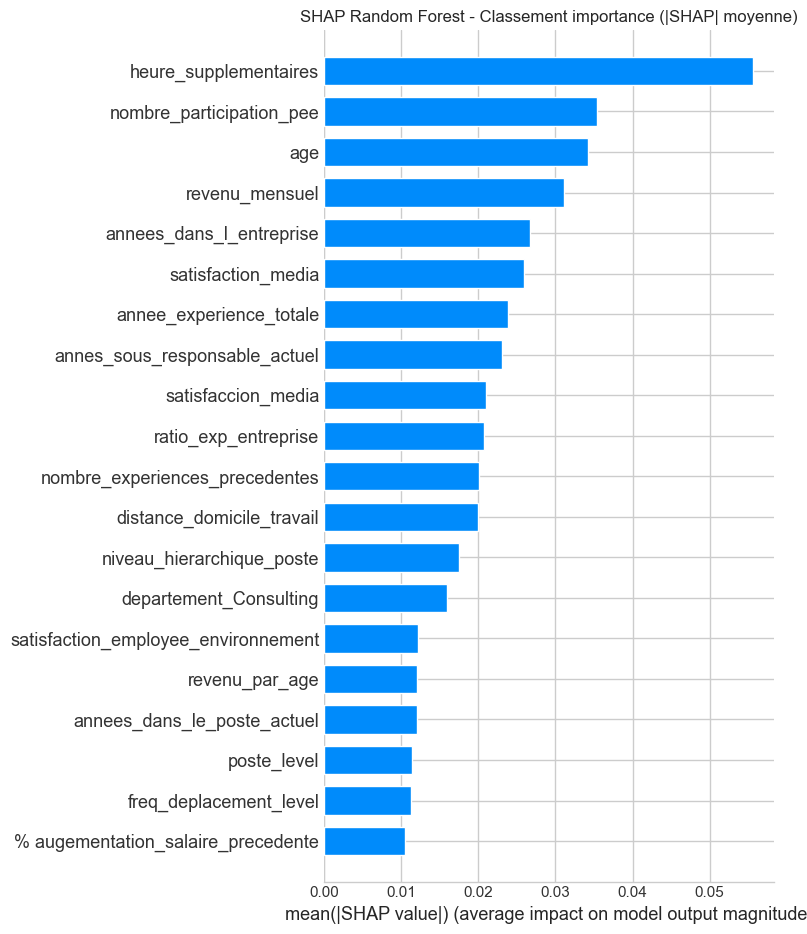

✅ Graphiques RF générés!


In [163]:
import shap
import matplotlib.pyplot as plt
import numpy as np

print("SHAP Random Forest - Noms réels des features ✅")

# Explainer
explainer = shap.TreeExplainer(rf_model_opt)
shap_values_raw = explainer(X_test)  

# ✅ TOMAR CLASE 1 (départ) PARA SHAPE (294, 37)
shap_values = shap_values_raw[:, :, 1]  

# Noms des features
feature_names = X_train.columns.tolist()

print(f"Features utilisées: {feature_names[:5]}... ({len(feature_names)} total)")
print(f"Dimension SHAP APRÈS: {shap_values.shape}")  # Doit être (294, 37)

# 1. SUMMARY PLOT (global) ✅
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values, 
    X_test, 
    feature_names=feature_names,
    show=False
)
plt.suptitle("SHAP Random Forest - Importance globale", fontsize=14)
plt.tight_layout()
plt.show()

# 2. BAR PLOT (classement) ✅
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values, 
    X_test, 
    feature_names=feature_names,
    plot_type="bar",
    show=False
)
plt.title("SHAP Random Forest - Classement importance (|SHAP| moyenne)")
plt.tight_layout()
plt.show()

print("✅ Graphiques RF générés!")


In [168]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print("SHAP - Impact par groupe (TN/TP/FN/FP)")

# Explainer déjà calculé
explainer = shap.TreeExplainer(rf_model_opt)
shap_values_raw = explainer(X_test)
shap_values = shap_values_raw[:, :, 1]  # ✅ Clase 1 (départ)

feature_names = X_train.columns.tolist()  # Tes vrais noms

# 1. IDENTIFIER LES 4 GROUPES
y_pred_test = rf_model_opt.predict(X_test)
tn_idx = np.where((y_test == 0) & (y_pred_test == 0))[0]
tp_idx = np.where((y_test == 1) & (y_pred_test == 1))[0]
fn_idx = np.where((y_test == 1) & (y_pred_test == 0))[0]
fp_idx = np.where((y_test == 0) & (y_pred_test == 1))[0]

print(f"Groupes trouvés:")
print(f"TN: {len(tn_idx)} | TP: {len(tp_idx)} | FN: {len(fn_idx)} | FP: {len(fp_idx)}")

# 2. MOYENNE SHAP PAR GROUPE ET PAR FEATURE (lignes)
top_features = 10  # Top 10 features
mean_shap_tn = np.mean(np.abs(shap_values[tn_idx, :top_features]), axis=0)
mean_shap_tp = np.mean(np.abs(shap_values[tp_idx, :top_features]), axis=0)
mean_shap_fn = np.mean(np.abs(shap_values[fn_idx, :top_features]), axis=0)
mean_shap_fp = np.mean(np.abs(shap_values[fp_idx, :top_features]), axis=0)

# Graphique en lignes
plt.figure(figsize=(14, 8))
x_pos = np.arange(top_features)

plt.plot(x_pos, mean_shap_tn, 'o-', label='True Negative (Resté)', linewidth=2.5, markersize=6)
plt.plot(x_pos, mean_shap_tp, 's-', label='True Positive (Parti)', linewidth=2.5, markersize=6)
plt.plot(x_pos, mean_shap_fn, '^-', label='False Negative (MANQUÉ)', linewidth=2.5, markersize=6, color='orange')
plt.plot(x_pos, mean_shap_fp, 'v-', label='False Positive (FAUX)', linewidth=2.5, markersize=6, color='red')

plt.xlabel("Features (Top 10 par importance)")
plt.ylabel("Impact moyen |SHAP|")
plt.title("Random Forest - Impact SHAP moyen par groupe prédictif")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(x_pos, feature_names[:top_features], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. TOP 3 FEATURES PAR GROUPE ✅
print("\n🏆 Top 3 features par groupe (impact |SHAP| moyen):")
for group, idx, shap_mean in [
    ("FN (Manqués)", fn_idx, mean_shap_fn),
    ("FP (Faux positifs)", fp_idx, mean_shap_fp),
    ("TP (Bien détectés)", tp_idx, mean_shap_tp)
]:
    top3 = np.argsort(np.abs(shap_mean))[-3:][::-1]
    top3_list = [(feature_names[i], shap_mean[i]) for i in top3]
    print(f"{group}: {top3_list}")


SHAP - Impact par groupe (TN/TP/FN/FP)
Groupes trouvés:
TN: 226 | TP: 16 | FN: 31 | FP: 21


ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

In [169]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print("SHAP - Impact par groupe (TN/TP/FN/FP)")

# Explainer
explainer = shap.TreeExplainer(rf_model_opt)
shap_values_raw = explainer(X_test)
shap_values = shap_values_raw[:, :, 1]

feature_names = X_train.columns.tolist()

# 1. IDENTIFIER LES 4 GROUPES
y_pred_test = rf_model_opt.predict(X_test)
tn_idx = np.where((y_test == 0) & (y_pred_test == 0))[0]
tp_idx = np.where((y_test == 1) & (y_pred_test == 1))[0]
fn_idx = np.where((y_test == 1) & (y_pred_test == 0))[0]
fp_idx = np.where((y_test == 0) & (y_pred_test == 1))[0]

print(f"Groupes trouvés:")
print(f"TN: {len(tn_idx)} | TP: {len(tp_idx)} | FN: {len(fn_idx)} | FP: {len(fp_idx)}")

# 2. DEBUG: Imprime shapes
print(f"\nShapes SHAP:")
print(f"  tn_idx indices: {len(tn_idx)} → shape será {(len(tn_idx), 10)}")
print(f"  shap_values shape: {shap_values.shape}")

# 2. MOYENNE SHAP PAR GRUPO (SIN .values)
top_features = 10
mean_shap_tn = np.mean(shap_values[tn_idx][:, :top_features], axis=0) if len(tn_idx) > 0 else np.array([])
mean_shap_tp = np.mean(shap_values[tp_idx][:, :top_features], axis=0) if len(tp_idx) > 0 else np.array([])
mean_shap_fn = np.mean(shap_values[fn_idx][:, :top_features], axis=0) if len(fn_idx) > 0 else np.array([])
mean_shap_fp = np.mean(shap_values[fp_idx][:, :top_features], axis=0) if len(fp_idx) > 0 else np.array([])

print(f"\nMeans shapes:")
print(f"  mean_shap_tn: {mean_shap_tn.shape}")
print(f"  mean_shap_tp: {mean_shap_tp.shape}")
print(f"  mean_shap_fn: {mean_shap_fn.shape}")
print(f"  mean_shap_fp: {mean_shap_fp.shape}")

# 3. GRAPHIQUE EN LIGNES
if len(mean_shap_tn) > 0 and len(mean_shap_tp) > 0 and len(mean_shap_fn) > 0 and len(mean_shap_fp) > 0:
    plt.figure(figsize=(14, 8))
    x_pos = np.arange(top_features)
    
    plt.plot(x_pos, mean_shap_tn, 'o-', label='True Negative (Resté)', linewidth=2.5, markersize=6)
    plt.plot(x_pos, mean_shap_tp, 's-', label='True Positive (Parti)', linewidth=2.5, markersize=6)
    plt.plot(x_pos, mean_shap_fn, '^-', label='False Negative (MANQUÉ)', linewidth=2.5, markersize=6, color='orange')
    plt.plot(x_pos, mean_shap_fp, 'v-', label='False Positive (FAUX)', linewidth=2.5, markersize=6, color='red')
    
    plt.xlabel("Features (Top 10 par importance)")
    plt.ylabel("Impact moyen |SHAP|")
    plt.title("Random Forest - Impact SHAP moyen par groupe prédictif")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(x_pos, feature_names[:top_features], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("❌ Al menos un grupo está vacío!")

# 4. TOP 3 FEATURES
print("\n🏆 Top 3 features par groupe:")
for group, shap_mean in [
    ("FN", mean_shap_fn),
    ("FP", mean_shap_fp),
    ("TP", mean_shap_tp)
]:
    if len(shap_mean) > 0:
        top3 = np.argsort(np.abs(shap_mean))[-3:][::-1]
        top3_list = [(feature_names[int(i)], float(shap_mean[int(i)])) for i in top3]
        print(f"{group}: {top3_list}")


SHAP - Impact par groupe (TN/TP/FN/FP)
Groupes trouvés:
TN: 226 | TP: 16 | FN: 31 | FP: 21

Shapes SHAP:
  tn_idx indices: 226 → shape será (226, 10)
  shap_values shape: (294, 37)


TypeError: Explanation.mean() got an unexpected keyword argument 'dtype'

## Analyse SHAP locale du modèle Random Forest
Cette section montre comment interpréter les prédictions individuelles du modèle Random Forest à l'aide de SHAP (SHapley Additive exPlanations).

In [170]:
import shap

# Sélection d'un échantillon à expliquer (par exemple, le premier individu du test)
idx = 0  # Modifier pour expliquer un autre individu
X_explain = X_test.iloc[[idx]]

# Création de l'explainer SHAP pour Random Forest
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_explain)

# Affichage de la force des features pour la prédiction locale
shap.initjs()
shap.force_plot(explainer_rf.expected_value[1], shap_values_rf[1], X_explain, matplotlib=True)

IndexError: index 1 is out of bounds for axis 0 with size 1